### What is Corona Virus (COVID-19) ?
***

The COVID-19 pandemic, also known as the coronavirus pandemic, is a global pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).

The novel virus was first identified from an outbreak in Wuhan, China, in December 2019. Attempts to contain it there failed, allowing the virus to spread worldwide.

The World Health Organization (WHO) declared a Public Health Emergency of International Concern on 30 January 2020 and a pandemic on 11 March 2020.


### COVID-19 in India
***

On January 30, India reported its first case of COVID-19 in Kerala, which rose to three cases by February 3; all were students who had returned from Wuhan, China.The transmission escalated in the month of March, after several cases were reported all over the country, most of which were linked to people with a travel history to affected countries. On 12 March, a 76-year-old man who had returned from Saudi Arabia became the first victim of the virus in the country. Confirmed cases crossed 100 on 15 March, 1,000 on 28 March and 2,000 on 2 April and 3,000 on 4 April. The death toll crossed 50 on 1 April.

In [1]:
# Importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
# Loading the dataset

covid_df = pd.read_excel('Covid19 Data.xlsx')

In [3]:
covid_df

Date       State_UT  Confirmed  Active      Cured   Deaths
0     2020-01-30         Kerala        1.0     1.0        0.0      0.0
1     2020-01-31         Kerala        1.0     1.0        0.0      0.0
2     2020-02-01         Kerala        2.0     2.0        0.0      0.0
3     2020-02-02         Kerala        3.0     3.0        0.0      0.0
4     2020-02-03         Kerala        3.0     3.0        0.0      0.0
...          ...            ...        ...     ...        ...      ...
29485 2022-06-30        Tripura   100901.0     7.0    99971.0    923.0
29486 2022-06-30  Uttar Pradesh  2090050.0  3541.0  2062971.0  23538.0
29487 2022-06-30    Uttarakhand   438663.0   787.0   430180.0   7696.0
29488 2022-06-30    West Bengal  2027901.0  5885.0  2000798.0  21218.0
29489 2022-06-30      Telengana   800476.0  4421.0   791944.0   4111.0

[29490 rows x 6 columns]

The dataset presents a daily record of the number of cases detected in various states in India from January 30, 2021, to June 30, 2022. It comprises of 29,490 entries with 6 features. The 'Confirmed' column denotes the total number of cases and not the new cases identified on that particular day, which is important to note.

In [4]:
# Shape of the dataframe

covid_df.shape

(29490, 6)

In [5]:
# Information about the dataframe

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29490 entries, 0 to 29489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       29490 non-null  datetime64[ns]
 1   State_UT   29490 non-null  object        
 2   Confirmed  29489 non-null  float64       
 3   Active     29489 non-null  float64       
 4   Cured      29489 non-null  float64       
 5   Deaths     29489 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.4+ MB


In [6]:
# Checking for the null values

covid_df.isnull().sum()

Date         0
State_UT     0
Confirmed    1
Active       1
Cured        1
Deaths       1
dtype: int64

In [7]:
# Dropping rows containing null values from the dataframe

covid_df.dropna(inplace=True)

In [8]:
# Checking for duplicates

covid_df.duplicated().sum()

822

In [9]:
# Dropping duplicated rows from the dataframe

covid_df.drop_duplicates(inplace = True)

In [10]:
# Statistical overview of the dataframe

covid_df.describe()

Date     Confirmed         Active  \
count                          28667  2.866700e+04   28667.000000   
mean   2021-05-07 04:52:27.033173760  5.913761e+05   14478.978582   
min              2020-01-30 00:00:00  0.000000e+00 -140692.000000   
25%              2020-10-10 00:00:00  1.144000e+04     147.000000   
50%              2021-05-05 00:00:00  1.248360e+05    1211.000000   
75%              2021-11-30 00:00:00  7.242330e+05    7891.500000   
max              2022-06-30 00:00:00  7.972474e+06  701614.000000   
std                              NaN  1.164115e+06   46044.922358   

              Cured         Deaths  
count  2.866700e+04   28667.000000  
mean   5.692540e+05    7643.060278  
min    0.000000e+00       0.000000  
25%    1.065300e+04     129.000000  
50%    1.174200e+05    1487.000000  
75%    7.088985e+05    8443.000000  
max    7.798817e+06  147922.000000  
std    1.131717e+06   18271.244067

In [11]:
# Dropping rows where active cases are negative

covid_df.drop(covid_df.query('Active < 0').index, inplace = True)

In [12]:
covid_df.columns

Index(['Date', 'State_UT', 'Confirmed', 'Active', 'Cured', 'Deaths'], dtype='object')

In [13]:
# Preapring state wise data

statewise_df = covid_df.pivot_table(index = 'State_UT', values = ['Confirmed','Cured','Deaths','Active'], 
                                    aggfunc = 'max').reset_index()
statewise_df.head()

State_UT    Active  Confirmed      Cured   Deaths
0  Andaman and Nicobar Islands    1154.0    10157.0     9986.0    129.0
1               Andhra Pradesh  211554.0  2321379.0  2305893.0  14731.0
2            Arunachal Pradesh    4384.0    64518.0    64218.0    296.0
3                        Assam   56295.0   724788.0   716405.0   7988.0
4                        Bihar  115152.0   832581.0   819388.0  12259.0

#### Present Condition In India

In [14]:
present_condition = \
pd.DataFrame(
             { "Total Confirmed Cases" : [ f'{statewise_df["Confirmed"].sum() :,.0f}' ] ,
               "Total Recoveries" : [ f'{statewise_df["Cured"].sum() :,.0f}' ] ,
               "Total Deaths" : [ f'{statewise_df["Deaths"].sum() :,.0f}' ] ,
               "Mortality Rate" : [ f'{statewise_df["Deaths"].sum()*100 / statewise_df["Confirmed"].sum() :,.2f} %' ], 
               "Recovery Rate" : [ f'{statewise_df["Cured"].sum()*100 / statewise_df["Confirmed"].sum() :,.2f} %' ],
             }, index = ["Values"]
             )

present_condition.T

Values
Total Confirmed Cases  43,452,164
Total Recoveries       42,822,493
Total Deaths              525,116
Mortality Rate             1.21 %
Recovery Rate             98.55 %

- As of June 30, 2022, India has reported approximately 43.45 million Covid-19 cases, with 42.82 million recoveries.
- The death toll stands at 0.52 million, resulting in a mortality rate of 1.21% and a recovery rate of over 98%.

#### Statewise Analysis

In [15]:
# Adding two new columns to the 'statewise_df' dataframe

statewise_df['Recovery Rate'] = (statewise_df['Cured']/statewise_df['Confirmed'])*100
statewise_df['Mortality Rate'] = (statewise_df['Deaths']/statewise_df['Confirmed'])*100
statewise_df['Deaths Share (%)'] = (statewise_df['Deaths'] / statewise_df['Deaths'].sum())*100 # Share of each state in total deaths

# Sorting data in descending order of confirmed cases

statewise_df = statewise_df.sort_values('Confirmed',ascending = False)

In [16]:
statewise_df.style.background_gradient(cmap = 'Reds', subset=['Confirmed','Deaths','Mortality Rate','Active', 'Deaths Share (%)'])\
                  .background_gradient(cmap = 'Greens', subset=['Cured','Recovery Rate'])

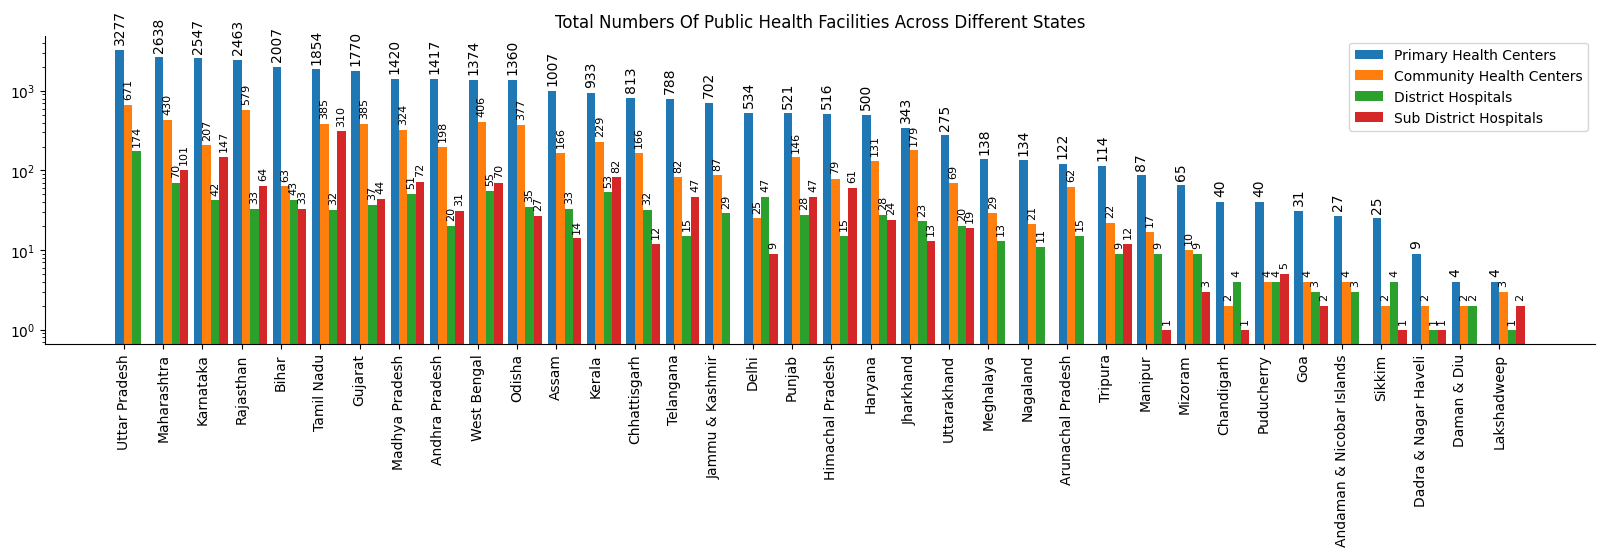

In [17]:
health_facilities = pd.read_csv("Statewise_Health_Facilities.csv").sort_values('Primary_Health_Centers', ascending = False)
width = 1.5
x_primary = np.arange(0, 7*len(health_facilities['State_UT']) - 1, 7)
x_community = [i + width for i in x_primary]
x_district = [j + width for j in x_community]
x_sub_district = [k + width for k in x_district]


fig,ax = plt.subplots(figsize = (20,4))
primary_bars = ax.bar(x_primary, health_facilities['Primary_Health_Centers'], width, label = 'Primary Health Centers')
community_bars = ax.bar(x_community, health_facilities['Community_Health_Centers'], width, label = 'Community Health Centers')
district_bars = ax.bar(x_district, health_facilities['District_Hospitals'], width, label = 'District Hospitals')
sub_district_bars = ax.bar(x_sub_district, health_facilities['Sub_District_Hospitals'], width, label = 'Sub District Hospitals')

ax.bar_label(primary_bars, padding = 4, fontsize = 10)
ax.bar_label(community_bars, padding = 4, fontsize = 8)
ax.bar_label(district_bars, padding = 4, fontsize = 8)
ax.bar_label(sub_district_bars, padding = 4, fontsize = 8)

ax.set_xticks(x_primary + width/2)
ax.tick_params(axis = 'x', rotation = 90, labelsize = 10)
ax.set_xticklabels(health_facilities['State_UT'])
ax.legend()

for label in ax.texts:
    label.set_rotation(90)

ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False) 
ax.set_yscale('log')
ax.set_title("Total Numbers Of Public Health Facilities Across Different States")

plt.show();

This graph shows the number of Primary Health Centers, Community Health Centers, District Hospitals, and Sub-District Hospitals across different states of India. It will help us understand the healthcare facilities in these states, enabling us to compare mortality rates across different states in later sections.

Now, let's find the total number of beds in these states.

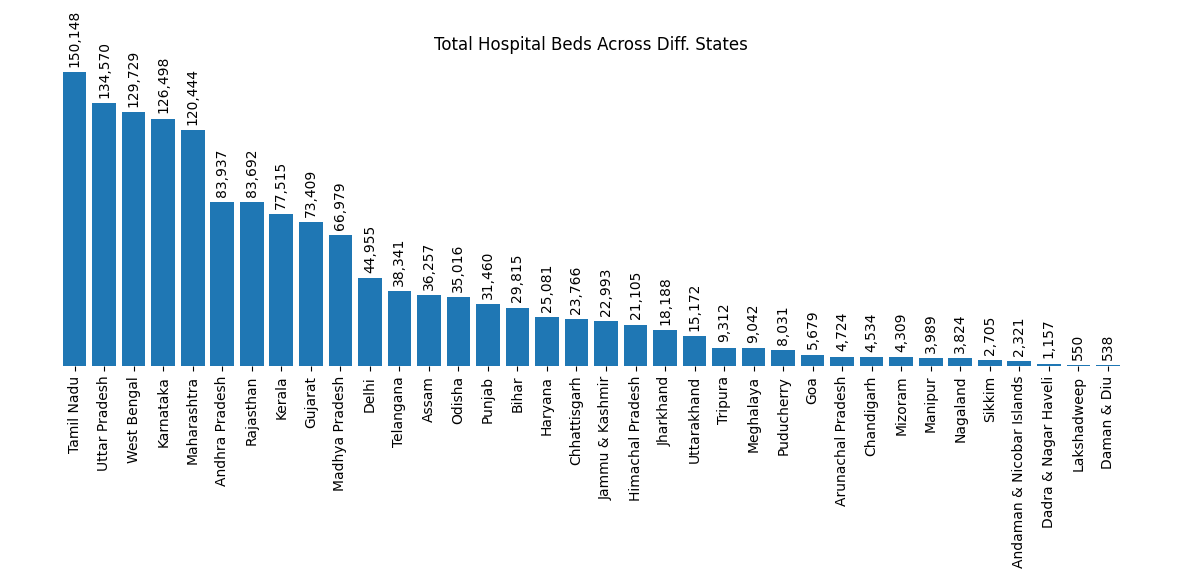

In [18]:
fig, ax = plt.subplots(figsize = (15,4))
hospital_beds_bars = ax.bar(health_facilities.sort_values('Total_Hospital_Beds', ascending = False)['State_UT'], 
                            health_facilities.sort_values('Total_Hospital_Beds', ascending = False)['Total_Hospital_Beds'])

ax.bar_label(hospital_beds_bars, fmt = '{:,.0f}', padding = 4)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_yticks(ticks = [])
ax.set_title("Total Hospital Beds Across Diff. States")

for label in ax.texts:
    label.set_rotation(90)
for spine in ax.spines.values():
    spine.set_visible(False)    


plt.show();

To better understand the healthcare facilities, let's also consider the population in these states by calculating the 'Number of Beds per 1,000 People'.

In [19]:
census_df = pd.read_excel('Census.xlsx')
census_df.head(2)

Unnamed: 0  Unnamed: 1          Unnamed: 2
0   State_UT  Population  Population Density
1     India   1210854977                 382

In [20]:
census_df.columns = census_df.loc[0]
census_df.drop(0, inplace=True)
census_df.head(2)

0       State_UT  Population Population Density
1         India   1210854977                382
2  Uttar Pradesh   199812341                829

In [21]:
health_facilities = pd.merge(health_facilities, census_df.loc[:, ["State_UT", "Population"]], on = 'State_UT')
health_facilities['Beds_Per_1K_People'] = health_facilities['Total_Hospital_Beds']*1000 / health_facilities['Population']
health_facilities.head()

State_UT  Primary_Health_Centers  Community_Health_Centers  \
0  Uttar Pradesh                    3277                       671   
1    Maharashtra                    2638                       430   
2      Karnataka                    2547                       207   
3      Rajasthan                    2463                       579   
4          Bihar                    2007                        63   

   Sub_District_Hospitals  District_Hospitals  Total_Public_Health_Facilities  \
0                       0                 174                            4122   
1                     101                  70                            3239   
2                     147                  42                            2943   
3                      64                  33                            3139   
4                      33                  43                            2146   

   Total_Public_Beds  Rural_Hospitals  Total_Rural_Beds  Urban_Hospitals  \
0              58310             4442             39104              193   
1              68998              273             12398              438   
2              56333             2471             21072              374   
3              51844              602             21088              150   
4              17796              930              6083              103   

   Total_Urban_Beds  Total_Hospital_Beds Population Beds_Per_1K_People  
0             37156               134570  199812341           0.673482  
1             39048               120444  112374333           1.071811  
2             49093               126498   61095297           2.070503  
3             10760                83692   68548437           1.220918  
4              5936                29815  104099452           0.286409

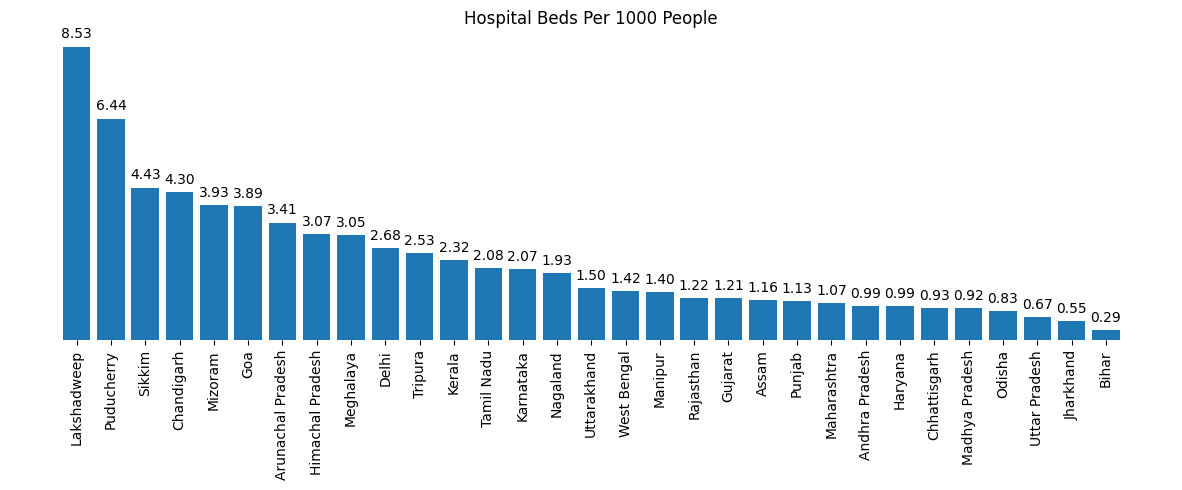

In [22]:
fig, ax = plt.subplots(figsize = (15,4))
hospital_beds_Per_1K_bars = ax.bar(health_facilities.sort_values('Beds_Per_1K_People', ascending = False)['State_UT'], 
                            health_facilities.sort_values('Beds_Per_1K_People', ascending = False)['Beds_Per_1K_People'])

ax.bar_label(hospital_beds_Per_1K_bars, fmt = '{:,.2f}', padding = 4)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_yticks(ticks = [])
ax.set_title("Hospital Beds Per 1000 People")

for spine in ax.spines.values():
    spine.set_visible(False)    
    
plt.show();

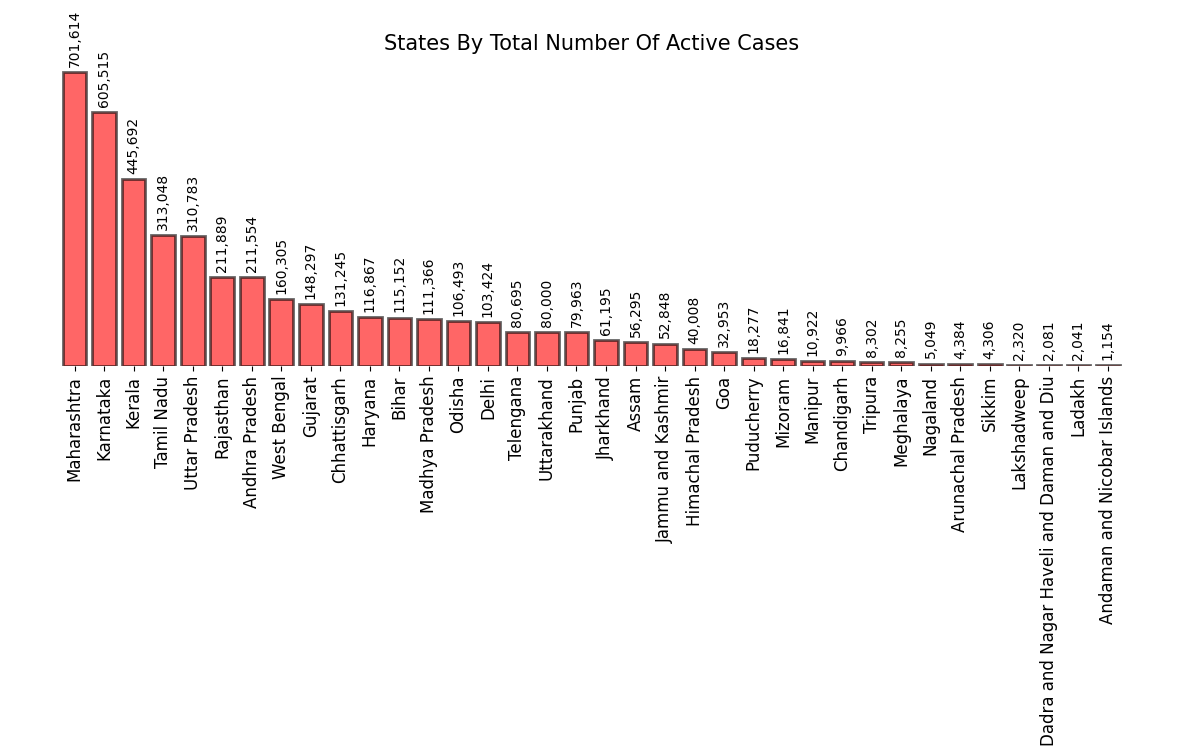

In [23]:
fig,ax = plt.subplots(figsize = (15,4))
active_cases_bars = ax.bar(statewise_df.sort_values('Active', ascending = False)['State_UT'], 
                           statewise_df.sort_values('Active', ascending = False)['Active'], color = 'red',
                           alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax.bar_label(active_cases_bars, fmt = '{:,.0f}', padding = 4)
ax.set_title("States By Total Number Of Active Cases", fontsize = 15)
plt.xticks(rotation = 90)
plt.yticks(ticks = [])
ax.tick_params(axis='x', which='both', color='k', labelsize=12, labelleft = True)

for label in ax.texts:
    label.set_rotation(90)
    
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show();

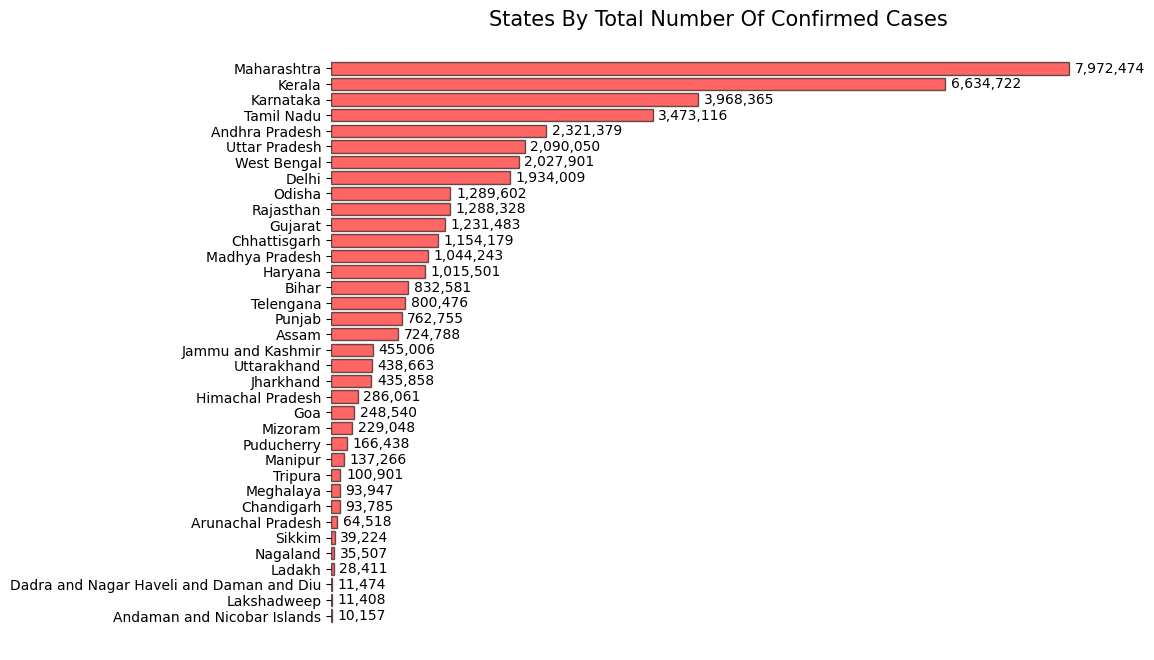

In [24]:
fig,ax = plt.subplots(figsize = (10,8))
confirmed_cases_bars = ax.barh(statewise_df['State_UT'], statewise_df['Confirmed'], color = 'red'
                               , alpha = 0.6, edgecolor = 'k')
ax.bar_label(confirmed_cases_bars, fmt = '{:,.0f}', padding = 4)
ax.set_title("States By Total Number Of Confirmed Cases", fontsize = 15)
plt.xticks(ticks = [])
ax.invert_yaxis()

for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show();

- We can clearly see that Maharastra, Kerala, Kernataka, Tamil Nadu, Andra pradesh are among the most affected states in terms of total confirmed Covid-19 cases.
- Maharashtra has the highest number of confirmed cases, with approximately 8 million cases.
- Kerala follows closely with around 6.5 million cases.
- In contrast, the least affected states are primarily northeastern states or Union Territories (UTs), indicating a lower number of confirmed cases in these regions.

In [25]:
HTML('''<div class="flourish-embed flourish-map" data-src="visualisation/17592783">
<script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

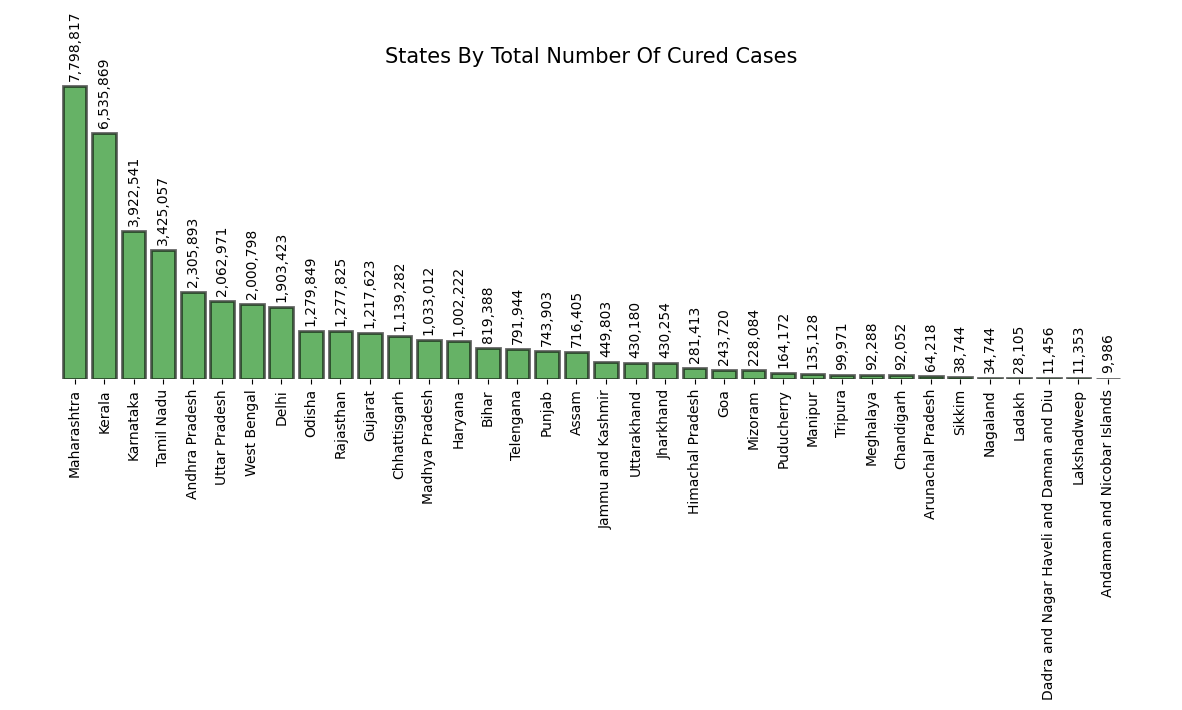

In [26]:
fig,ax = plt.subplots(figsize = (15,4))
cured_cases_bars = ax.bar(statewise_df['State_UT'], statewise_df['Cured'], color = 'green'
                               , alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax.bar_label(cured_cases_bars, fmt = '{:,.0f}', padding = 4)
ax.set_title("States By Total Number Of Cured Cases", fontsize = 15)
plt.xticks(rotation = 90)
plt.yticks(ticks = [])

for label in ax.texts:
    label.set_rotation(90)

for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show();

- States with the most COVID-19 cases also have high recoveries , suggesting a good chance of recovery with proper care.
- However, this doesn't tell the whole story. To gain a better understanding, we should examine the death rate (deaths per 100 confirmed cases) across different states.

In [27]:
statewise_df.sort_values('Deaths', ascending = False)['Deaths'].index

Index([20, 16, 15, 30,  8, 33, 35, 27,  1,  6,  4, 10, 19, 11, 28, 25,  3, 34,
       14, 13, 12, 31,  9, 21, 26, 22,  5, 32, 24, 23, 29,  2, 17,  0, 18,  7],
      dtype='int64')

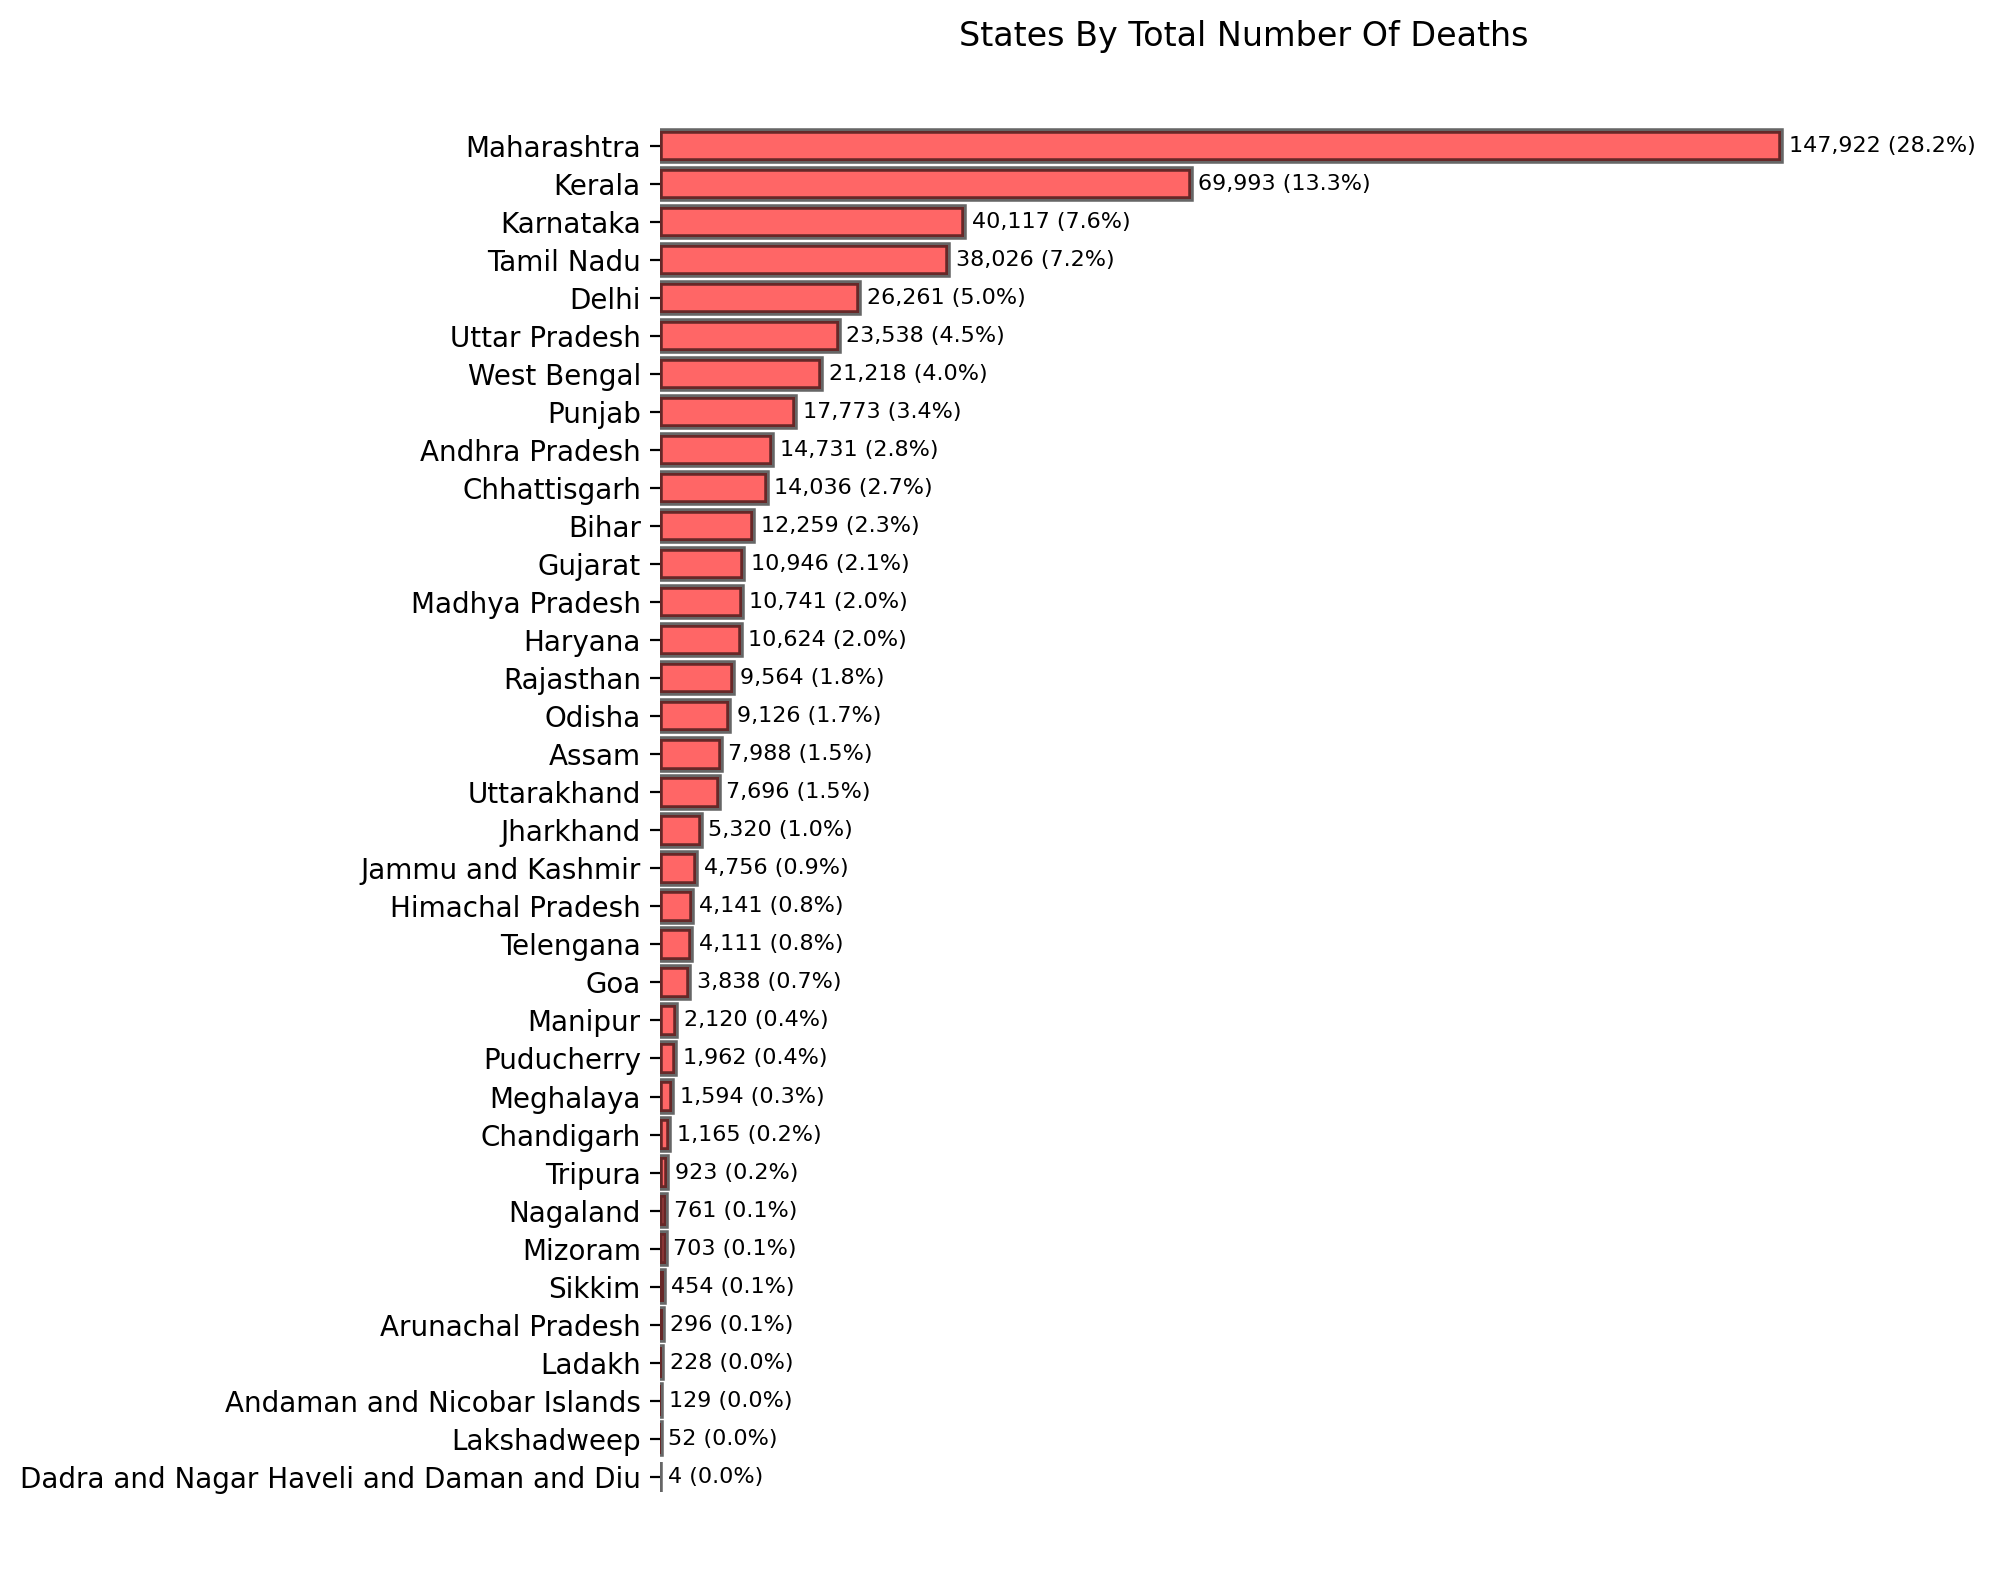

In [28]:
fig,ax = plt.subplots(figsize = (10,8), dpi = 200)
death_bars = ax.barh(statewise_df.sort_values('Deaths', ascending = True)['State_UT'], 
                     statewise_df.sort_values('Deaths', ascending = True)['Deaths'], color = 'red',
                     alpha = 0.6, edgecolor = 'k', linewidth = 2)

for i in statewise_df.sort_values('Deaths', ascending = True)['Deaths'].index:
    ax.text(statewise_df['Deaths'].iloc[i] + 1000, statewise_df['State_UT'].iloc[i], f'{statewise_df["Deaths"].iloc[i] :,.0f} ({statewise_df["Deaths Share (%)"].iloc[i] :.1f}%)', 
            verticalalignment = 'center', fontsize = 8)

ax.set_title("States By Total Number Of Deaths ")
plt.xticks(ticks = [])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show();

- Only three states, Maharashtra, Kerala, and Karnataka account for almost 50% of the overall deaths across the country.
- The remaining 50% of deaths come from the other 29 states and Union Territories.
  
However, this doesn't portray a clear picture since we have not adjusted the deaths for population differences. To gain a clearer understanding, we should examine the number of deaths within a specific sample size.

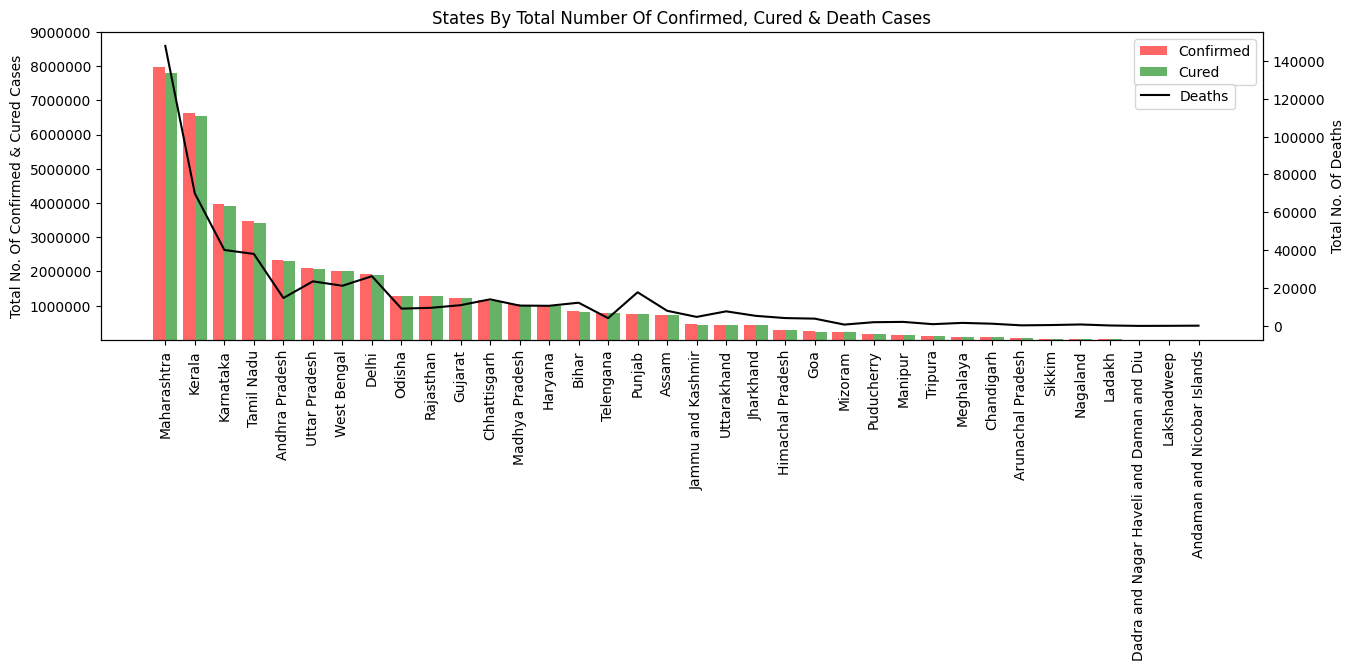

In [29]:
width = 0.8
x_confirmed = np.arange(0, 2*len(statewise_df['State_UT']), 2)
x_cured = [j + width for j in x_confirmed]

fig,ax = plt.subplots(figsize = (15,4))
bars_confirmed = ax.bar(x_confirmed, statewise_df['Confirmed'], width, label = 'Confirmed', color = 'red', alpha = 0.6)
bars_cured = ax.bar(x_cured, statewise_df['Cured'], width, label = 'Cured', color = 'green', alpha = 0.6)

ax2 = ax.twinx()
line_deaths = ax2.plot(x_confirmed + width/2, statewise_df['Deaths'], color = 'k', label = 'Deaths')

ax.set_xticks(x_confirmed + width/2)
ax.set_xticklabels(statewise_df['State_UT'])
ax.tick_params(axis = 'x', rotation = 90)
ax.legend()
ax2.legend(loc = (0.89,0.75))
plt.title("States By Total Number Of Confirmed, Cured & Death Cases")
ax.set_ylabel("Total No. Of Confirmed & Cured Cases")
ax2.set_ylabel("Total No. Of Deaths")
ax.set_yticks(np.arange(1000000,10000000,1000000))
ax.set_yticklabels(np.arange(1000000,10000000,1000000))

plt.show();

This graph indicates that recoveries tend to increase with the number of confirmed cases. However, deaths do not always follow this trend. For instance:

- Punjab has a comparatively lower number of cases than Delhi, Odisha, and Rajasthan, yet it has more deaths than these states.
- Similarly, Chhattisgarh and Gujarat, despite having fewer Covid-19 patients than Rajasthan and Odisha, report more deaths.

This highlights that the number of deaths is not solely dependent on the number of confirmed cases.

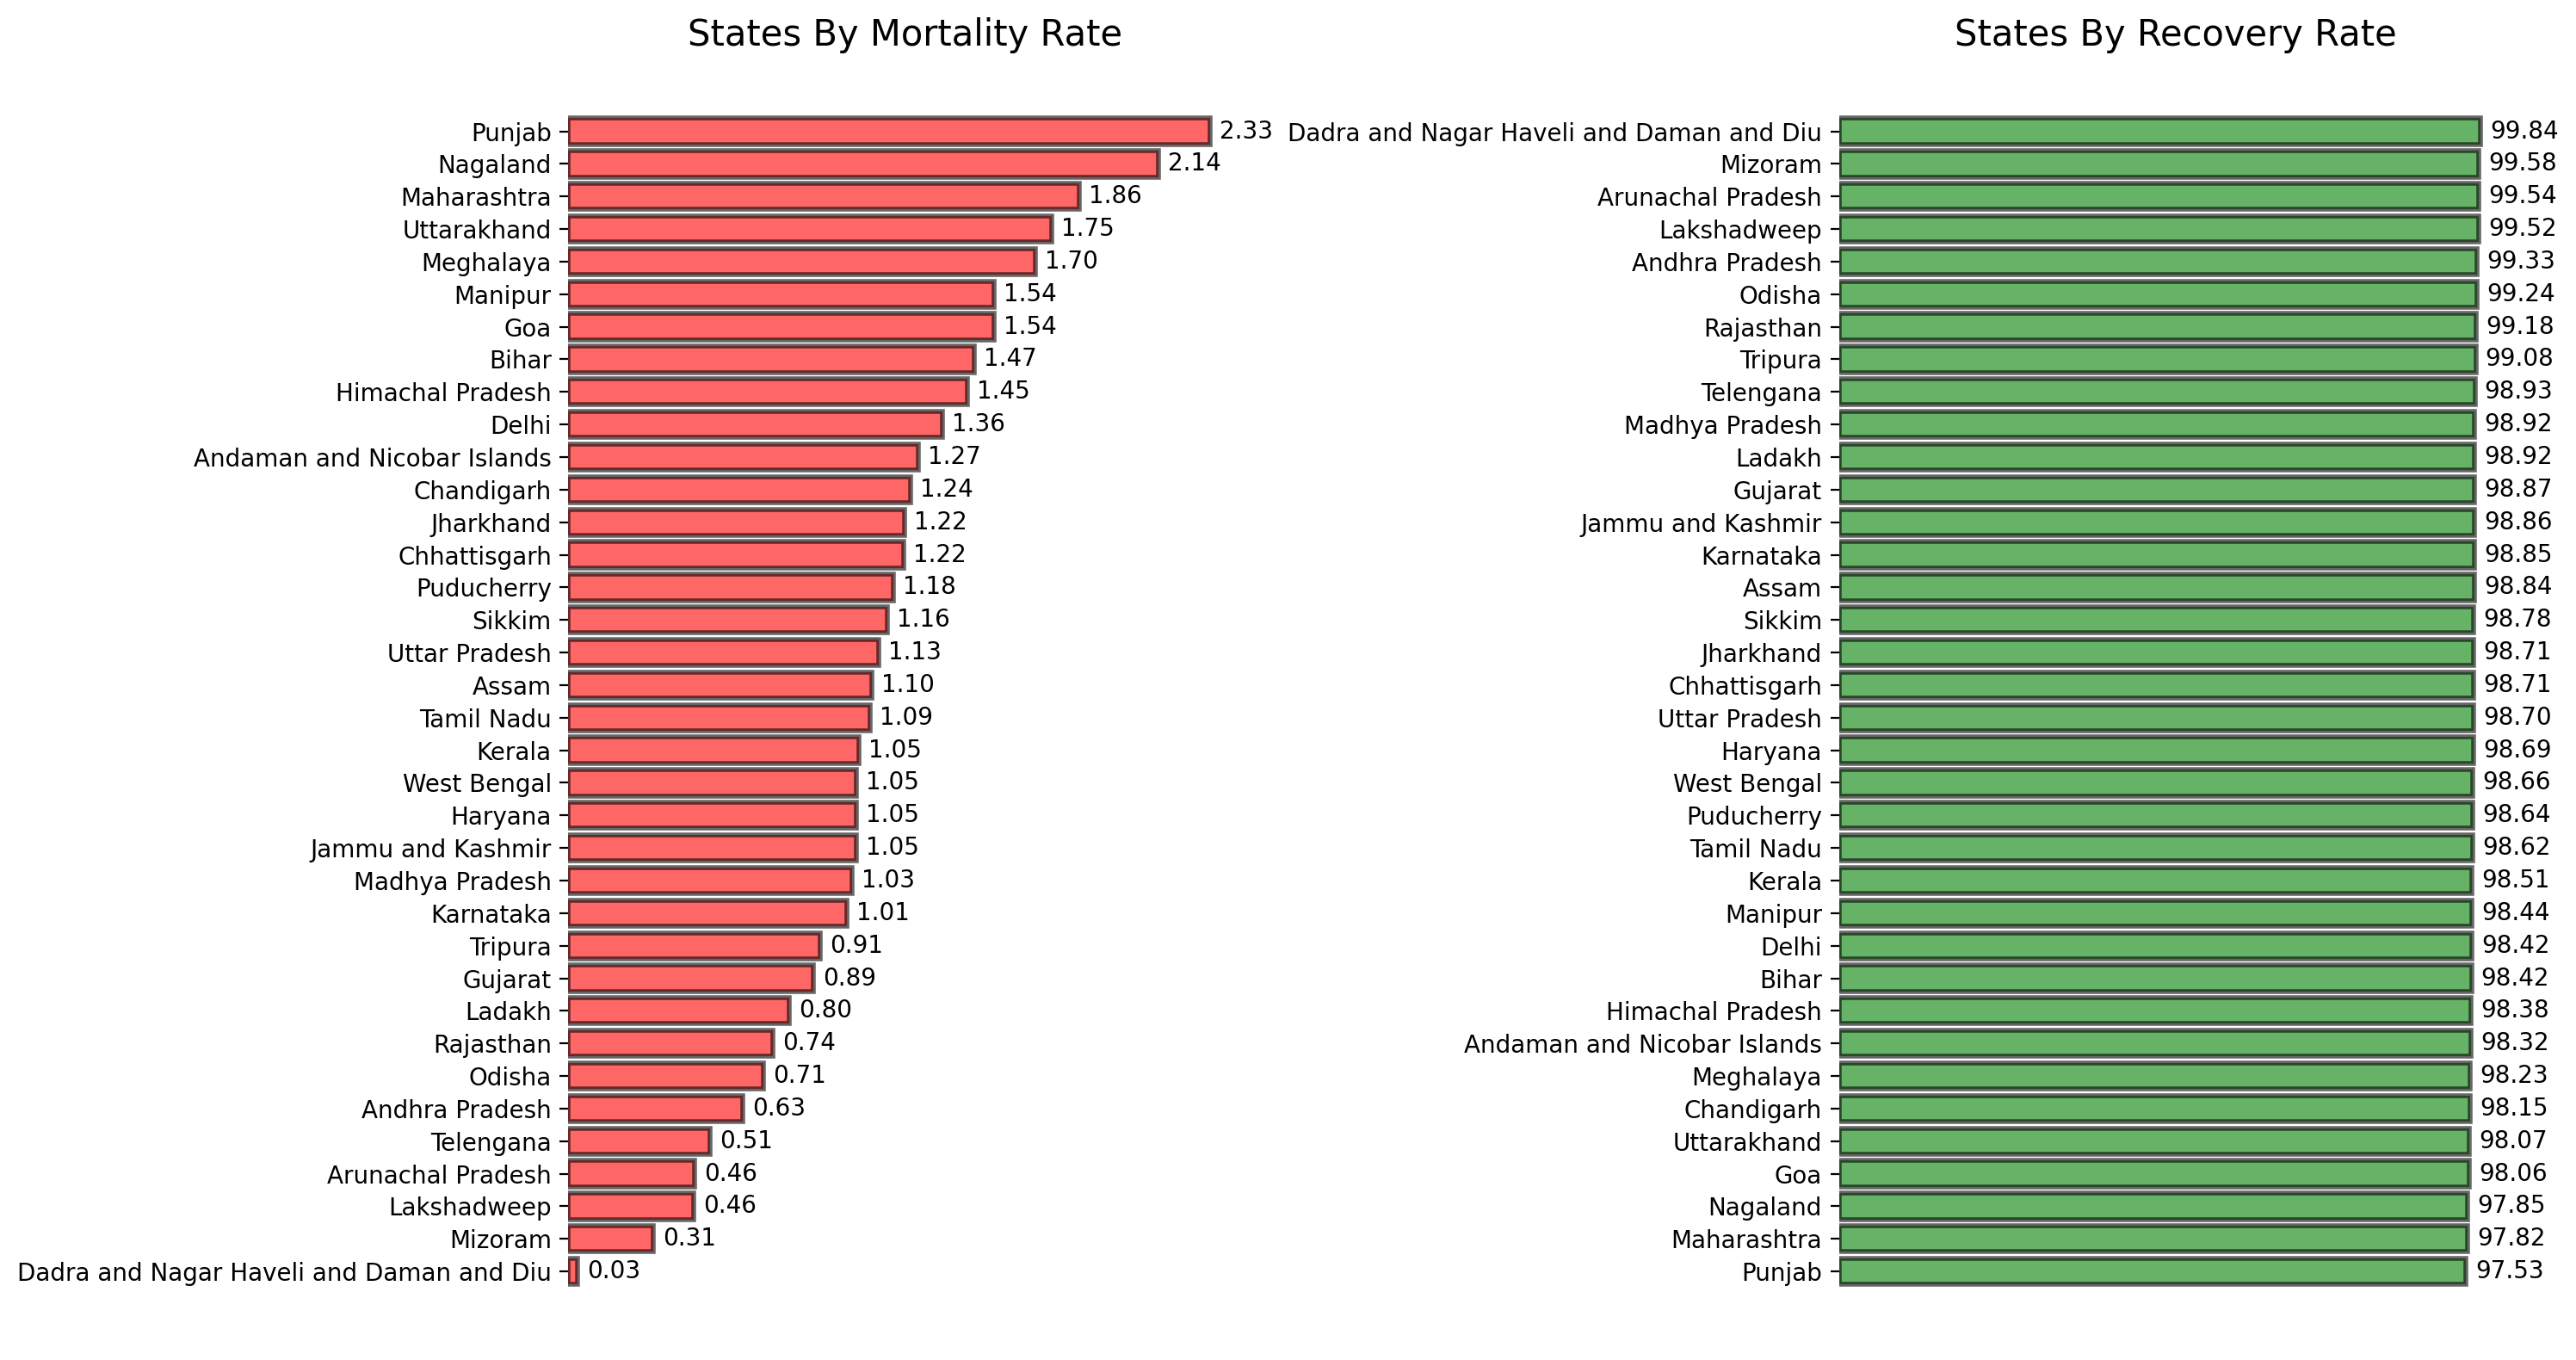

In [30]:
fig,ax = plt.subplots(1, 2, figsize = (15,8), dpi = 200)

Mortality_Rate_bars = ax[0].barh(statewise_df.sort_values('Mortality Rate', ascending = True)['State_UT'], 
                                statewise_df.sort_values('Mortality Rate', ascending = True)['Mortality Rate'], 
                                color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)

Recovery_Rate_bars = ax[1].barh(statewise_df.sort_values('Recovery Rate', ascending = True)['State_UT'], 
                                statewise_df.sort_values('Recovery Rate', ascending = True)['Recovery Rate'], 
                               color = 'g', alpha = 0.6, edgecolor = 'k', linewidth = 2)

ax[0].bar_label(Mortality_Rate_bars, fmt = '{:,.2f}', padding = 4)
ax[1].bar_label(Recovery_Rate_bars, fmt = '{:,.2f}', padding = 4)
ax[0].set_title("States By Mortality Rate", fontsize = 15)
ax[1].set_title("States By Recovery Rate", fontsize = 15)

ax[0].set_xticks([])
ax[1].set_xticks([])
    
for i in (0,1):
    for spine in ax[i].spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show();

- Punjab has the highest mortality rate (2.33%) among all the states in India, despite having a comparatively lower number of Covid-19 patients.
- Remarkably, all states in the graph above Jharkhand have a mortality rate higher than the national average of 1.22%.

However, these statistics alone do not portray a clear picture since India is a country of diverse demographics and regional variations. To get a better understanding of the disease's spread, we should analyze the impact of disease within a specific sample size across various states.

In [31]:
statewise_df = pd.merge(statewise_df, census_df, on = 'State_UT')
statewise_df.head()

State_UT    Active  Confirmed      Cured    Deaths  Recovery Rate  \
0     Maharashtra  701614.0  7972474.0  7798817.0  147922.0      97.821793   
1          Kerala  445692.0  6634722.0  6535869.0   69993.0      98.510066   
2       Karnataka  605515.0  3968365.0  3922541.0   40117.0      98.845268   
3      Tamil Nadu  313048.0  3473116.0  3425057.0   38026.0      98.616257   
4  Andhra Pradesh  211554.0  2321379.0  2305893.0   14731.0      99.332897   

   Mortality Rate  Deaths Share (%) Population Population Density  
0        1.855409         28.169395  112374333         365.192023  
1        1.054950         13.329055   33406061                860  
2        1.010920          7.639645   61095297                319  
3        1.094867          7.241448   72147030                555  
4        0.634580          2.805285   84580777         307.516141

In [32]:
statewise_df['Cases Per M']= statewise_df['Confirmed']*1000000/statewise_df['Population']
statewise_df.head()

State_UT    Active  Confirmed      Cured    Deaths  Recovery Rate  \
0     Maharashtra  701614.0  7972474.0  7798817.0  147922.0      97.821793   
1          Kerala  445692.0  6634722.0  6535869.0   69993.0      98.510066   
2       Karnataka  605515.0  3968365.0  3922541.0   40117.0      98.845268   
3      Tamil Nadu  313048.0  3473116.0  3425057.0   38026.0      98.616257   
4  Andhra Pradesh  211554.0  2321379.0  2305893.0   14731.0      99.332897   

   Mortality Rate  Deaths Share (%) Population Population Density  \
0        1.855409         28.169395  112374333         365.192023   
1        1.054950         13.329055   33406061                860   
2        1.010920          7.639645   61095297                319   
3        1.094867          7.241448   72147030                555   
4        0.634580          2.805285   84580777         307.516141   

     Cases Per M  
0   70945.684723  
1  198608.330387  
2   64953.690298  
3    48139.41752  
4   27445.704359

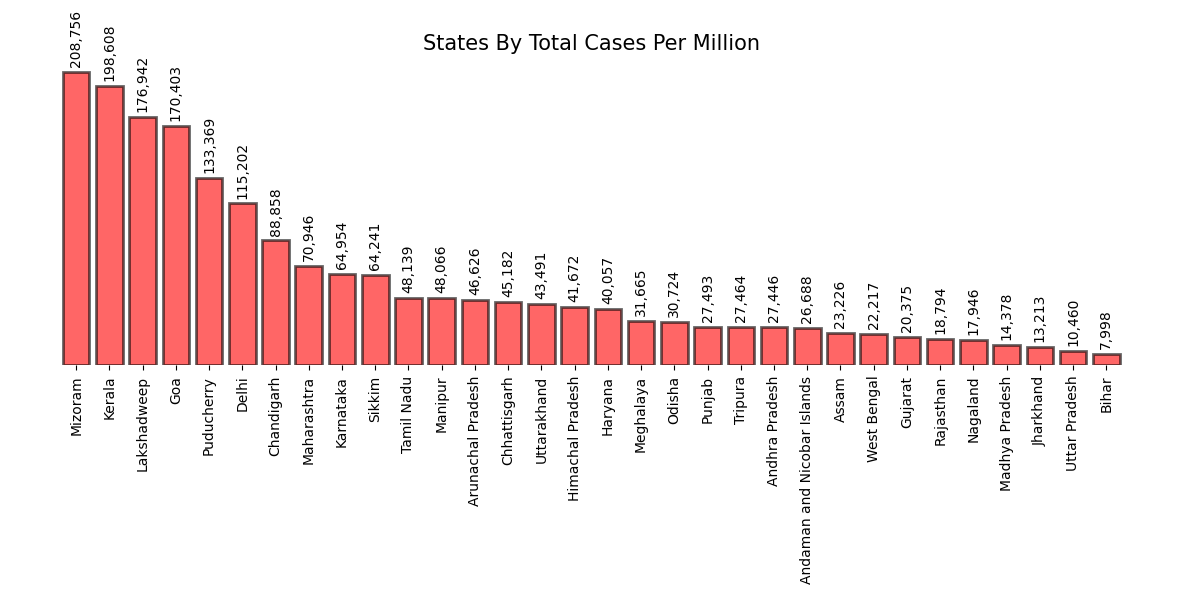

In [33]:
fig,ax = plt.subplots(figsize = (15,4))
cases_PerM_bars = ax.bar(statewise_df.sort_values('Cases Per M', ascending = False)['State_UT'], 
                         statewise_df.sort_values('Cases Per M', ascending = False)['Cases Per M'], 
                         color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax.bar_label(cases_PerM_bars, fmt = '{:,.0f}', padding = 4)
ax.set_title("States By Total Cases Per Million", fontsize = 15)
plt.xticks(rotation = 90)
plt.yticks(ticks = [])

for label in ax.texts:
    label.set_rotation(90)

for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show();

- Here, we can observe that the spread of the virus in Maharashtra is not as severe as it might appear, despite accounting for the most confirmed cases and deaths in the country. This can be attributed to its large population, as it is one of the most populated state in India. 
- On the other hand, Mizoram and Kerala are in a much worse state, with the virus spreading at a much higher rate compared to other states.

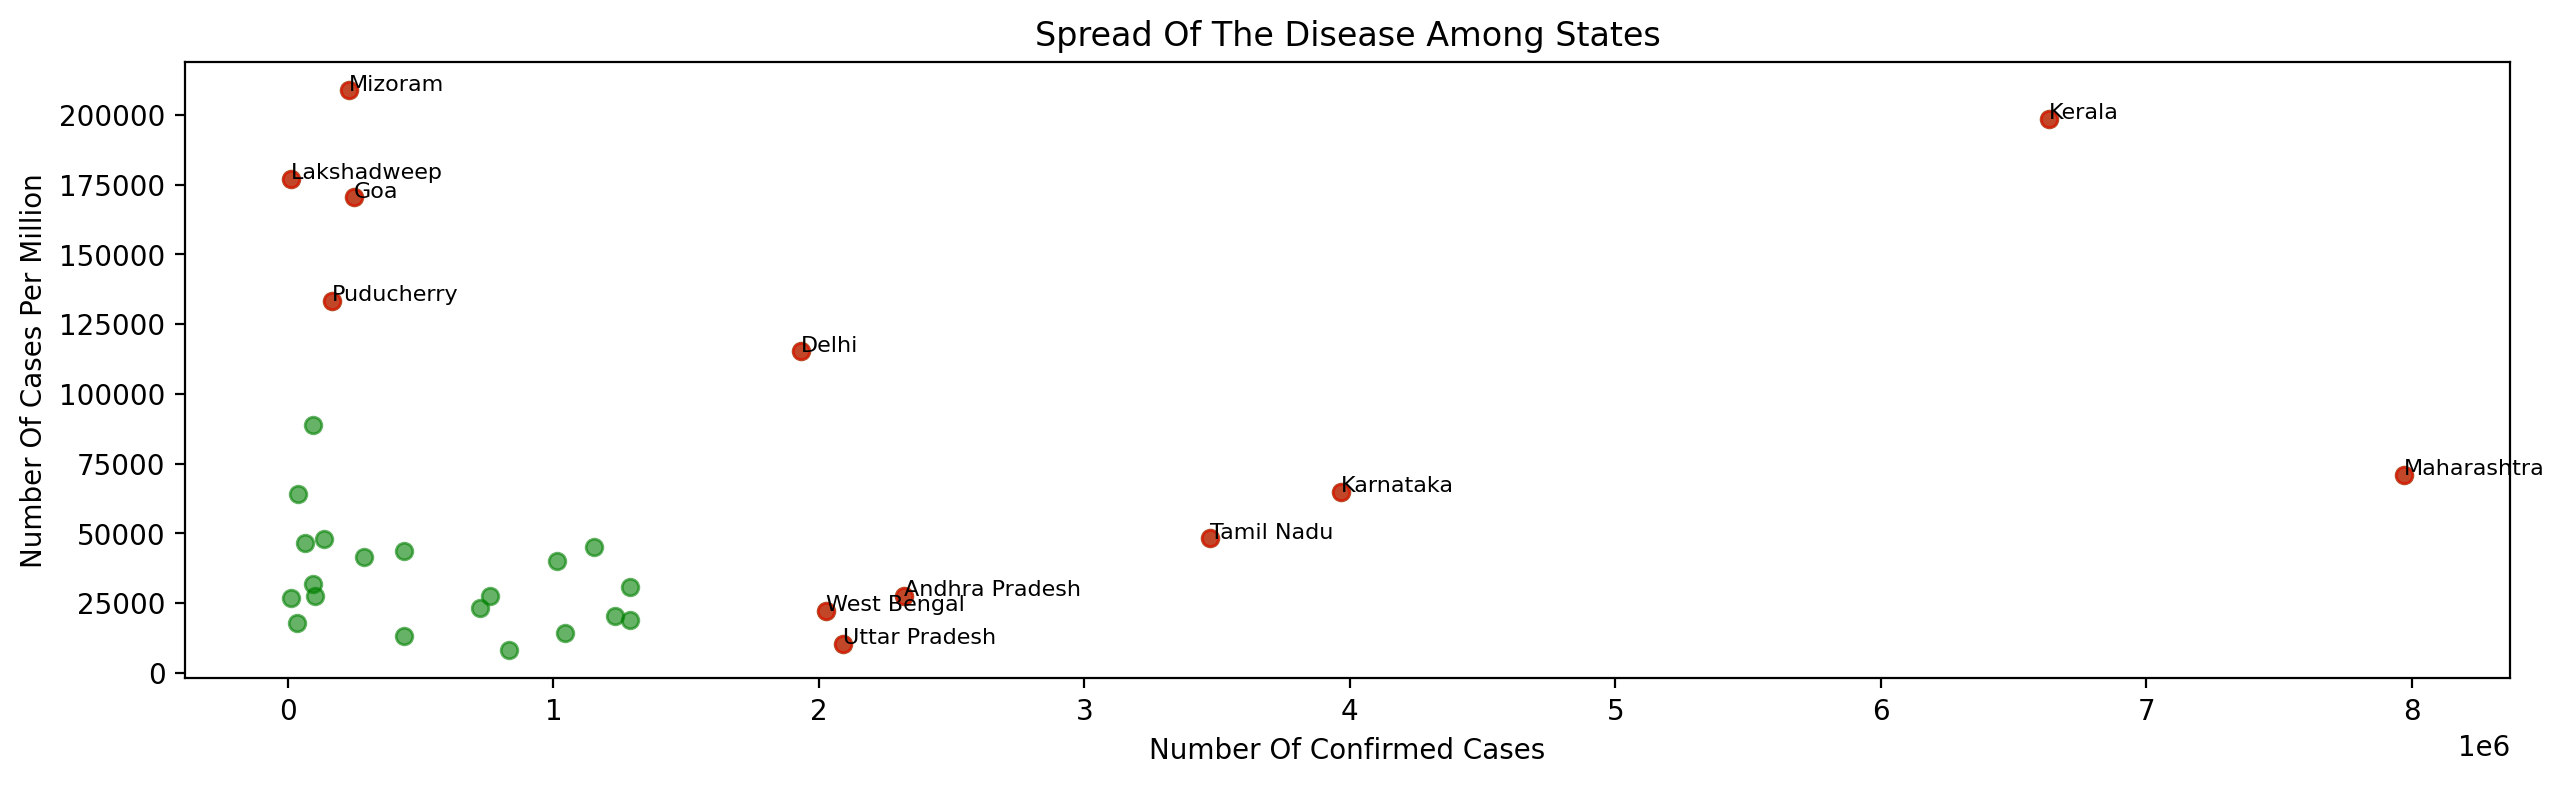

In [34]:
filtered_statewise_df = statewise_df[(statewise_df['Confirmed'] >= 2000000) | (statewise_df['Cases Per M'] >= 100000)]

plt.figure(figsize = (15,4), dpi = 200)
plt.scatter(statewise_df['Confirmed'], statewise_df['Cases Per M'], alpha = 0.6, color = 'g')
plt.scatter(filtered_statewise_df['Confirmed'], filtered_statewise_df['Cases Per M'], alpha = 0.6, color = 'r')

for i in range(filtered_statewise_df.shape[0]):
    plt.annotate(filtered_statewise_df['State_UT'].iloc[i], xy = (filtered_statewise_df['Confirmed'].iloc[i], 
                 filtered_statewise_df['Cases Per M'].iloc[i]), 
                 size = 8)

plt.xlabel("Number Of Confirmed Cases")
plt.ylabel("Number Of Cases Per Million")
plt.title('Spread Of The Disease Among States')
    
plt.show();

- Green dots represent states with lower total confirmed cases as well as lower cases per million, indicating a less severe spread of the virus in these states.
- Conversely, red dots represent states with higher total confirmed cases or higher cases per million.
- Kerala leads in both parameters, suggesting that the spread of the virus is highest in this state.

### Analysis of India as a whole

In [35]:
india_df = covid_df.groupby('Date', as_index = False).agg({'Confirmed':'sum', 'Deaths':'sum',
                                                              'Active':'sum', 'Cured':'sum'}) 
india_df['Daily New Cases'] = india_df['Confirmed'].diff()
india_df['Daily New Deaths'] = india_df['Deaths'].diff()
india_df['Daily New Recoveries'] = india_df['Cured'].diff()
india_df['Daily New Cases'].fillna(india_df['Confirmed'], inplace= True)
india_df['Daily New Deaths'].fillna(india_df['Deaths'], inplace= True)
india_df['Daily New Recoveries'].fillna(india_df['Cured'], inplace= True)
india_df

Date   Confirmed    Deaths    Active       Cured  Daily New Cases  \
0   2020-01-30         1.0       0.0       1.0         0.0              1.0   
1   2020-01-31         1.0       0.0       1.0         0.0              0.0   
2   2020-02-01         2.0       0.0       2.0         0.0              1.0   
3   2020-02-02         3.0       0.0       3.0         0.0              1.0   
4   2020-02-03         3.0       0.0       3.0         0.0              0.0   
..         ...         ...       ...       ...         ...              ...   
846 2022-06-26  43389973.0  524999.0   92576.0  42772398.0          11739.0   
847 2022-06-27  43407046.0  525020.0   94420.0  42787606.0          17073.0   
848 2022-06-28  43418839.0  525047.0   96700.0  42797092.0          11793.0   
849 2022-06-29  43433345.0  525094.0   99585.0  42808666.0          14506.0   
850 2022-06-30  43452164.0  525116.0  104555.0  42822493.0          18819.0   

     Daily New Deaths  Daily New Recoveries  
0                 0.0                   0.0  
1                 0.0                   0.0  
2                 0.0                   0.0  
3                 0.0                   0.0  
4                 0.0                   0.0  
..                ...                   ...  
846              15.0               10917.0  
847              21.0               15208.0  
848              27.0                9486.0  
849              47.0               11574.0  
850              22.0               13827.0  

[851 rows x 8 columns]

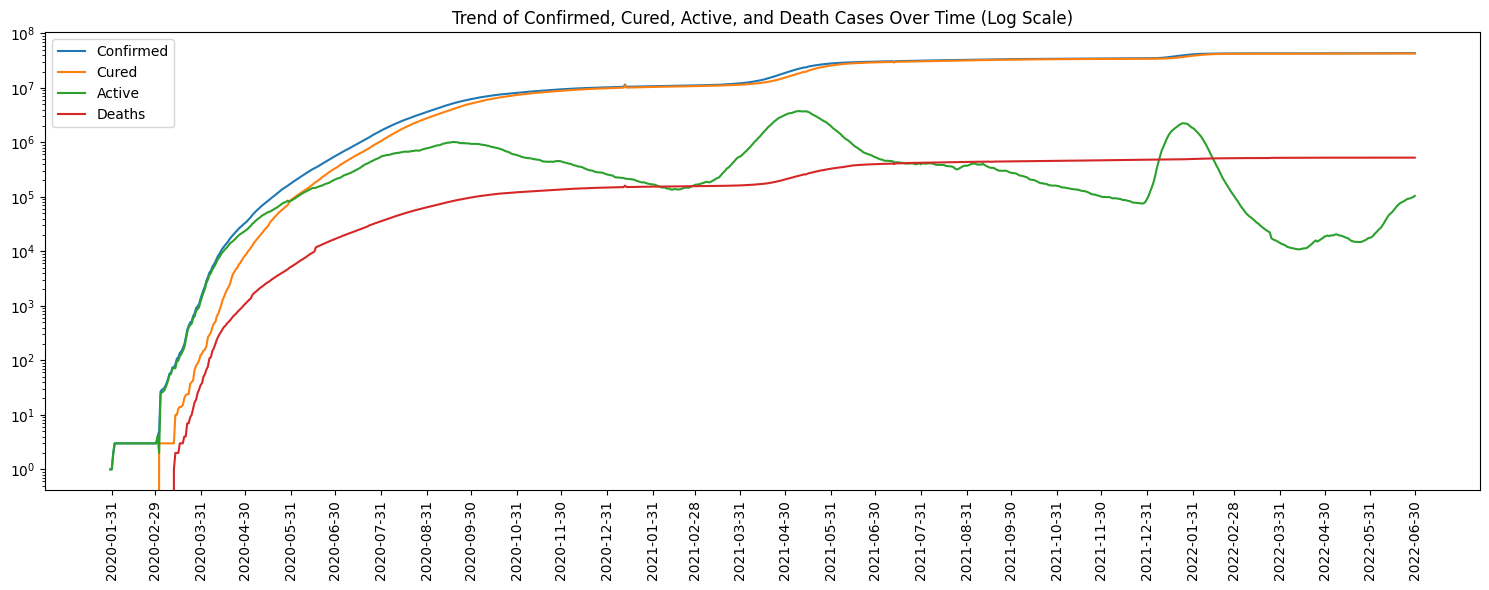

In [36]:
plt.figure(figsize =(15,6))
plt.yscale("log")
plt.plot(india_df['Date'], india_df['Confirmed'],  label = "Confirmed")
plt.plot(india_df['Date'], india_df['Cured'], label = "Cured")
plt.plot(india_df['Date'], india_df['Active'], label = "Active")
plt.plot(india_df['Date'], india_df['Deaths'], label = "Deaths")
plt.xticks(pd.date_range(start = '2020-01-01', end = '2022-07-01', freq = 'M' ), rotation = 90)
plt.title("Trend of Confirmed, Cured, Active, and Death Cases Over Time (Log Scale)")
plt.legend()

plt.tight_layout()
plt.show();

- The lines for Confirmed and Cured nearly overlap, highlighting the high recovery rate from this disease.
- These lines slightly separate only near the valleys of the "Active" line, potentially representing the waves of the disease.
- Additionally, we can observe that the growth phase in active cases near the second and third valleys nearly resembles a straight line, with the third valley's growth line being steeper than the second. This indicates exponential growth of Covid-19 patients in both phases.

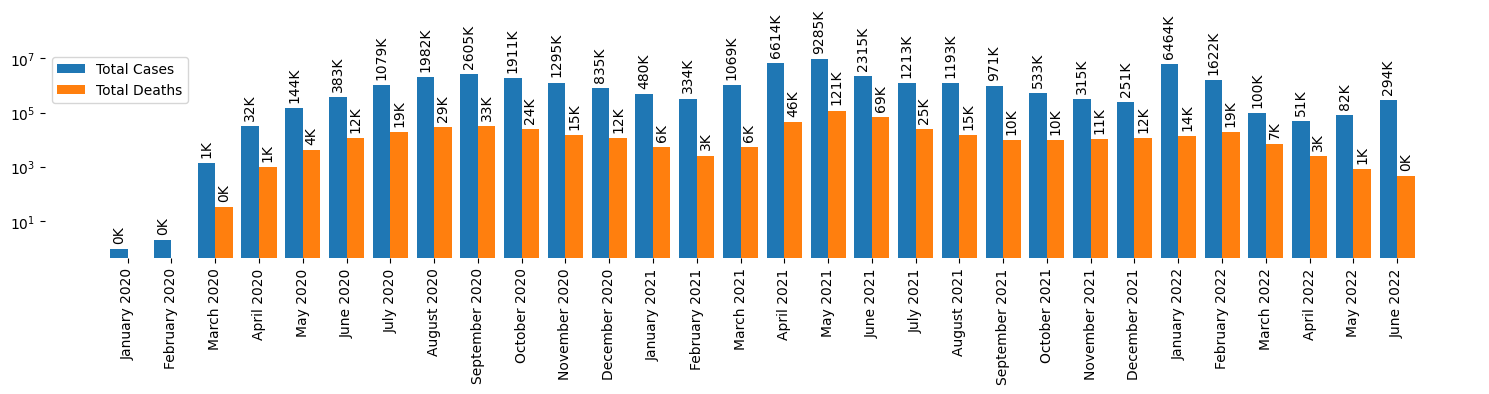

In [37]:
monthly_cases = india_df.iloc[:, [0,5,6,7]].resample('M', on='Date').sum()

fig, ax = plt.subplots(figsize=(15, 4))

width = 0.8
x_cases = np.arange(0, 2*30, 2)
x_deaths = [i + width for i in x_cases]

bars_cases = ax.bar(x_cases, monthly_cases['Daily New Cases'], width, label = "Total Cases")
bars_deaths = ax.bar(x_deaths, monthly_cases['Daily New Deaths'], width, label = "Total Deaths")

ax.bar_label(bars_cases, fmt = lambda x: f"{x / 1000:.0f}K", padding = 4, label_type = 'edge')
ax.bar_label(bars_deaths, fmt = lambda x: f"{x / 1000:.0f}K", padding = 4, label_type = 'edge')

plt.xticks(x_cases + width/2 , monthly_cases.index.strftime('%B %Y'), rotation = 90)
plt.yticks([])
plt.legend()

for label in ax.texts:
    label.set_rotation(90)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.yscale('log')
plt.tight_layout()
plt.show();

- This plot shows the numbers of confirmed cases and deaths reported in each month of the year in logarithmic scale, the logarithmic scale helps visualize both the large peaks and smaller peaks effectively.
- The five most deadliest months are May 2021 , June 2021, April 2021, Sep 2020 and Aug 2020 in which on an average more than 50K people lost their lives each month. Three of the top five months are from the second covid wave.
- Three most transmissible months are May 2021, April 2021, Jan 2021, Sep 2020, Aug 2020 in which on an avg more than 5M cases were reported each month.

#### Waves Of Covid-19

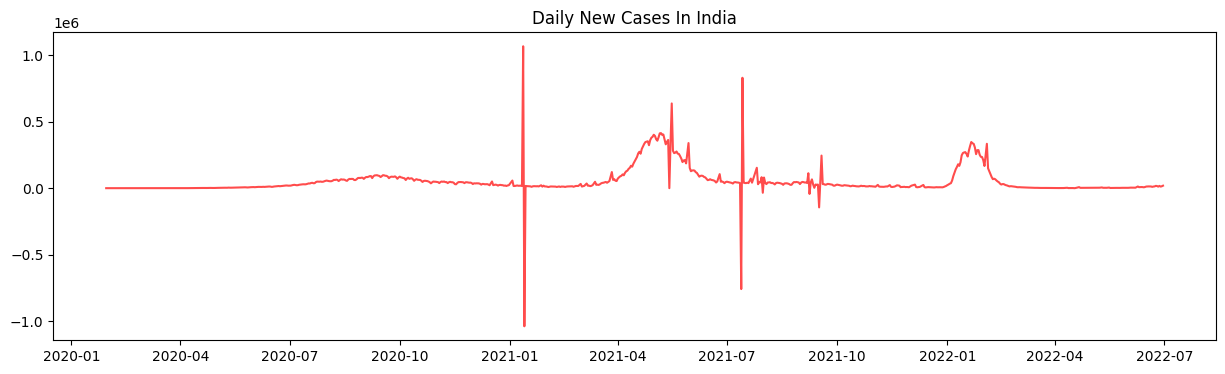

In [38]:
plt.figure(figsize = (15,4))
plt.plot(india_df['Date'], india_df['Daily New Cases'], color = 'r', alpha = 0.7)
plt.title('Daily New Cases In India')
plt.show();

In [39]:
# Dropping all those rows where 'Daily New Cases' is negative

india_df.drop(india_df[india_df['Daily New Cases'] < 0].index, inplace = True)

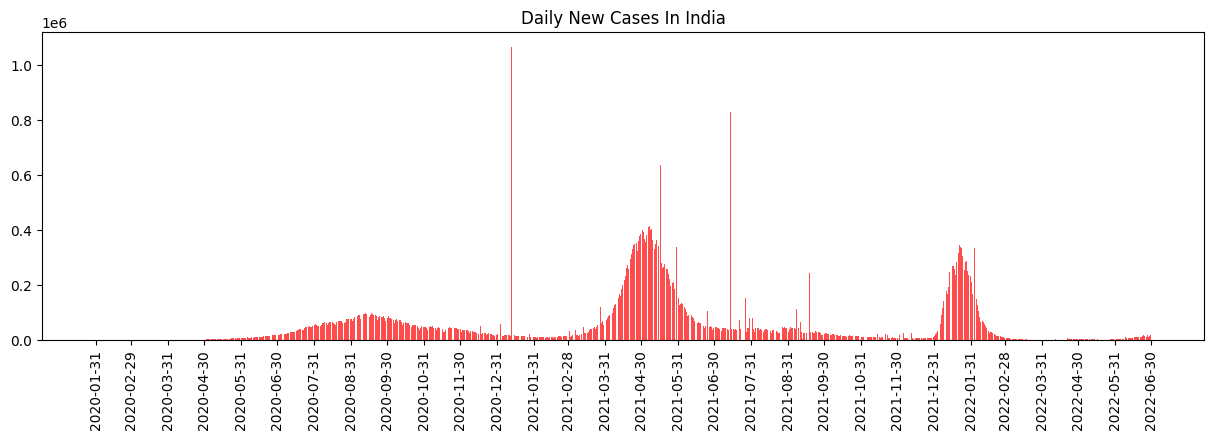

In [40]:
plt.figure(figsize = (15,4))
plt.bar(india_df['Date'], india_df['Daily New Cases'], color = 'r', alpha = 0.7)
plt.xticks(pd.date_range(start = '2020-01-01', end = '2022-07-01', freq = 'M' ), rotation = 90)

plt.title('Daily New Cases In India')
plt.show();

We can see the potential outliers here , lets remove these outline to obtain a clearer graph

In [41]:
india_df.sort_values('Daily New Cases', ascending = False).head()

Date   Confirmed    Deaths     Active       Cured  Daily New Cases  \
345 2021-01-12  11533941.0  160856.0   216751.0  11156334.0        1067346.0   
521 2021-07-14  30946074.0  411408.0   429946.0  30104720.0         830448.0   
464 2021-05-16  24684077.0  270284.0  3618458.0  20795335.0         637268.0   
455 2021-05-07  21491598.0  234083.0  3645164.0  17612351.0         414188.0   
454 2021-05-06  21077410.0  230168.0  3566398.0  17280844.0         412262.0   

     Daily New Deaths  Daily New Recoveries  
345            9696.0             1063425.0  
521           11130.0              821735.0  
464            7967.0              715736.0  
455            3915.0              331507.0  
454            3980.0              329113.0

In [42]:
india_df.drop([345, 521, 464, 477], inplace = True)

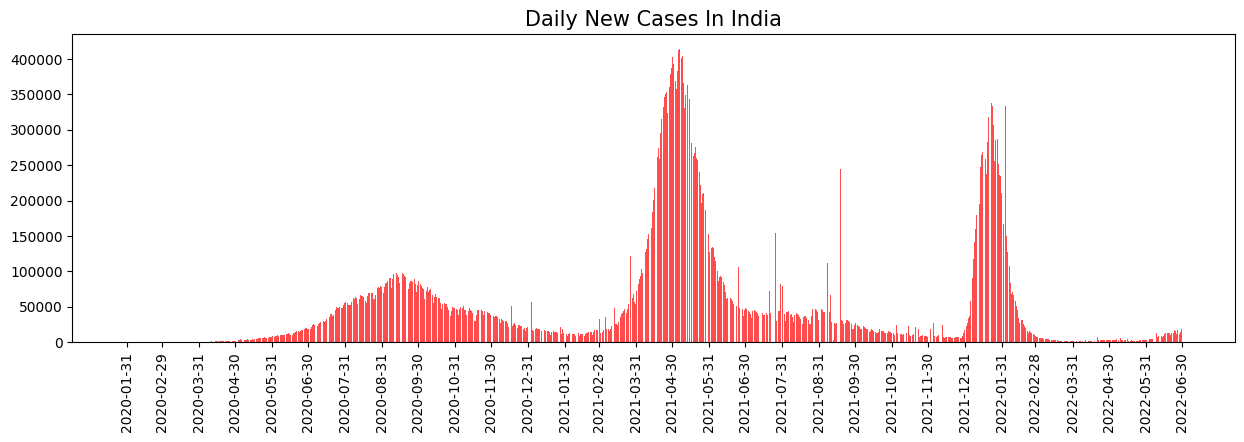

In [43]:
plt.figure(figsize = (15,4))
plt.bar(india_df['Date'], india_df['Daily New Cases'], color = 'r', alpha = 0.7)
plt.title('Daily New Cases In India', fontsize = 15)
plt.xticks(pd.date_range(start = '2020-01-01', end = '2022-07-01', freq = 'm' ), rotation = 90)
plt.show();

In [44]:
filtered_india_df = india_df[(india_df['Date'] > '2021-06-25') & (india_df['Date'] < '2021-09-30')]
india_df.drop(filtered_india_df[filtered_india_df['Daily New Cases'] > 50000].index, inplace = True)

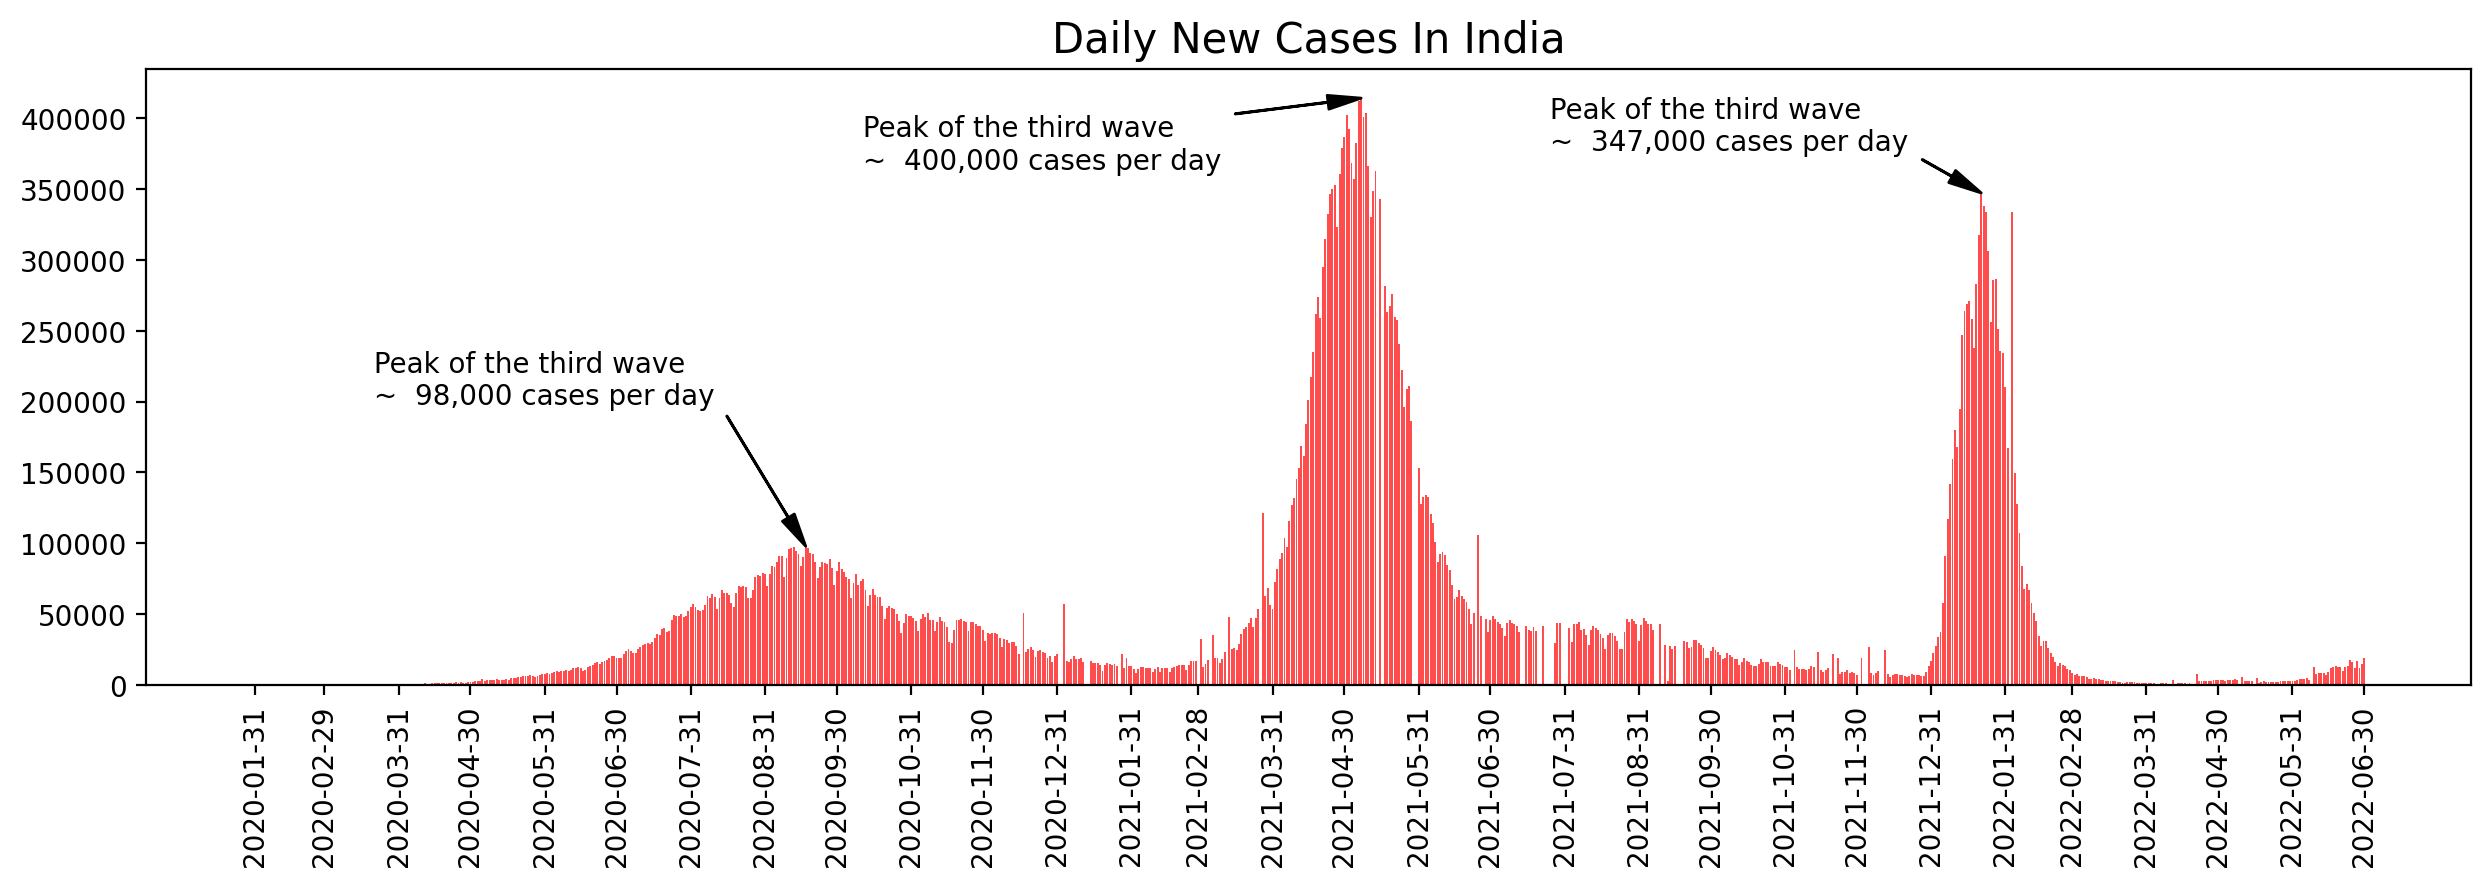

In [45]:
first_wave = india_df[(india_df['Date'] >= '2020-04-01') & (india_df['Date'] <= '2021-01-31')].copy()
second_wave = india_df[(india_df['Date'] >= '2021-03-01') & (india_df['Date'] <= '2021-06-30')].copy()
third_wave = india_df[(india_df['Date'] >= '2022-01-01') & (india_df['Date'] <= '2022-02-28')].copy()

first_wave_peak = round(first_wave[first_wave['Daily New Cases'] == first_wave['Daily New Cases'].max()]['Daily New Cases'].iloc[0], -3)
second_wave_peak = round(second_wave[second_wave['Daily New Cases'] == second_wave['Daily New Cases'].max()]['Daily New Cases'].iloc[0], -5)
third_wave_peak = round(third_wave[third_wave['Daily New Cases'] == third_wave['Daily New Cases'].max()]['Daily New Cases'].iloc[0], -3)

plt.figure(figsize = (15,4), dpi = 200)
plt.bar(india_df['Date'], india_df['Daily New Cases'], color = 'r', alpha = 0.7)

plt.xticks(pd.date_range(start = '2020-01-01', end = '2022-07-01', freq = 'm' ), rotation = 90)
plt.annotate(f' Peak of the third wave \n ~ {first_wave_peak: ,.0f} cases per day ', 
             xy = (first_wave[first_wave['Daily New Cases'] == max(first_wave['Daily New Cases'])]['Date'], max(first_wave['Daily New Cases'])), 
             xytext = (first_wave[first_wave['Daily New Cases'] == max(first_wave['Daily New Cases'])]['Date'] - pd.DateOffset(months = 6), max(first_wave['Daily New Cases']) + 100000) ,
             arrowprops = {'color' : 'k', 'width' : 0.1, 'headwidth' : 5})
plt.annotate(f' Peak of the third wave \n ~ {second_wave_peak: ,.0f} cases per day ', 
             xy = (second_wave[second_wave['Daily New Cases'] == max(second_wave['Daily New Cases'])]['Date'], max(second_wave['Daily New Cases'])), 
             xytext = (second_wave[second_wave['Daily New Cases'] == max(second_wave['Daily New Cases'])]['Date'] - pd.DateOffset(months = 7), max(second_wave['Daily New Cases']) - 50000) ,
             arrowprops = {'color' : 'k', 'width' : 0.1, 'headwidth' : 5})
plt.annotate(f' Peak of the third wave \n ~ {third_wave_peak: ,.0f} cases per day ', 
             xy = (third_wave[third_wave['Daily New Cases'] == max(third_wave['Daily New Cases'])]['Date'], max(third_wave['Daily New Cases'])), 
             xytext = (third_wave[third_wave['Daily New Cases'] == max(third_wave['Daily New Cases'])]['Date'] - pd.DateOffset(months = 6), max(third_wave['Daily New Cases']) + 30000) ,
             arrowprops = {'color' : 'k', 'width' : 0.1, 'headwidth' : 5})

plt.title('Daily New Cases In India', fontsize = 15)
plt.show();

We can clearly see three valleys representing the three waves of the pandemic. Observing the graph:

- The first wave has the longest duration, followed by the second and third waves.
- The second wave is the most infectious, showing a steeper increase in cases compared to the other two waves.

Now let's analyze daily number of new deaths as well.

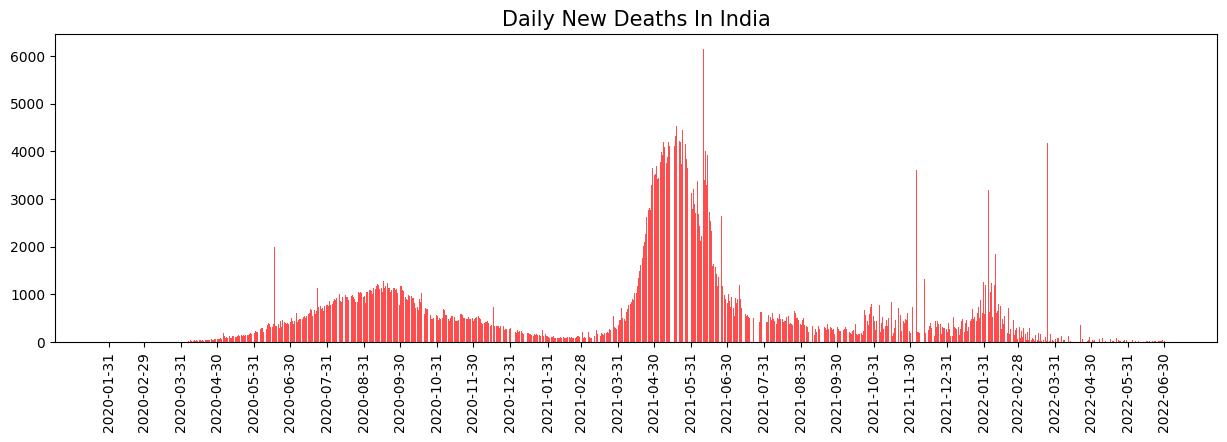

In [46]:
plt.figure(figsize = (15,4))
plt.bar(india_df['Date'], india_df['Daily New Deaths'], color = 'r', alpha = 0.7)
plt.title('Daily New Deaths In India', fontsize = 15)
plt.xticks(pd.date_range(start = '2020-01-01', end = '2022-07-01', freq = 'm' ), rotation = 90)
plt.show();

In [47]:
india_df.drop(first_wave[first_wave['Daily New Deaths'] > 2000].index, inplace = True)
first_wave.drop(first_wave[first_wave['Daily New Deaths'] > 2000].index, inplace = True)
india_df.drop(second_wave[second_wave['Daily New Deaths'] > 4500].index, inplace = True)
second_wave.drop(first_wave[first_wave['Daily New Deaths'] > 2000].index, inplace = True)
india_df.drop(india_df[(india_df['Date'] > '2021-07-31') & (india_df['Daily New Deaths'] > 1000)].index, inplace = True)

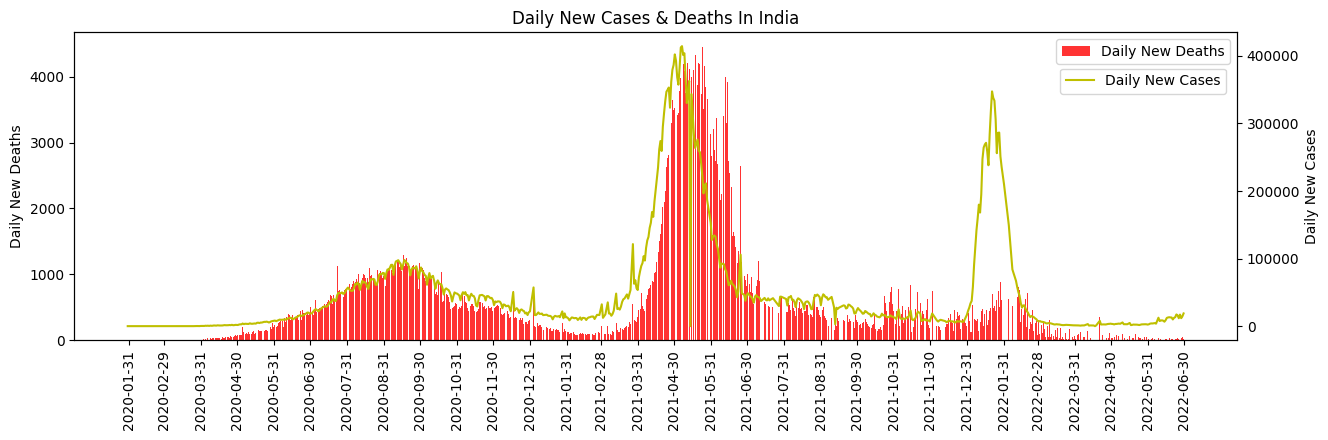

In [48]:
fig,ax = plt.subplots(figsize = (15,4))
ax.bar(india_df['Date'], india_df['Daily New Deaths'], color = 'r', alpha = 0.8, label = "Daily New Deaths")

ax2 = ax.twinx()
ax2.plot(india_df['Date'], india_df['Daily New Cases'], color = 'y', label = "Daily New Cases")

ax.set_xticks(pd.date_range(start = '2020-01-01', end = '2022-07-01', freq = 'm' ))
ax.set_ylabel("Daily New Deaths")
ax.tick_params(axis = 'x', rotation = 90)
ax.legend()

ax2.legend(loc = (0.848,0.8))
ax2.set_ylabel("Daily New Cases")

plt.title("Daily New Cases & Deaths In India")
plt.show();

- We can observe that during the first and second waves, daily new deaths increase with the rise in daily new cases.
- However, during the third wave, deaths do not increase significantly in proportion to the daily increase in confirmed cases.
- This could be attributed to vaccination efforts, as individuals may have developed immunity against the disease, or it could be due to a less virulent strain of the virus causing the wave.

Now let's analyze each wave one by one 

#### The First Wave

In [49]:
Total_Confirmed_Cases = first_wave["Confirmed"].iloc[-1] - first_wave["Confirmed"].iloc[1]
Total_Deaths = first_wave["Deaths"].iloc[-1] - first_wave["Deaths"].iloc[1]
Total_Recoveries = first_wave["Cured"].iloc[-1] - first_wave["Cured"].iloc[1]

first_wave_summary = \
pd.DataFrame(
             { "Total Confirmed Cases" : Total_Confirmed_Cases ,
               "Total Deaths" : Total_Deaths ,
               "Total Recoveries" : Total_Recoveries ,
               "Mortality Rate (%)" : Total_Deaths* 100 / Total_Confirmed_Cases, 
               "Recovery Rate (%)" : Total_Recoveries* 100 / Total_Confirmed_Cases,
               "Avg Daily Cases" : first_wave["Daily New Cases"].sum() / len(second_wave["Date"]),
               "Avg Daily Deaths" : first_wave["Daily New Deaths"].sum() / len(second_wave["Date"]),
               "Duration Of The Wave (Days)" : len(first_wave["Date"])
             }, index = ["Values"]
             )

format_dict = {col1 : '{:,.0f}' for col1 in first_wave_summary.columns if col1 not in ["Mortality Rate (%)", "Recovery Rate (%)"] }
format_dict.update({col2 : '{:,.2f}' for col2 in ["Mortality Rate (%)", "Recovery Rate (%)"]})
bold("#### Summary Of The First Wave")
first_wave_summary.style.format(format_dict)

#### Summary Of The First Wave

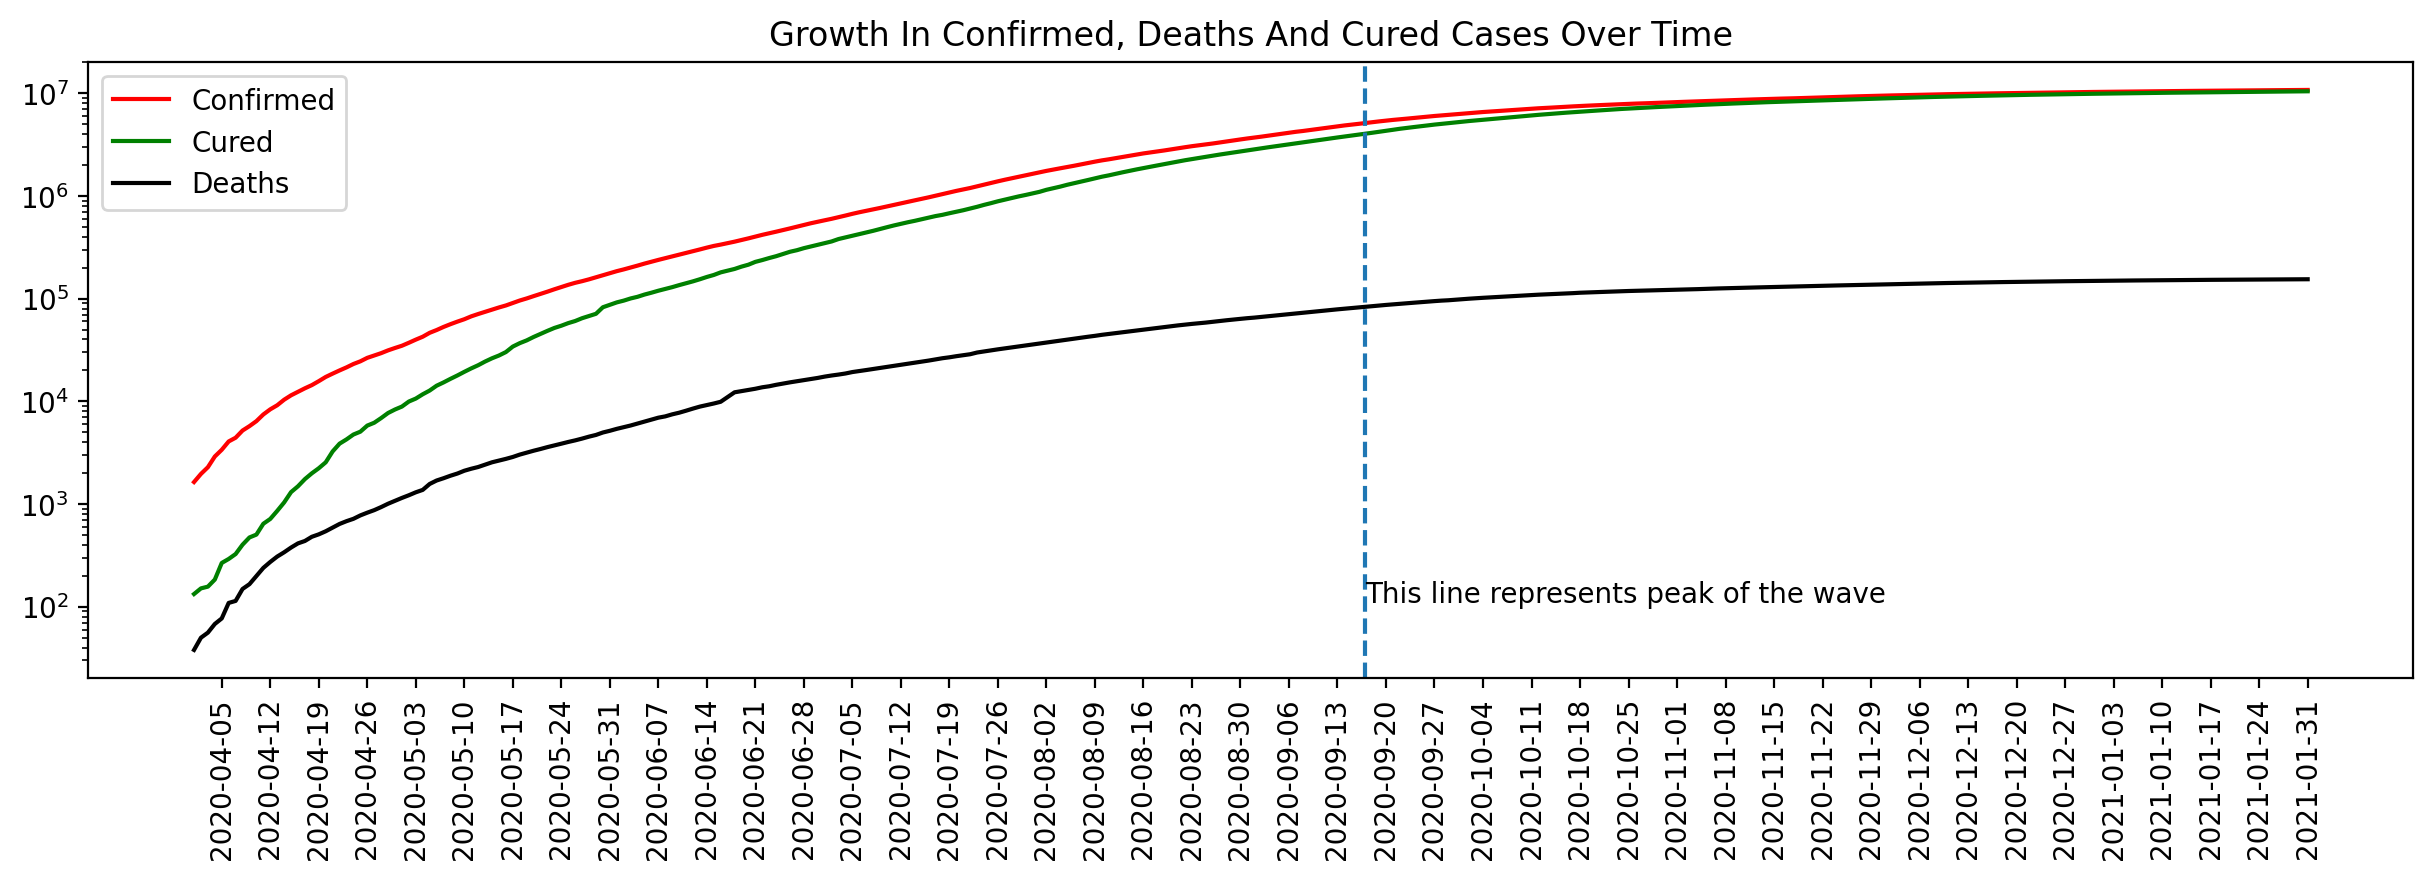

In [50]:
fig, ax = plt.subplots(figsize = (15,4), dpi = 200)

ax.plot(first_wave['Date'], first_wave['Confirmed'], color = 'r', label = "Confirmed")
ax.plot(first_wave['Date'], first_wave['Cured'], color = 'g', label = "Cured")
ax.plot(first_wave['Date'], first_wave['Deaths'], color = 'k', label = 'Deaths')

ax.axvline(first_wave[first_wave['Daily New Cases'] == first_wave['Daily New Cases'].max()]['Date'].iloc[0], ls = '--')
ax.text(first_wave[first_wave['Daily New Cases'] == first_wave['Daily New Cases'].max()]['Date'].iloc[0], 10^100, 
        "This line represents peak of the wave")
plt.xticks(pd.date_range(start = '2020-04-01', end = '2021-01-31', freq = 'w' ), rotation = 90)
ax.set_yscale('log')
ax.legend()
ax.set_title("Growth In Confirmed, Deaths And Cured Cases Over Time")

plt.show();

- We can clearly observe that before the peak of the wave hits, recoveries do not increase as rapidly as confirmed cases.
- However, after the peak of the wave, the recovery line nearly overlaps with that of the confirmed line.
- Additionally, as recoveries continue to rise, the gap between the deaths line and the confirmed line also increases, indicating a decrease in mortality over time.

Intensity of Wave In Growth Phase (Slope): 0.032059558734386186
Intensity of Wave In Decline Phase (Slope): -0.014697572678758108


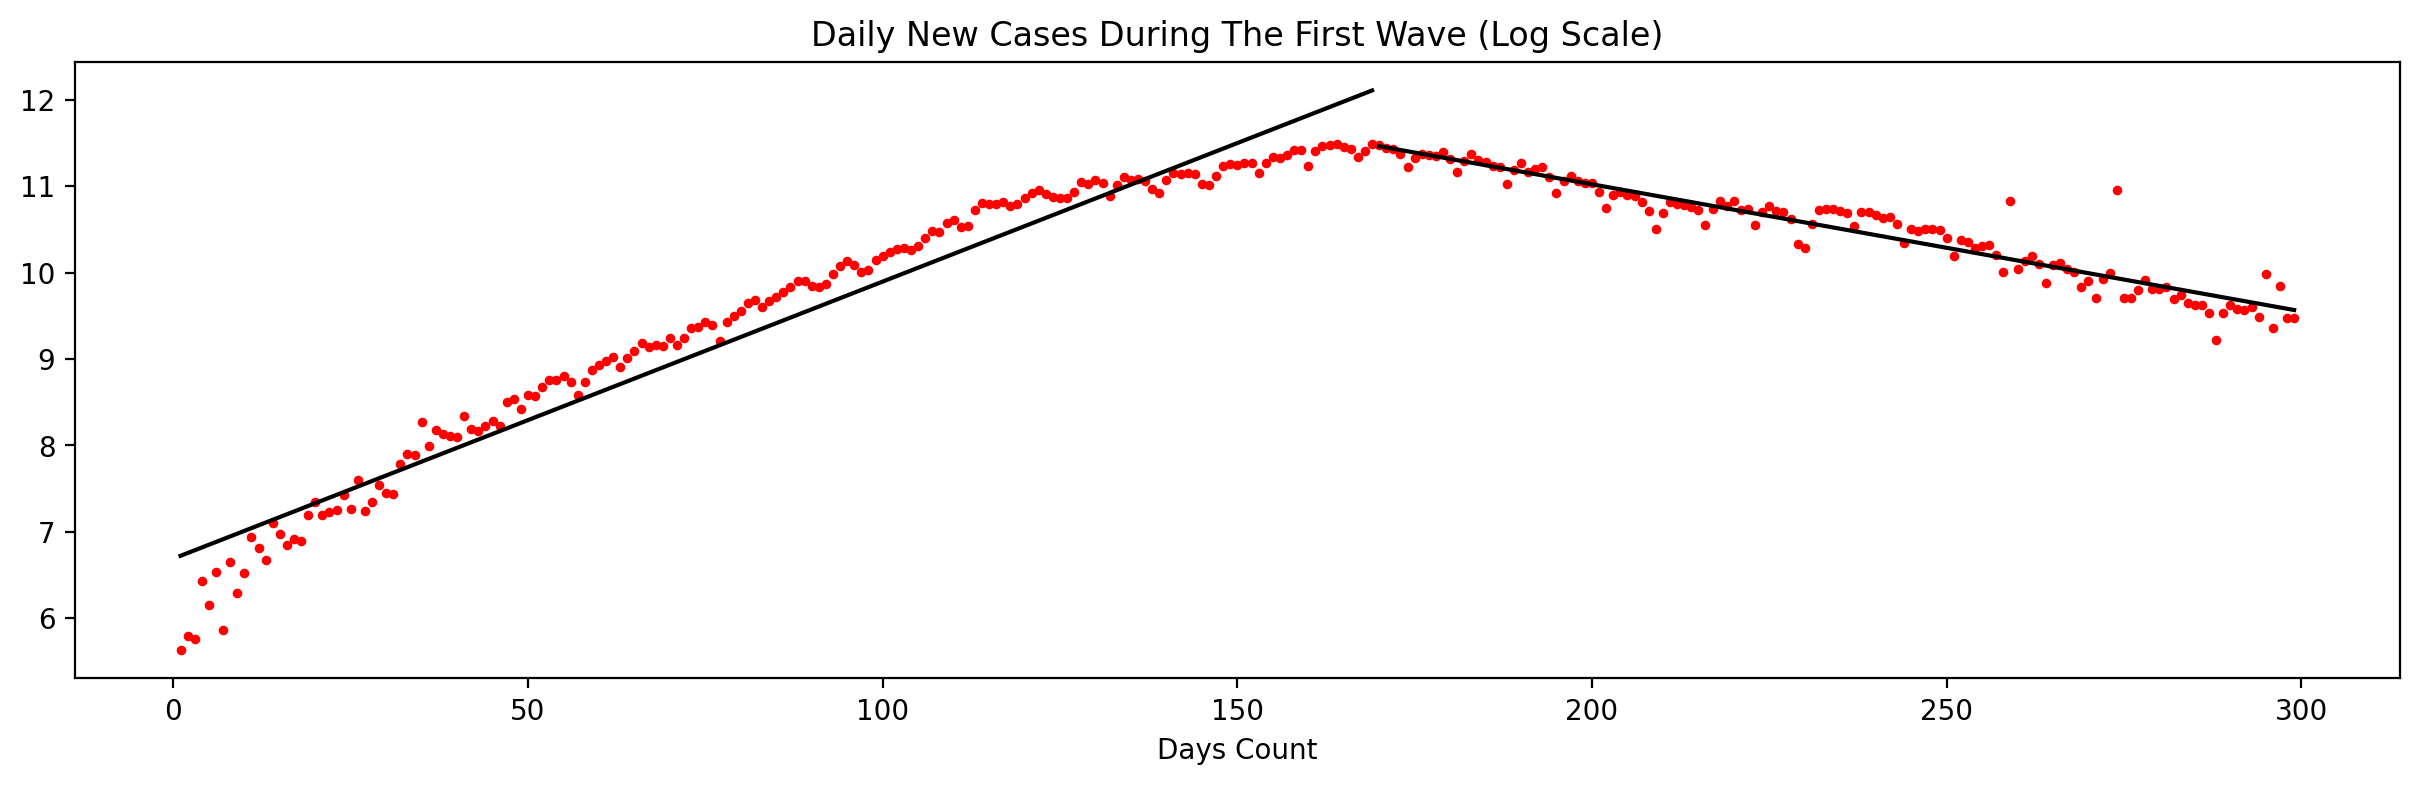

In [51]:
fig, ax = plt.subplots(figsize = (15,4), dpi = 200)

days_count_fw = np.arange(len(first_wave['Date'])) + 1 # fw means First Wave
days_count_fw_gp = np.arange(len(first_wave.query('Date <= "2020-09-17"'))) + 1  # fw_gp means First Wave growth phase
days_count_fw_dp = np.arange(len(first_wave.query('Date > "2020-09-17"'))) + 1 + 169  # fw_dp means First Wave decline phase

ax.scatter(days_count_fw, np.log(first_wave['Daily New Cases']), color = 'r', s = 6)

slope_gp, intercept_gp = np.polyfit(days_count_fw_gp, np.log(first_wave.query('Date <= "2020-09-17"')['Daily New Cases']), 1)
plt.plot(days_count_fw_gp, slope_gp* np.arange(len(first_wave.query('Date <= "2020-09-17"')['Date'])) + intercept_gp, color = 'k')

slope_dp, intercept_dp = np.polyfit(days_count_fw_dp, np.log(first_wave.query('Date > "2020-09-17" & Date <= "2021-01-31"')['Daily New Cases']), 1)
plt.plot(days_count_fw_dp, slope_dp* days_count_fw_dp + intercept_dp, color = 'k')

plt.title("Daily New Cases During The First Wave (Log Scale)")
plt.xlabel("Days Count")
print('Intensity of Wave In Growth Phase (Slope):', slope_gp)
print('Intensity of Wave In Decline Phase (Slope):', slope_dp)
plt.show();

- I have fitted a trend line of degree 1 (a straight line) to assess the extent of exponential growth and decline during the waves of the disease.
- It's evident that points during the decline phase of the wave nearly overlap with the trend line, indicating exponential decrement in the number of cases once the peak of the wave hits.
- During the growth phase, points do not completely overlap with the trend line, but still provide a sense of the exponential rise in cases during this phase.
- Notably, the slopes of the trend lines indicate that the growth phase trend line is steeper than its counterpart, suggesting that the rise in cases is more intensive than the decline

#### Analysis Of States During The First Wave

In [52]:
# grpd_covid_df means "Grouped Covid Dataframe"

grpd_covid_df = covid_df.groupby(['State_UT','Date']).agg({'Confirmed':'sum', 'Active':'sum',
                                                      'Cured':'sum','Deaths':'sum'})
grpd_covid_df['Daily New Cases'] = grpd_covid_df.groupby('State_UT')['Confirmed'].diff()
grpd_covid_df['Daily New Cases'].fillna(grpd_covid_df['Confirmed'], inplace = True)
grpd_covid_df['Daily New Deaths'] = grpd_covid_df.groupby('State_UT')['Deaths'].diff()
grpd_covid_df['Daily New Deaths'].fillna(grpd_covid_df['Deaths'], inplace = True)
grpd_covid_df['Daily New Recoveries'] = grpd_covid_df.groupby('State_UT')['Cured'].diff()
grpd_covid_df['Daily New Recoveries'].fillna(grpd_covid_df['Cured'], inplace = True)

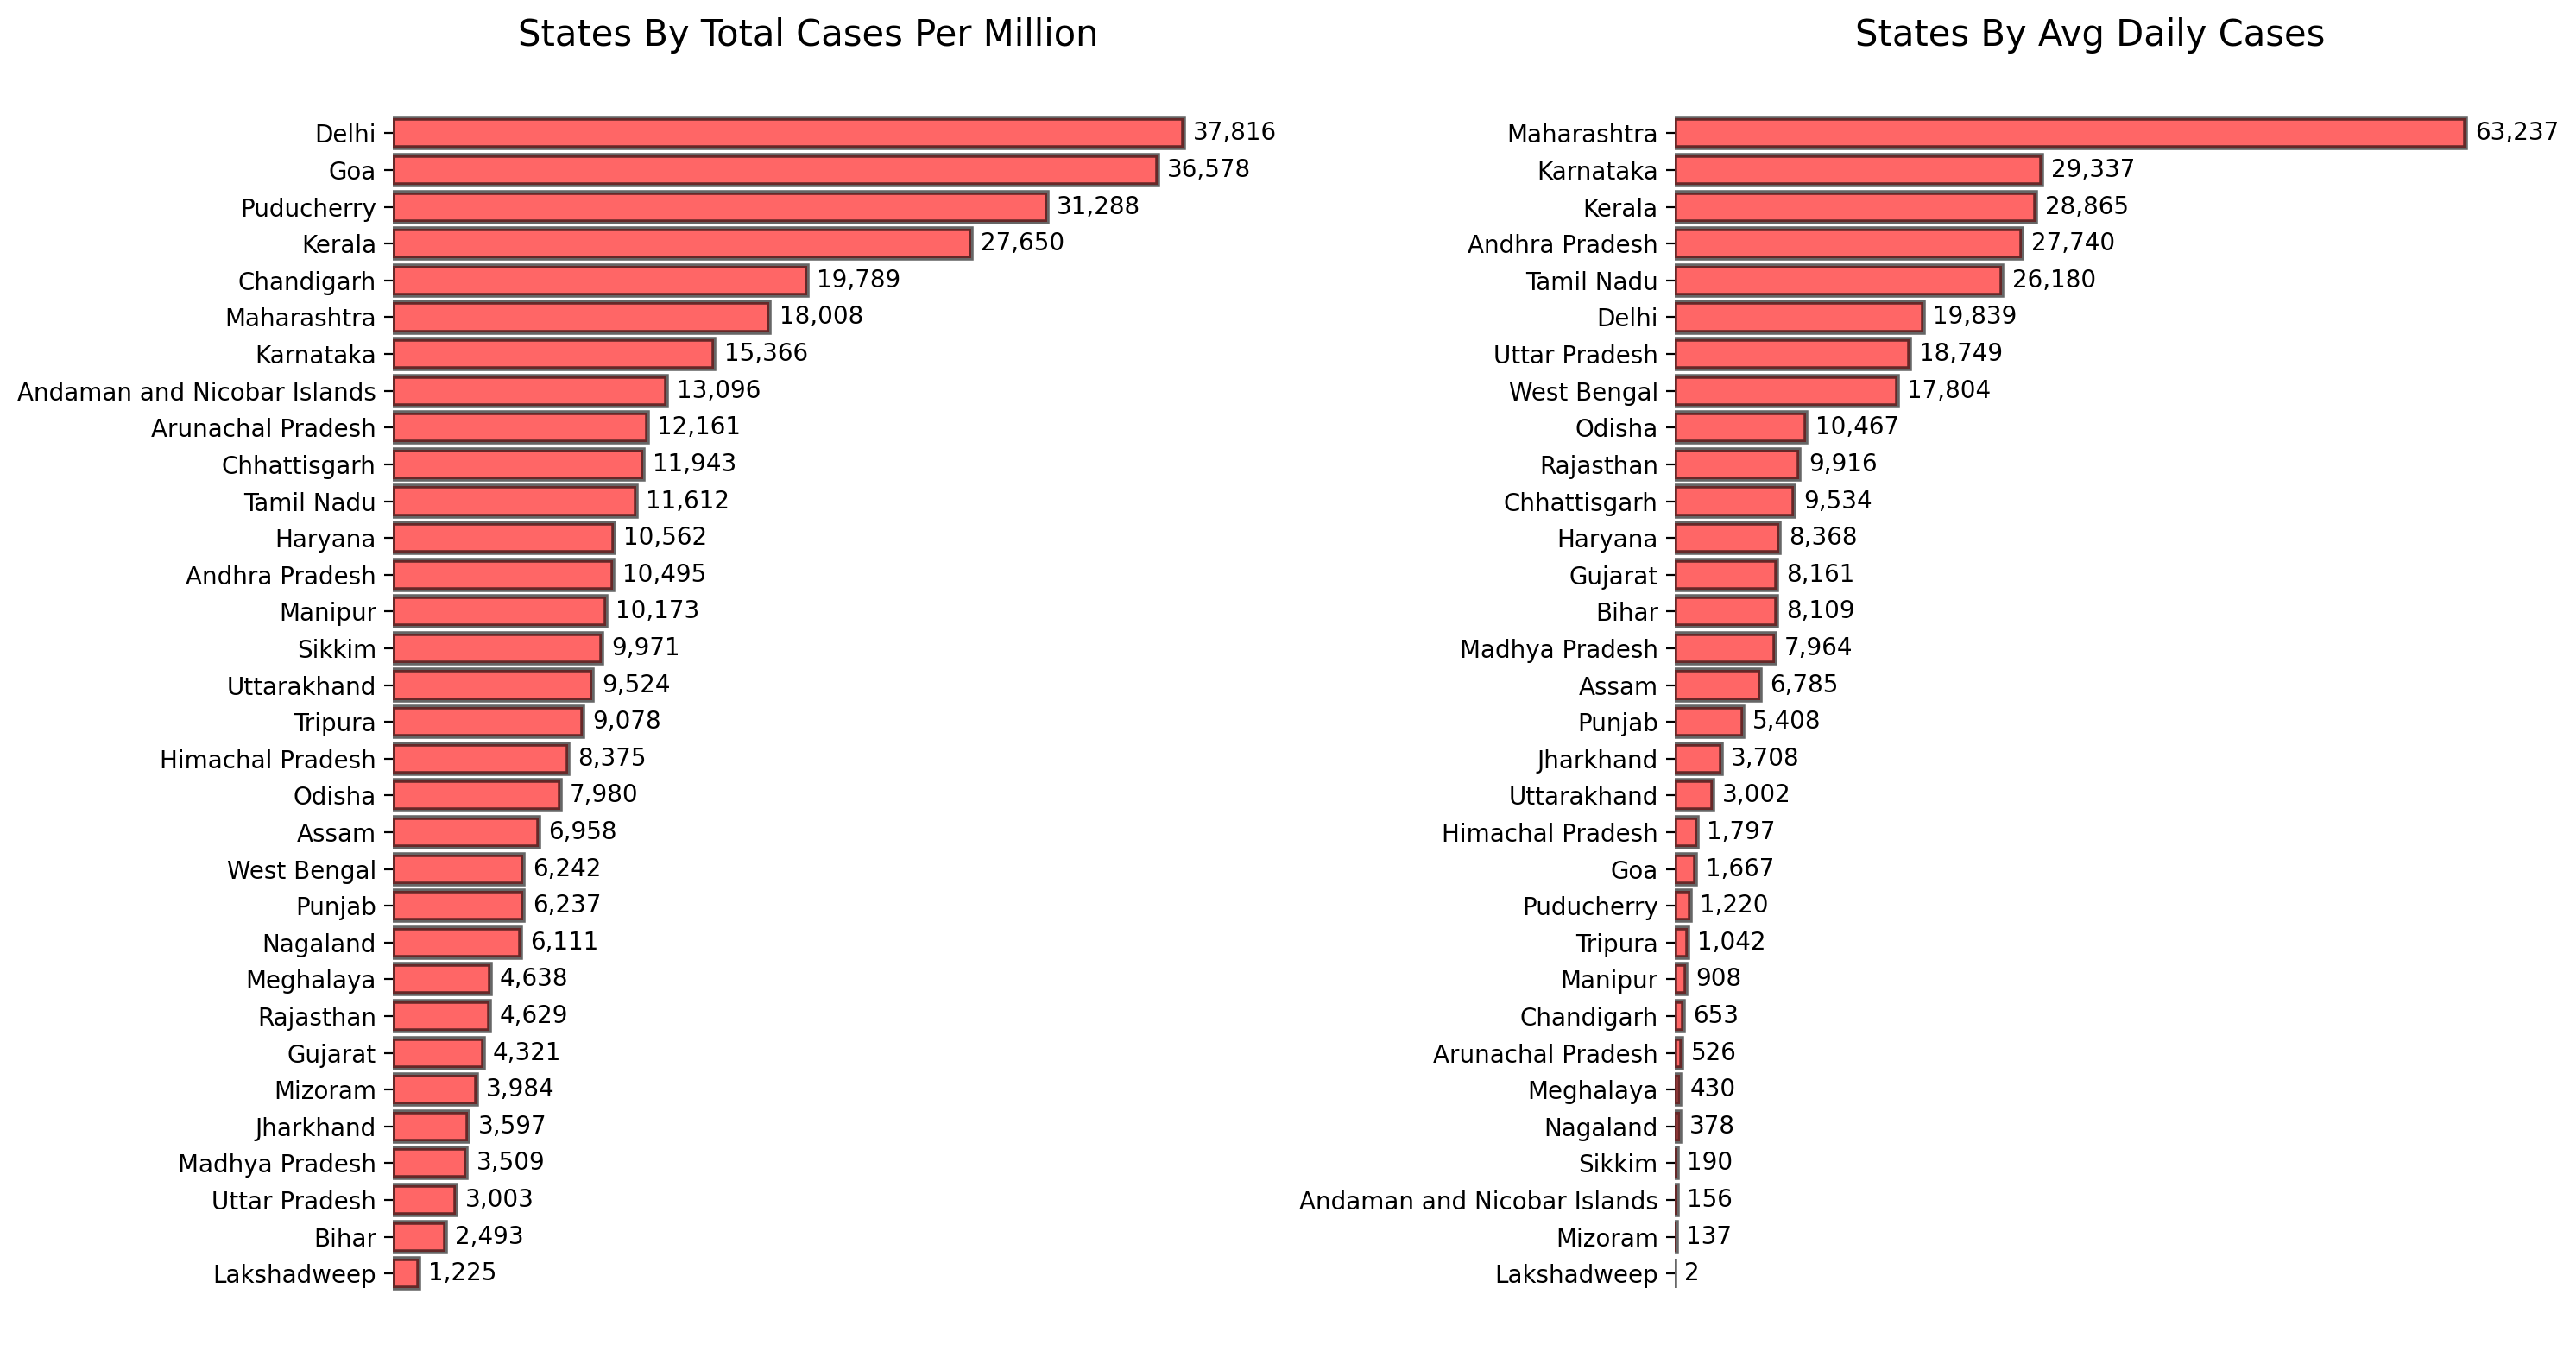

In [53]:
statewise_first_wave = grpd_covid_df.query(' Date >= "2020-04-01" & Date <= "2021-01-31" ').pivot_table(index = 'State_UT', values = ['Daily New Cases', 'Daily New Deaths', 'Daily New Recoveries'], 
                                              aggfunc = 'sum').reset_index()
statewise_first_wave.columns = ['State_UT', 'Confirmed', 'Deaths', 'Cured']

statewise_first_wave['Recovery Rate'] = (statewise_first_wave['Cured']/statewise_first_wave['Confirmed'])*100
statewise_first_wave['Mortality Rate'] = (statewise_first_wave['Deaths']/statewise_first_wave['Confirmed'])*100

statewise_first_wave = pd.merge(statewise_first_wave, census_df, on = 'State_UT')
statewise_first_wave['Cases Per M']= statewise_first_wave['Confirmed']*1000000 / statewise_first_wave['Population']
statewise_first_wave['Avg Daily Cases']= statewise_first_wave['Confirmed'] / len(statewise_first_wave['Confirmed'])


fig,ax = plt.subplots(1, 2, figsize = (15,8), dpi = 200)
cases_PerM_bars = ax[0].barh(statewise_first_wave.sort_values('Cases Per M', ascending = True)['State_UT'], 
                           statewise_first_wave.sort_values('Cases Per M', ascending = True)['Cases Per M'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[0].bar_label(cases_PerM_bars, fmt = '{:,.0f}', padding = 4)
ax[0].set_title("States By Total Cases Per Million", fontsize = 15)
ax[0].set_xticks(ticks = [])

for spine in ax[0].spines.values():
    spine.set_visible(False)
    

avg_daily_cases_bars = ax[1].barh(statewise_first_wave.sort_values('Avg Daily Cases', ascending = True)['State_UT'], 
                           statewise_first_wave.sort_values('Avg Daily Cases', ascending = True)['Avg Daily Cases'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[1].bar_label(avg_daily_cases_bars, fmt = '{:,.0f}', padding = 4)
ax[1].set_title("States By Avg Daily Cases", fontsize = 15)
ax[1].set_xticks(ticks = [])

for spine in ax[1].spines.values():
    spine.set_visible(False)
    
plt.tight_layout()
plt.show();


- "States by Average Daily Cases" helps us identify each state's contribution to the national average daily cases, while "States by Total Cases per Million" helps us assess the states most and least affected by the virus during this phase.
- We can conclude that Maharashtra, Karnataka, Kerala, Andhra Pradesh, Tamil Nadu, and Delhi are among the major contributors to the national average daily cases. Conversely, northeastern states and Union Territories are among the least contributors.
- Regarding total cases per million people, Delhi emerges as the most affected state during the first phase, followed by Goa, Puducherry, and Kerala.

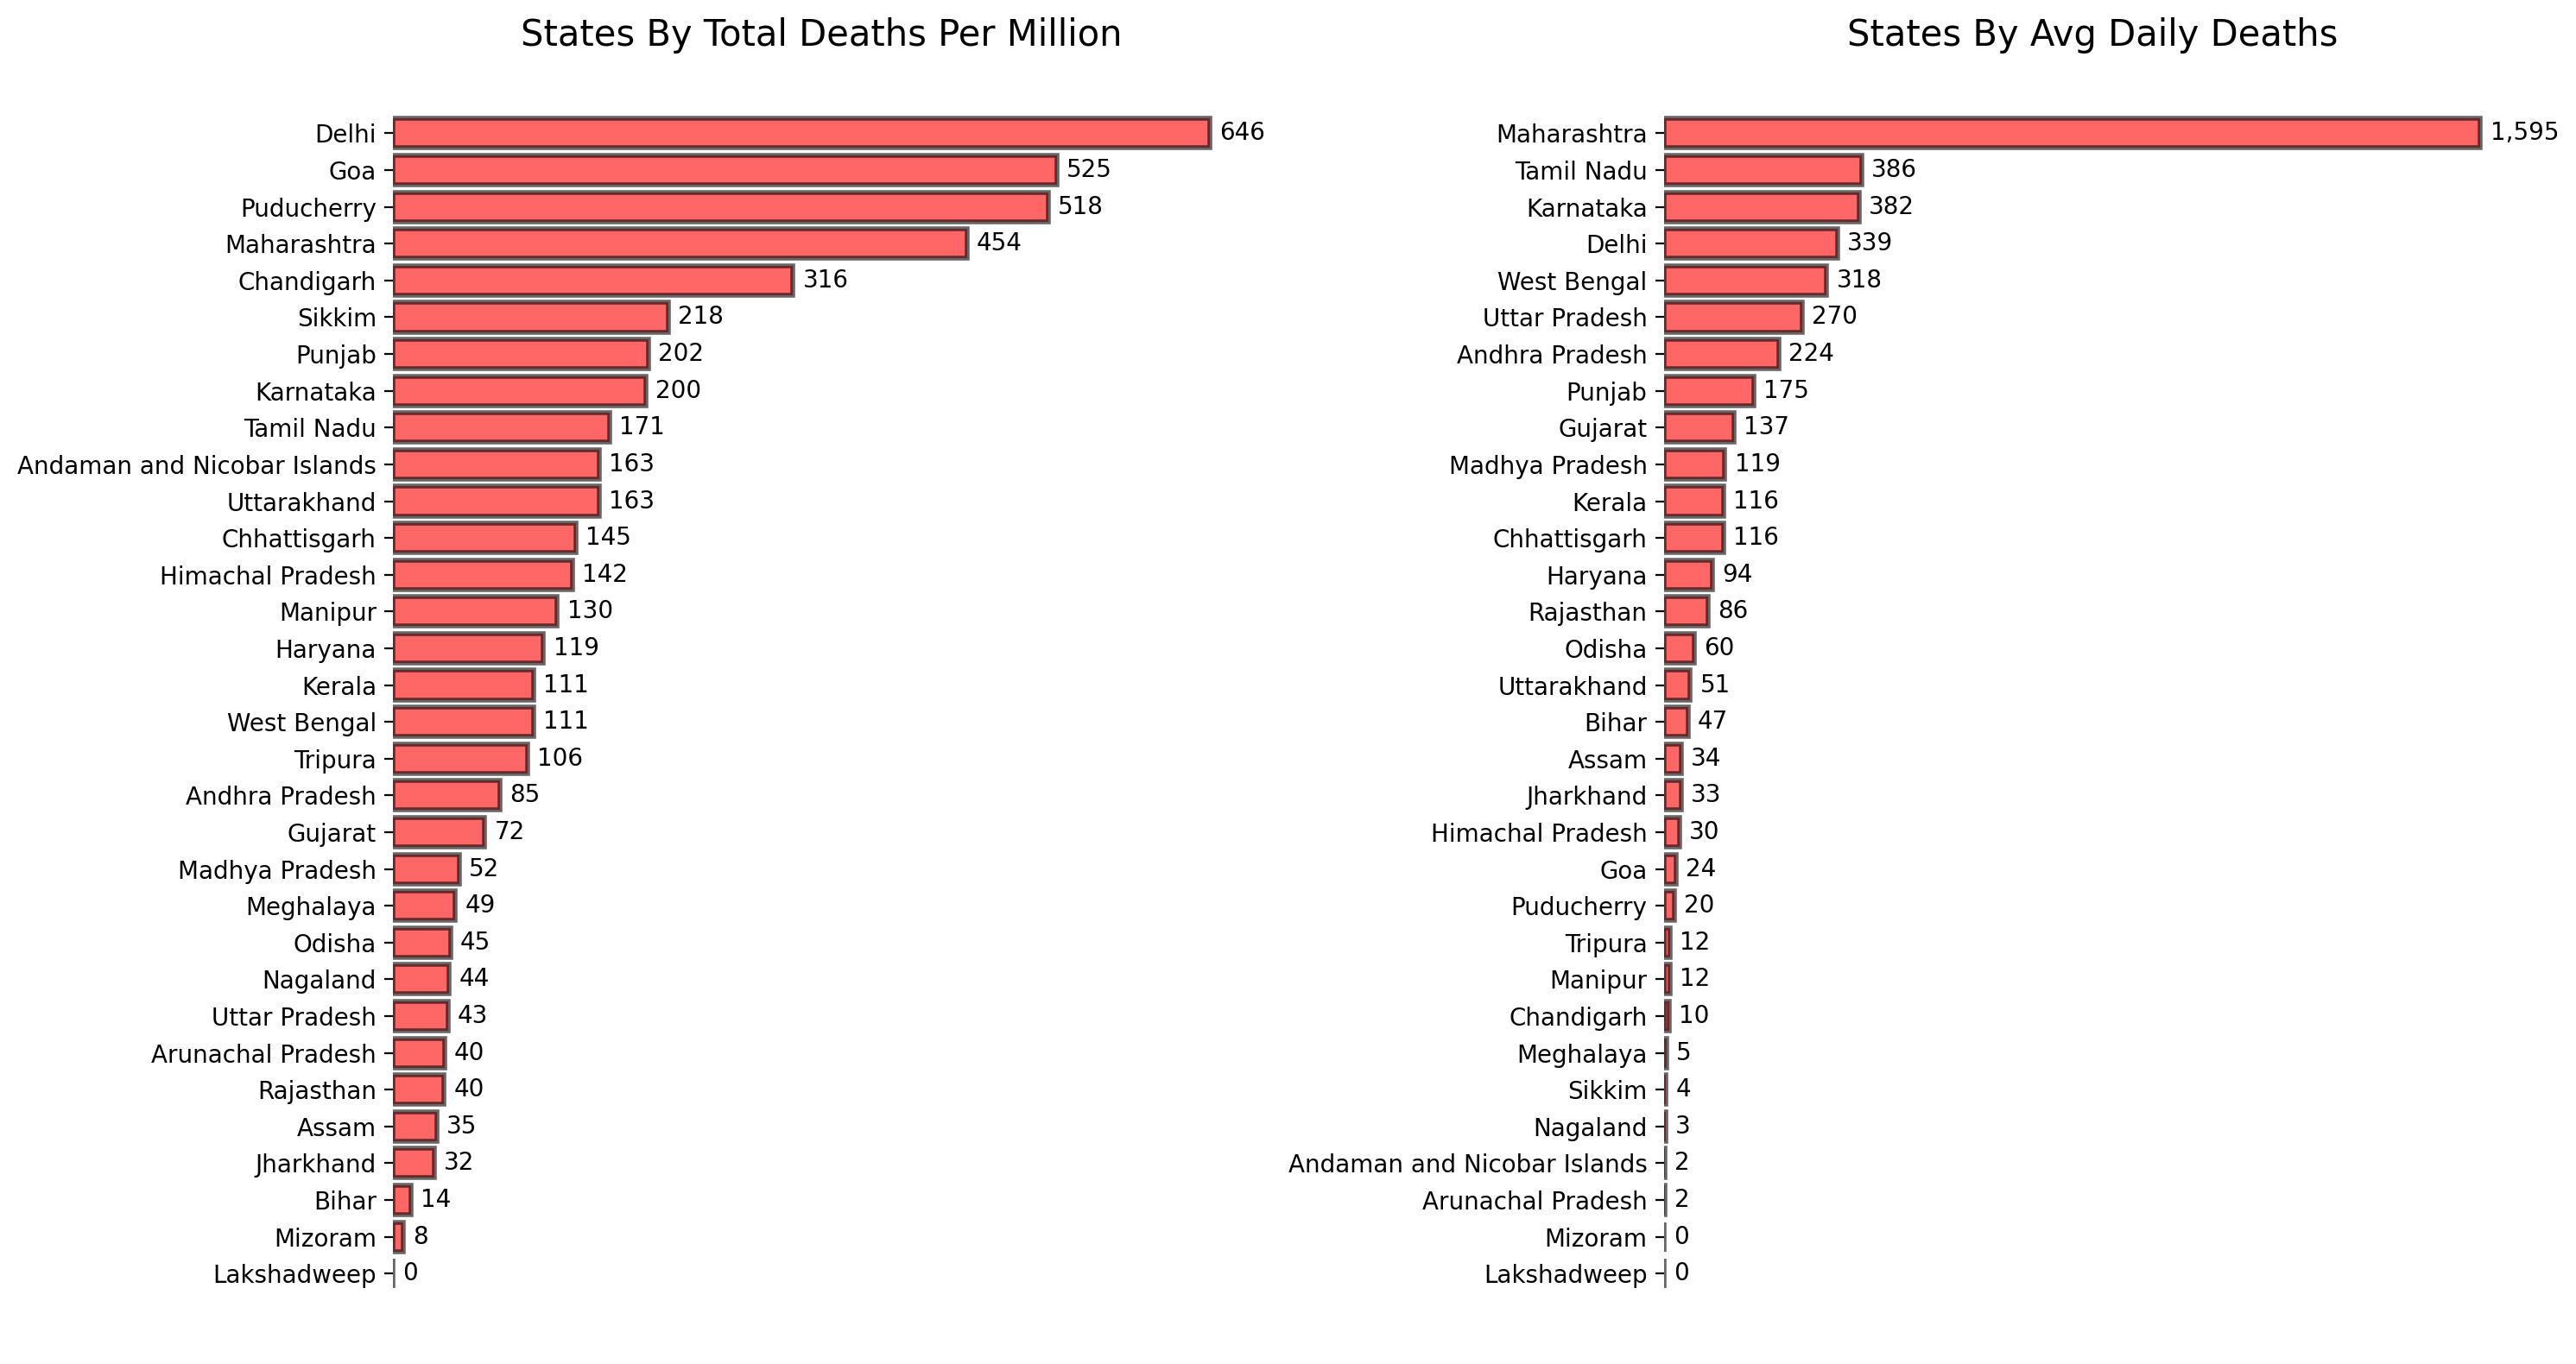

In [54]:
statewise_first_wave['Deaths Per M']= statewise_first_wave['Deaths']*1000000 / statewise_first_wave['Population']
statewise_first_wave['Avg Daily Deaths']= statewise_first_wave['Deaths'] / len(statewise_first_wave['Deaths'])


fig,ax = plt.subplots(1, 2, figsize = (15,8), dpi = 200)
cases_PerM_bars = ax[0].barh(statewise_first_wave.sort_values('Deaths Per M', ascending = True)['State_UT'], 
                           statewise_first_wave.sort_values('Deaths Per M', ascending = True)['Deaths Per M'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[0].bar_label(cases_PerM_bars, fmt = '{:,.0f}', padding = 4)
ax[0].set_title("States By Total Deaths Per Million", fontsize = 15)
ax[0].set_xticks(ticks = [])

for spine in ax[0].spines.values():
    spine.set_visible(False)
    

avg_daily_cases_bars = ax[1].barh(statewise_first_wave.sort_values('Avg Daily Deaths', ascending = True)['State_UT'], 
                           statewise_first_wave.sort_values('Avg Daily Deaths', ascending = True)['Avg Daily Deaths'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[1].bar_label(avg_daily_cases_bars, fmt = '{:,.0f}', padding = 4)
ax[1].set_title("States By Avg Daily Deaths", fontsize = 15)
ax[1].set_xticks(ticks = [])

for spine in ax[1].spines.values():
    spine.set_visible(False)
    
plt.tight_layout()
plt.show();


- Delhi stands out as the most affected state in terms of deaths per million people as well
- Maharashtra emerges as a major contributor towards avg daily deaths during this phase.

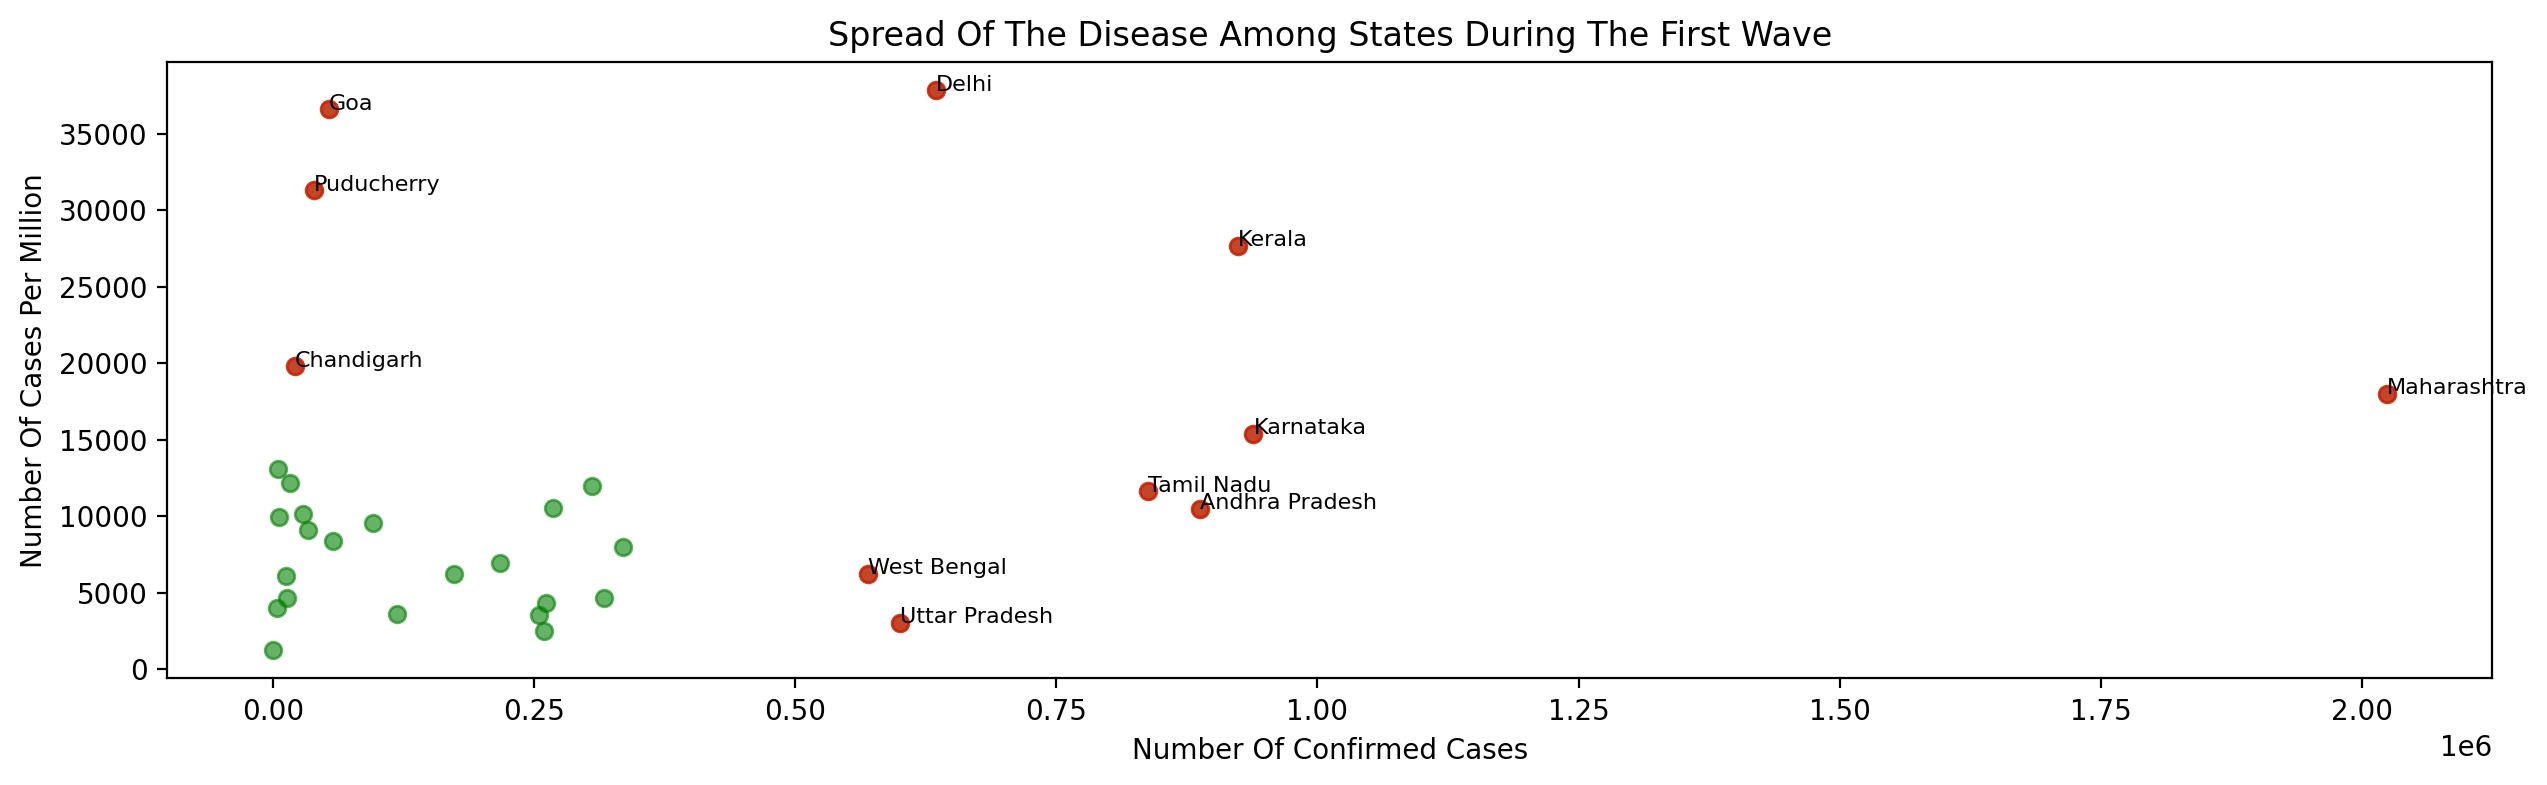

In [55]:
filtered_statewise_first_wave = statewise_first_wave[(statewise_first_wave['Confirmed'] >= 500000) | (statewise_first_wave['Cases Per M'] >= 15000)].reset_index()

plt.figure(figsize = (15,4), dpi = 200)
plt.scatter(statewise_first_wave['Confirmed'], statewise_first_wave['Cases Per M'], alpha = 0.6, color = 'g')
plt.scatter(filtered_statewise_first_wave['Confirmed'], filtered_statewise_first_wave['Cases Per M'], alpha = 0.6, color = 'r')

for i in filtered_statewise_first_wave.index:
    plt.annotate(filtered_statewise_first_wave['State_UT'].iloc[i], xy = (filtered_statewise_first_wave['Confirmed'].iloc[i], 
                 filtered_statewise_first_wave['Cases Per M'].iloc[i]), 
                 size = 8)

plt.xlabel("Number Of Confirmed Cases")
plt.ylabel("Number Of Cases Per Million")
plt.title('Spread Of The Disease Among States During The First Wave')
    
plt.show();

- Green dots represent states that neither lead in the number of confirmed cases nor in cases per million and can be considered resistant to the disease.
- Conversely, red dots represent states that lead in either of these parameters.
- In this context, "Kerala" and "Delhi" can be considered the most infected states as they appear to lead in both parameters.

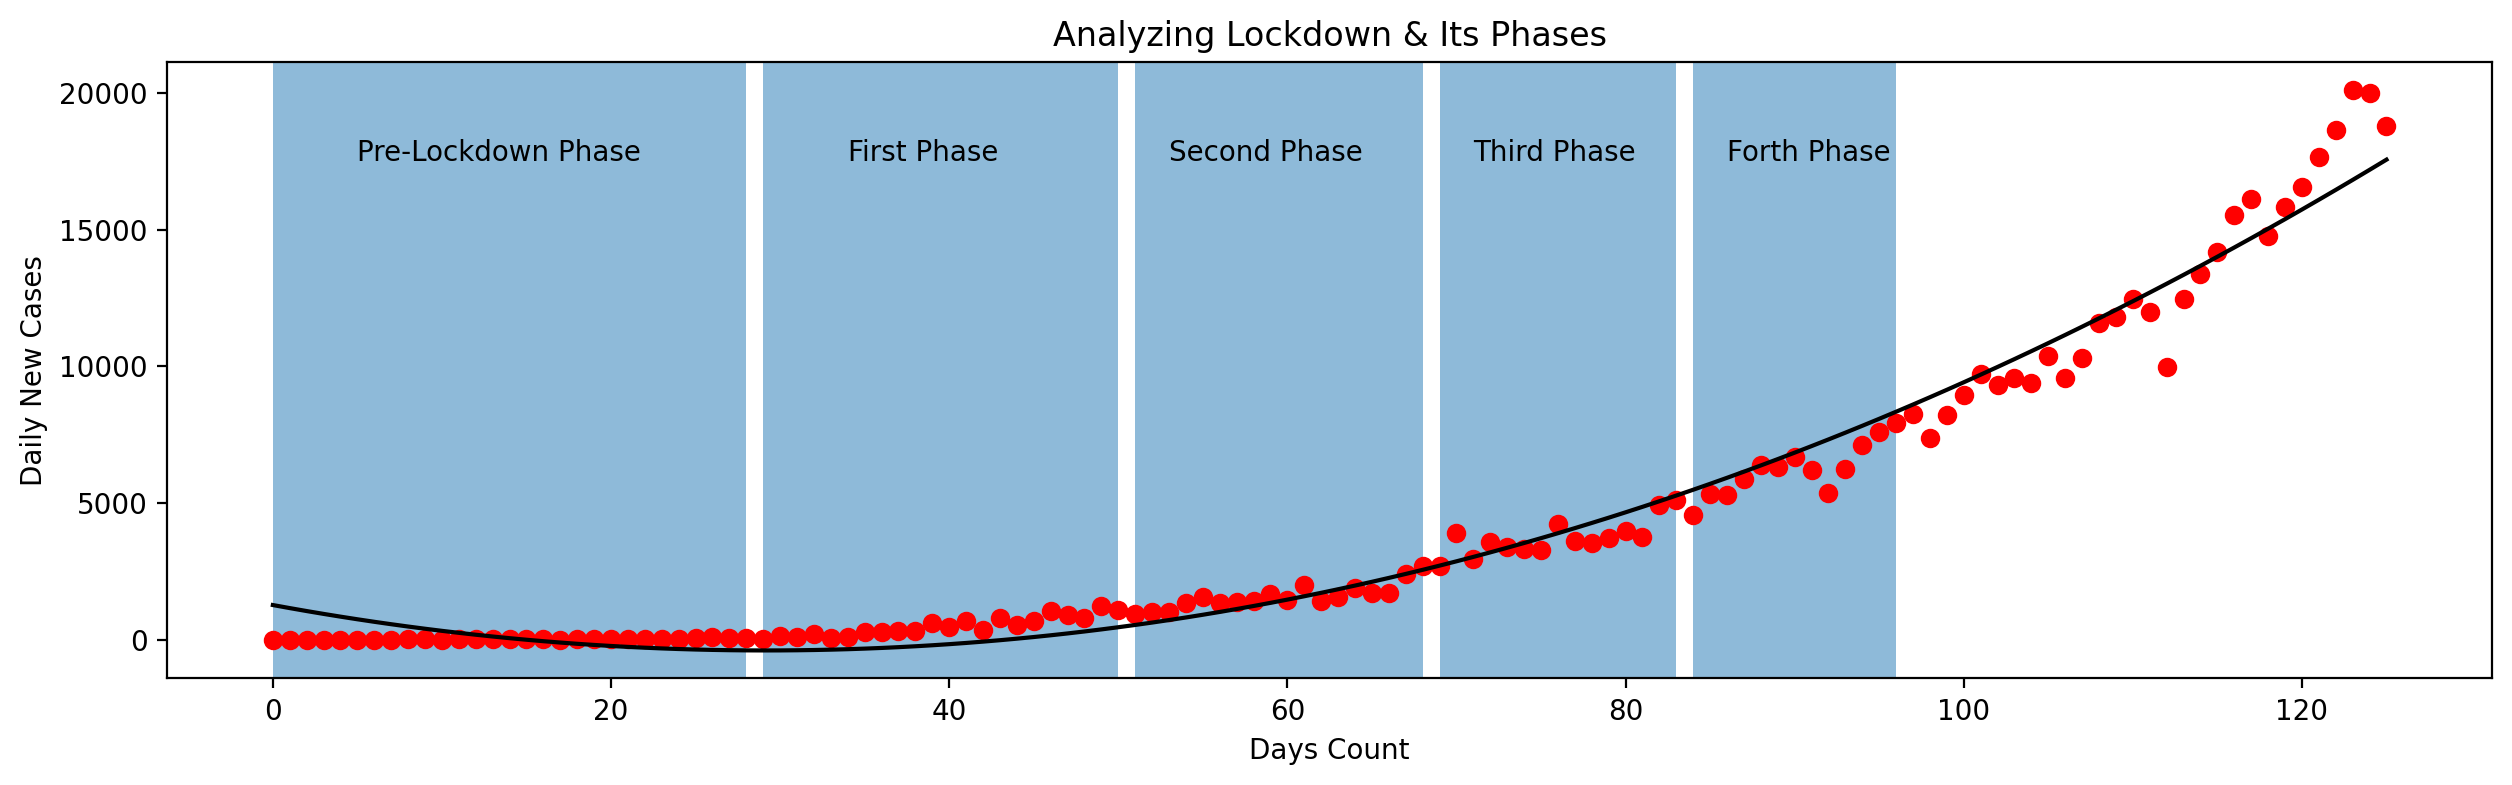

In [56]:
lockdown_phases = india_df.query(' Date >= "2020-02-25" & Date <= "2020-06-30" ').reset_index()
pre_lockdown = lockdown_phases.query(' Date >= "2020-02-25" & Date <= "2020-03-24" ')
first_phase = lockdown_phases.query(' Date >= "2020-03-25" & Date <= "2020-04-15" ')
second_phase = lockdown_phases.query(' Date >= "2020-04-16" & Date <= "2020-05-03" ')
third_phase = lockdown_phases.query(' Date >= "2020-05-04" & Date <= "2020-05-18" ')
forth_phase = lockdown_phases.query(' Date >= "2020-05-19" & Date <= "2020-05-31" ')
unlock1 = lockdown_phases.query(' Date >= "2020-06-01" & Date <= "2020-06-30" ')

days_count = np.arange(len(lockdown_phases['Date']))

plt.figure(figsize = (15,4), dpi = 200)

plt.axvspan(pre_lockdown.index[0], pre_lockdown.index[-1], alpha = 0.5)
plt.axvspan(first_phase.index[0], first_phase.index[-1], alpha = 0.5)
plt.axvspan(second_phase.index[0], second_phase.index[-1], alpha = 0.5)
plt.axvspan(third_phase.index[0], third_phase.index[-1], alpha = 0.5)
plt.axvspan(forth_phase.index[0], forth_phase.index[-1], alpha = 0.5)

coefficients = np.polyfit(days_count, lockdown_phases['Daily New Cases'], 2)
trend_line = np.polyval(coefficients, lockdown_phases.index)
plt.scatter(days_count, lockdown_phases['Daily New Cases'], color = 'r')
plt.plot(days_count, trend_line, color = 'k')

plt.annotate("Pre-Lockdown Phase", (pre_lockdown.index[0] + 5 ,17500))
plt.annotate("First Phase", (first_phase.index[0] + 5 ,17500))
plt.annotate("Second Phase", (second_phase.index[0] + 2 ,17500))
plt.annotate("Third Phase", (third_phase.index[0] + 2 ,17500))
plt.annotate("Forth Phase", (forth_phase.index[0] + 2 ,17500))

plt.xlabel('Days Count')
plt.ylabel('Daily New Cases')
plt.title('Analyzing Lockdown & Its Phases')
plt.show();

- Here, we attempted to fit a trend line to analyze the growth pattern of cases during the lockdown phases.
- The trend line with degree 2 almost accommodates all the data points, indicating a parabolic growth of cases during this time.

Let's now analysize these phases by comparing the covid-19 figures during each phase.

In [57]:
plc = pre_lockdown['Confirmed'].iloc[-1] - pre_lockdown['Confirmed'].iloc[0]    # plc -- Pre-Lockdown Confirmed Cases
pld = pre_lockdown['Deaths'].iloc[-1] - pre_lockdown['Deaths'].iloc[0]          # pld -- Pre-Lockdown Deaths
plr = pre_lockdown['Cured'].iloc[-1] - pre_lockdown['Cured'].iloc[0]            # plr -- Pre-Lockdown Recoveries
plac = plc / len(pre_lockdown)
plad = pld / len(pre_lockdown)
plar = plr / len(pre_lockdown)

fpc = first_phase['Confirmed'].iloc[-1] - first_phase['Confirmed'].iloc[0]    # fpc -- First Phase Confirmed Cases
fpd = first_phase['Deaths'].iloc[-1] - first_phase['Deaths'].iloc[0]          # fpd -- First Phase Deaths
fpr = first_phase['Cured'].iloc[-1] - first_phase['Cured'].iloc[0]            # fpr -- First Phase Recoveries
fpac = fpc / len(first_phase)
fpad = fpd / len(first_phase)
fpar = fpr / len(first_phase)

spc = second_phase['Confirmed'].iloc[-1] - second_phase['Confirmed'].iloc[0]
spd = second_phase['Deaths'].iloc[-1] - second_phase['Deaths'].iloc[0]
spr = second_phase['Cured'].iloc[-1] - second_phase['Cured'].iloc[0]
spac = spc / len(second_phase)
spad = spd / len(second_phase)
spar = spr / len(second_phase)

tpc = third_phase['Confirmed'].iloc[-1] - third_phase['Confirmed'].iloc[0]
tpd = third_phase['Deaths'].iloc[-1] - third_phase['Deaths'].iloc[0]
tpr = third_phase['Cured'].iloc[-1] - third_phase['Cured'].iloc[0]
tpac = tpc / len(third_phase)
tpad = tpd / len(third_phase)
tpar = tpr / len(third_phase)

fopc = forth_phase['Confirmed'].iloc[-1] - forth_phase['Confirmed'].iloc[0]  # fopc -- Forth Phase Confirmed Cases
fopd = forth_phase['Deaths'].iloc[-1] - forth_phase['Deaths'].iloc[0]        # fopd -- Forth Phase Deaths
fopr = forth_phase['Cured'].iloc[-1] - forth_phase['Cured'].iloc[0]          # fopr -- Forth Phase Recoveries
foac = fopc / len(forth_phase)
foad = fopd / len(forth_phase)
foar = fopr / len(forth_phase)

u1c = unlock1['Confirmed'].iloc[-1] - unlock1['Confirmed'].iloc[0]      # u1c -- Unlock1 Cases and so on..
u1d = unlock1['Deaths'].iloc[-1] - unlock1['Deaths'].iloc[0]
u1r = unlock1['Cured'].iloc[-1] - unlock1['Cured'].iloc[0]
u1ac = u1c / len(unlock1)
u1ad = u1d / len(unlock1)
u1ar = u1r / len(unlock1)

lockdown_stats = \
pd.DataFrame(
             { "Pre-Lockdown Phase" : [plc , pld  , len(pre_lockdown), plac , plad, plar, pld*100 / plc ],
               "First Phase" : [fpc , fpd  , len(first_phase), fpac , fpad, fpar, fpd*100 / fpc ],
               "Second Phase" : [spc , spd , len(second_phase), spac , spad, spar, spd*100 / spc ],
               "Third Phase" : [tpc , tpd  , len(third_phase), tpac , tpad, tpar, tpd*100 / tpc ],
               "Forth Phase" : [fopc , fopd  , len(forth_phase), foac, foad, foar, fopd*100 / fopc ], 
               "Unlock1" : [u1c, u1d , len(unlock1), u1ac, u1ad, u1ar, u1d*100 / u1c ],

             }, index = ["Total Confirmed Cases", "Total Deaths" ,"Duration (Days)", "Avg Daily Cases", "Avg Daily Deaths", 
                         "Avg Daily Recoveries", "Avg Mortality Rate (%)"]
             )

format_dict = {col : '{:,.0f}' for col in lockdown_stats.T.columns if col != "Avg Mortality Rate (%)" }
format_dict.update({'Avg Mortality Rate (%)' : '{:,.2f}'})
lockdown_stats.T.style.format(format_dict)

- We could also calculate the slopes of the trend line at the start and end of each phase to assess the change in the intensity of case growth during that phase.
- However, measuring average daily cases and average daily deaths during each phase will provide more accurate information about the intensity of growth in each phase, as it encompasses each day within a phase rather than just focusing on the start and end days.
- From the table, it's evident that lockdowns definitely help suppress the surge in cases. Before the unlock, cases grew at a linear pace, but as soon as the lockdown ended, we saw a sudden spike in average daily cases as well as deaths.

In [58]:
transposed_lockdown_stats = lockdown_stats.T
transposed_lockdown_stats['Cases Growth%'] = transposed_lockdown_stats['Avg Daily Cases'].pct_change()*100 
transposed_lockdown_stats['Deaths Growth%'] =  transposed_lockdown_stats['Avg Daily Deaths'].pct_change()*100
transposed_lockdown_stats['Recoveries Growth%'] =  transposed_lockdown_stats['Avg Daily Recoveries'].pct_change()*100
transposed_lockdown_stats.fillna(0, inplace=True)

format_dict = {col : '{:,.0f}' for col in transposed_lockdown_stats.columns if col != "Avg Mortality Rate (%)" }
format_dict.update({'Avg Mortality Rate (%)' : '{:.2f}'})
transposed_lockdown_stats.style.format(format_dict)

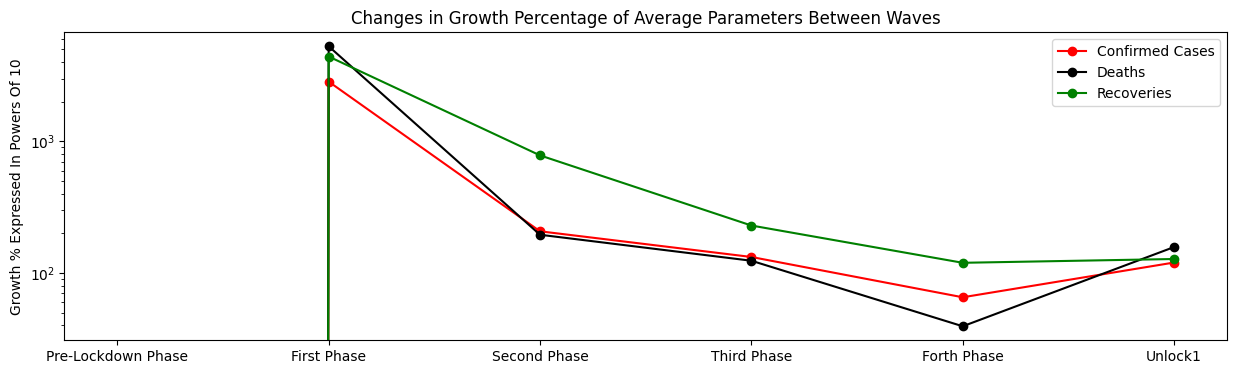

In [59]:
plt.figure(figsize = (15,4))
plt.plot(transposed_lockdown_stats.index, transposed_lockdown_stats['Cases Growth%'], 'ro-', label = 'Confirmed Cases')
plt.plot(transposed_lockdown_stats.index, transposed_lockdown_stats['Deaths Growth%'], 'ko-', label = 'Deaths')
plt.plot(transposed_lockdown_stats.index, transposed_lockdown_stats['Recoveries Growth%'], 'go-', label = 'Recoveries')
plt.legend()
plt.yscale("log")
plt.ylabel("Growth % Expressed In Powers Of 10")
plt.title("Changes in Growth Percentage of Average Parameters Between Waves")
plt.show();

- The growth percentage figure in the first wave is notably higher compared to the other phases. To visualize changes more clearly, we plotted the graph in log scale, where the y-axis numbers are expressed as powers of 10.
- This exceptionally high growth percentage in the first wave is expected because the lockdown in India was imposed very early, when there were only a few hundred confirmed cases. As a result, the denominator in the calculation of the growth percentage is comparatively lower, leading to a higher growth percentage.
- However, after the lockdown is imposed, the growth percentage in average cases or deaths keeps decreasing with each phase, indicating the effectiveness of the lockdown in suppressing the cases from a sudden rise.
- This is further evident from the fact that when the lockdown is revoked and unlocking phases begin, we observe a sudden increase in both figures.

##### The Second Wave

In [60]:
Total_Confirmed_Cases = second_wave["Confirmed"].iloc[-1] - second_wave["Confirmed"].iloc[1]
Total_Deaths = second_wave["Deaths"].iloc[-1] - second_wave["Deaths"].iloc[1]
Total_Recoveries = second_wave["Cured"].iloc[-1] - second_wave["Cured"].iloc[1]

second_wave_summary = \
pd.DataFrame(
             { "Total Confirmed Cases" : Total_Confirmed_Cases ,
               "Total Deaths" : Total_Deaths ,
               "Total Recoveries" : Total_Recoveries ,
               "Mortality Rate (%)" : Total_Deaths* 100 / Total_Confirmed_Cases, 
               "Recovery Rate (%)" : Total_Recoveries* 100 / Total_Confirmed_Cases,
               "Avg Daily Cases" : second_wave["Daily New Cases"].sum() / len(second_wave["Date"]),
               "Avg Daily Deaths" : second_wave["Daily New Deaths"].sum() / len(second_wave["Date"]),
               "Duration Of The Wave (Days)" : len(second_wave["Date"])
             }, index = ["Values"]
             )

format_dict = {col1 : '{:,.0f}' for col1 in second_wave_summary.columns if col1 not in ["Mortality Rate (%)", "Recovery Rate (%)"] }
format_dict.update({col2 : '{:,.2f}' for col2 in ["Mortality Rate (%)", "Recovery Rate (%)"]})
bold("#### Summary Of The Second Wave")
second_wave_summary.style.format(format_dict)

#### Summary Of The Second Wave

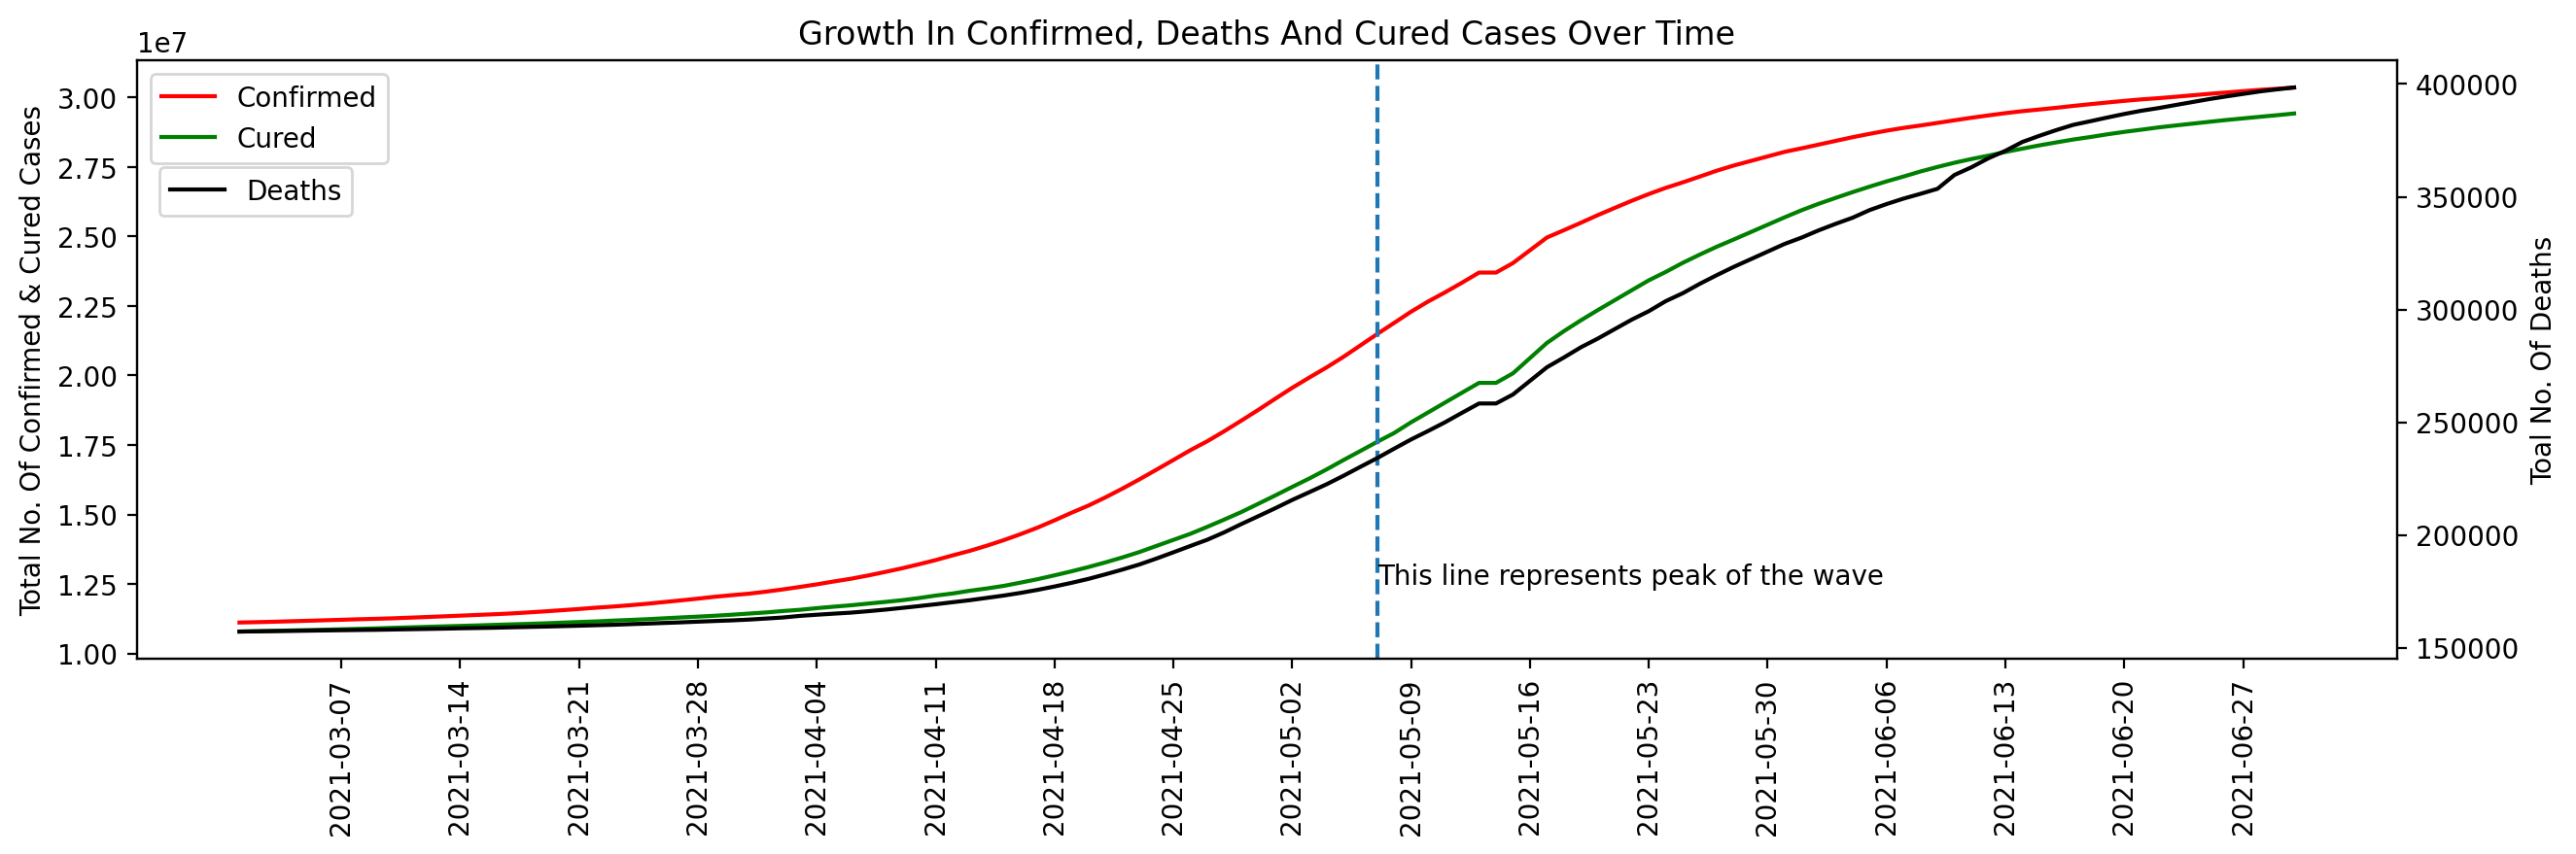

In [61]:
fig, ax = plt.subplots(figsize = (15,4), dpi = 200)

ax.plot(second_wave['Date'], second_wave['Confirmed'], label = 'Confirmed', color = 'r')
ax.plot(second_wave['Date'], second_wave['Cured'], label = 'Cured' ,color = 'g')

ax2 = ax.twinx()
ax2.plot(second_wave['Date'], second_wave['Deaths'], label = 'Deaths', color = 'k')

ax.axvline(second_wave[second_wave['Daily New Cases'] == second_wave['Daily New Cases'].max()]['Date'].iloc[0], ls = '--')
ax.text(second_wave[second_wave['Daily New Cases'] == second_wave['Daily New Cases'].max()]['Date'].iloc[0], 12500000, 
        "This line represents peak of the wave")

ax.set_title("Growth In Confirmed, Deaths And Cured Cases Over Time")
ax.legend()
ax.set_ylabel("Total No. Of Confirmed & Cured Cases")
ax.set_xticks(pd.date_range(start = '2021-03-01', end = '2021-07-01', freq = 'w' ))
ax.tick_params(axis = 'x', rotation = 90)
ax2.legend(loc = (0.01, 0.74))
ax2.set_ylabel("Toal No. Of Deaths")
plt.show();

- Since the number of deaths is significantly lower than the total number of confirmed & cured cases, so to obtain a clearer graph, I have plotted the Deaths line using the secondary axis.This way we will be able to see the variation in the numbers clearly otherwise, It would appear just as a flat line.
- The graph appears symmetrical, indicating similar intensities in the growth and decline of daily cases. However, the gap between the "confirmed line" and "cured line" is much larger than in the first wave, indicating higher daily deaths.

Intensity of Wave 1st half (Slope): 0.056491107043398645
Intensity of Wave 2nd half (Slope): -0.050296161886394866


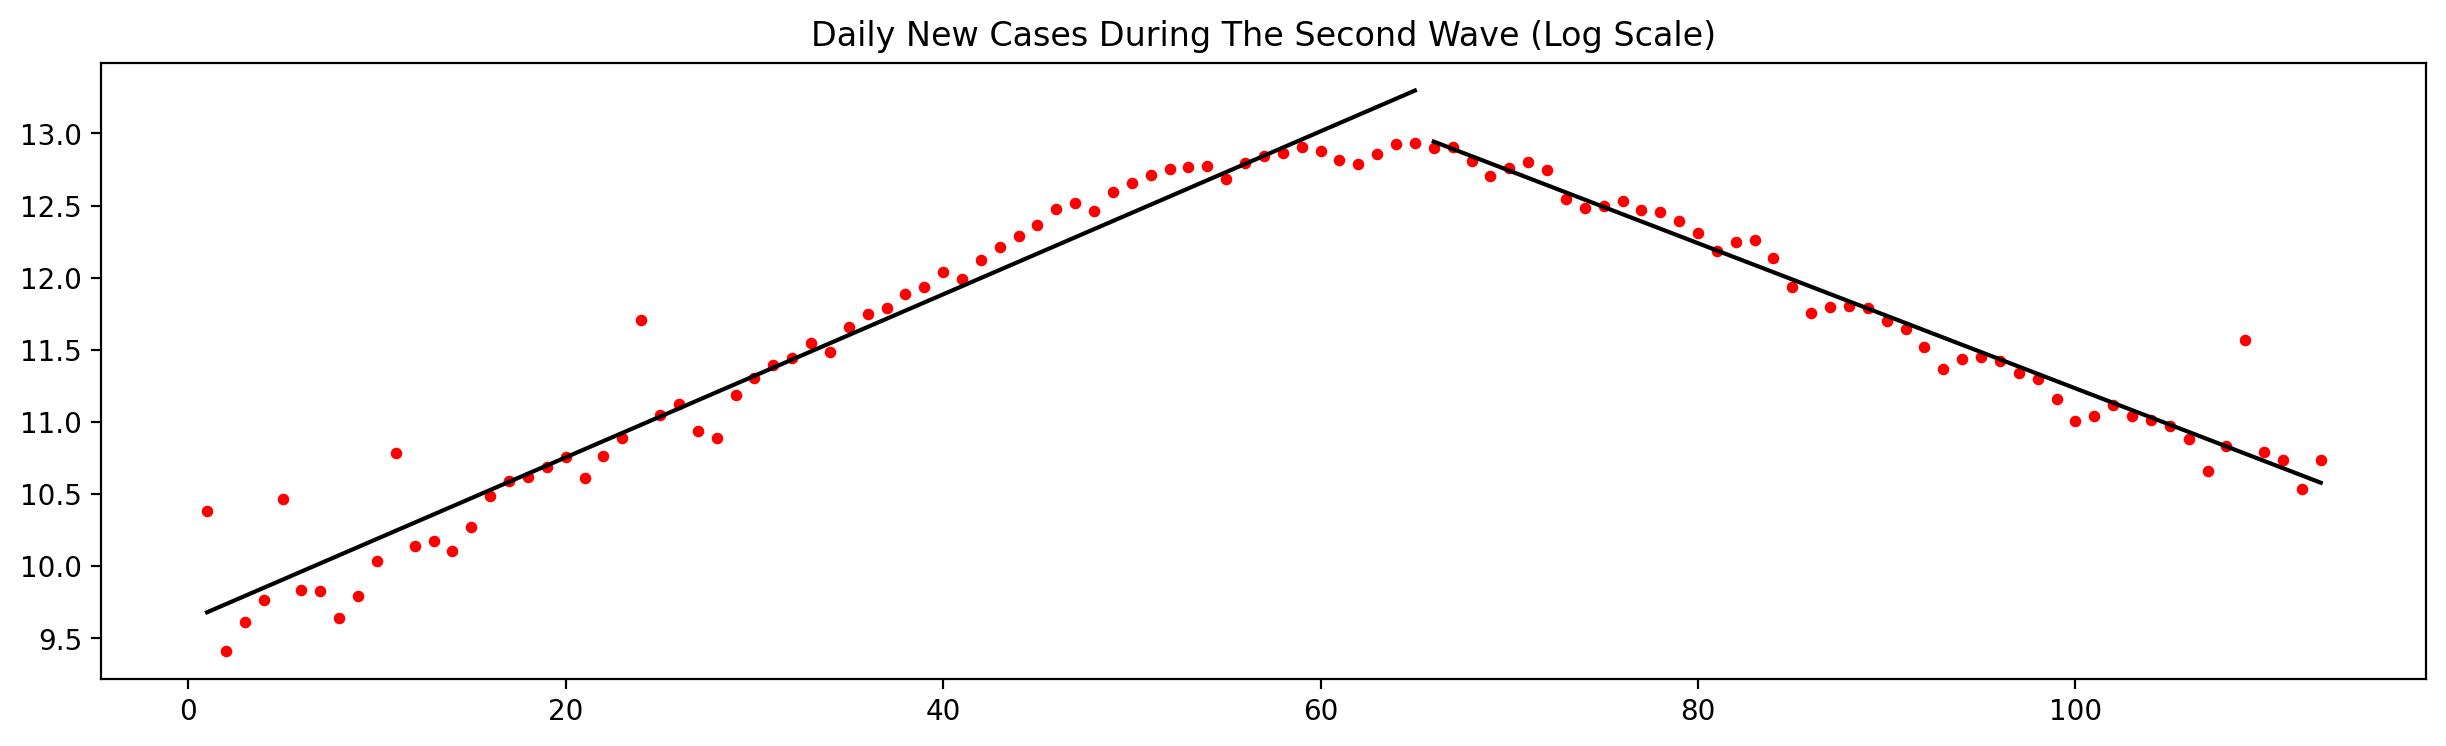

In [62]:
second_wave.drop(second_wave[second_wave['Daily New Cases'] == 0].index, inplace = True)

fig, ax = plt.subplots(figsize = (15,4), dpi = 200)

days_count_sw = np.arange(len(second_wave)) + 1
days_count_sw_gp = np.arange(len(second_wave.query('Date <= "2021-05-07"'))) + 1
days_count_sw_dp = np.arange(len(second_wave.query('Date > "2021-05-07"'))) + 1 + 65
second_wave_gp = second_wave.query('Date <= "2021-05-07"') 
second_wave_dp = second_wave.query('Date > "2021-05-07"')

ax.scatter(days_count_sw, np.log(second_wave['Daily New Cases']), color = 'r', s = 10)

slope_gp, intercept_gp = np.polyfit(days_count_sw_gp, np.log(second_wave_gp['Daily New Cases']), 1)
plt.plot(days_count_sw_gp, slope_gp* days_count_sw_gp + intercept_gp, color = 'k')

slope_dp, intercept_dp = np.polyfit(days_count_sw_dp, np.log(second_wave_dp['Daily New Cases']), 1)
plt.plot(days_count_sw_dp, slope_dp* days_count_sw_dp + intercept_dp, color = 'k')

plt.title("Daily New Cases During The Second Wave (Log Scale)")

print('Intensity of Wave 1st half (Slope):', slope_gp)
print('Intensity of Wave 2nd half (Slope):', slope_dp)
plt.show();

- Most of the data points in the growth phase either overlap with or lie above the trend line, indicating exponential growth in daily cases during this period. After the peak of the wave hits, cases also decrease exponentially.
- This observation is further supported by the slopes of the trend lines in both phases, which indicate similar intensities of growth and decline.
Comparing the trend line of the first wave to the second wave, the second wave trend line appears steeper, as verified by the slopes of the trend lines in both phases. This suggests that the growth of cases during the second wave is more intensive.
- This can be attributed to the second wave being caused by the Delta variant of the virus, which is said to be more infectious than the previous Alpha variant virus.
This conclusion is further supported by the numbers of average daily cases and average daily deaths.

#### Analysis Of States During The Second Wave

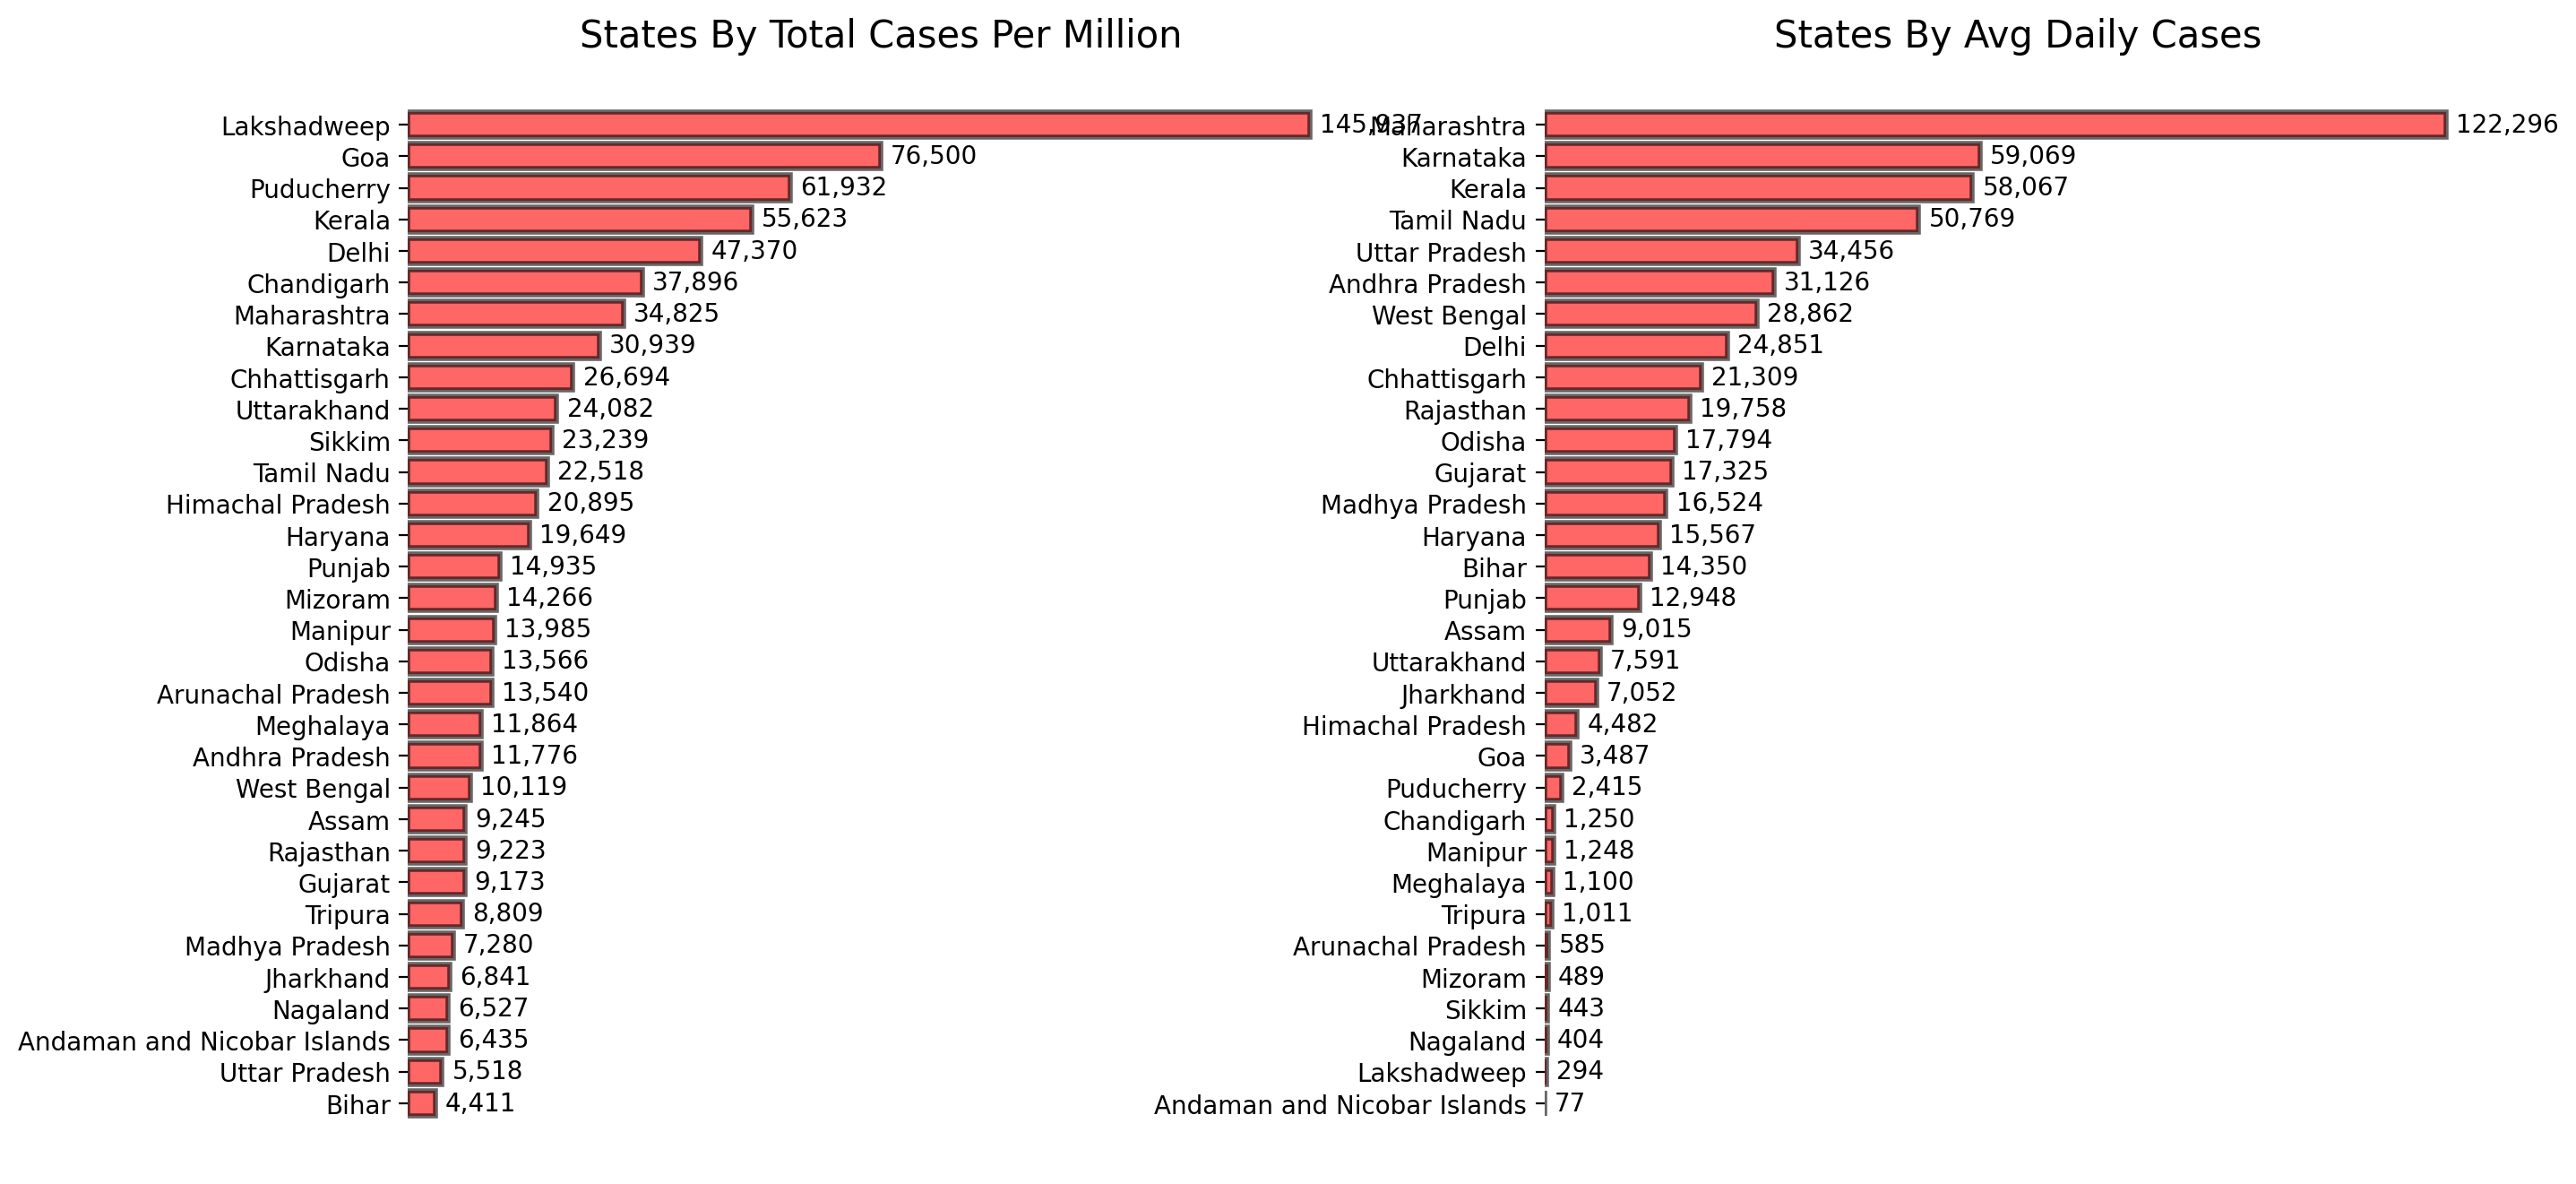

In [63]:
statewise_second_wave = grpd_covid_df.query(' Date >= "2021-03-01" & Date <= "2021-06-30" ').pivot_table(index = 'State_UT', values = ['Daily New Cases', 'Daily New Deaths', 'Daily New Recoveries'], 
                                              aggfunc = 'sum').reset_index()
statewise_second_wave.columns = ['State_UT', 'Confirmed', 'Deaths', 'Cured']

statewise_second_wave['Recovery Rate'] = (statewise_second_wave['Cured']/statewise_second_wave['Confirmed'])*100
statewise_second_wave['Mortality Rate'] = (statewise_second_wave['Deaths']/statewise_second_wave['Confirmed'])*100

statewise_second_wave = pd.merge(statewise_second_wave, census_df, on = 'State_UT')
statewise_second_wave['Cases Per M']= statewise_second_wave['Confirmed']*1000000 / statewise_second_wave['Population']
statewise_second_wave['Avg Daily Cases']= statewise_second_wave['Confirmed'] / len(statewise_second_wave['Confirmed'])


fig,ax = plt.subplots(1, 2, figsize = (15,8), dpi = 200)
cases_PerM_bars = ax[0].barh(statewise_second_wave.sort_values('Cases Per M', ascending = True)['State_UT'], 
                           statewise_second_wave.sort_values('Cases Per M', ascending = True)['Cases Per M'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[0].bar_label(cases_PerM_bars, fmt = '{:,.0f}', padding = 4)
ax[0].set_title("States By Total Cases Per Million", fontsize = 15)
ax[0].set_xticks(ticks = [])

for spine in ax[0].spines.values():
    spine.set_visible(False)
    

avg_daily_cases_bars = ax[1].barh(statewise_second_wave.sort_values('Avg Daily Cases', ascending = True)['State_UT'], 
                           statewise_second_wave.sort_values('Avg Daily Cases', ascending = True)['Avg Daily Cases'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[1].bar_label(avg_daily_cases_bars, fmt = '{:,.0f}', padding = 4)
ax[1].set_title("States By Avg Daily Cases", fontsize = 15)
ax[1].set_xticks(ticks = [])

for spine in ax[1].spines.values():
    spine.set_visible(False)
    

plt.show();


- Once again, Maharashtra, Karnataka, and Kerala are the top three states in terms of average daily cases.
- This time, Tamil Nadu surpasses Andhra Pradesh, and Uttar Pradesh ranks above Delhi, occupying the 4th and 5th spots respectively.
- North-eastern states remain at the bottom of the list.
- The calculation for "cases per million people" tends to be higher in states and UTs with smaller populations, such as Lakshadweep, Puducherry, and Goa, even if the absolute numbers are not very high.

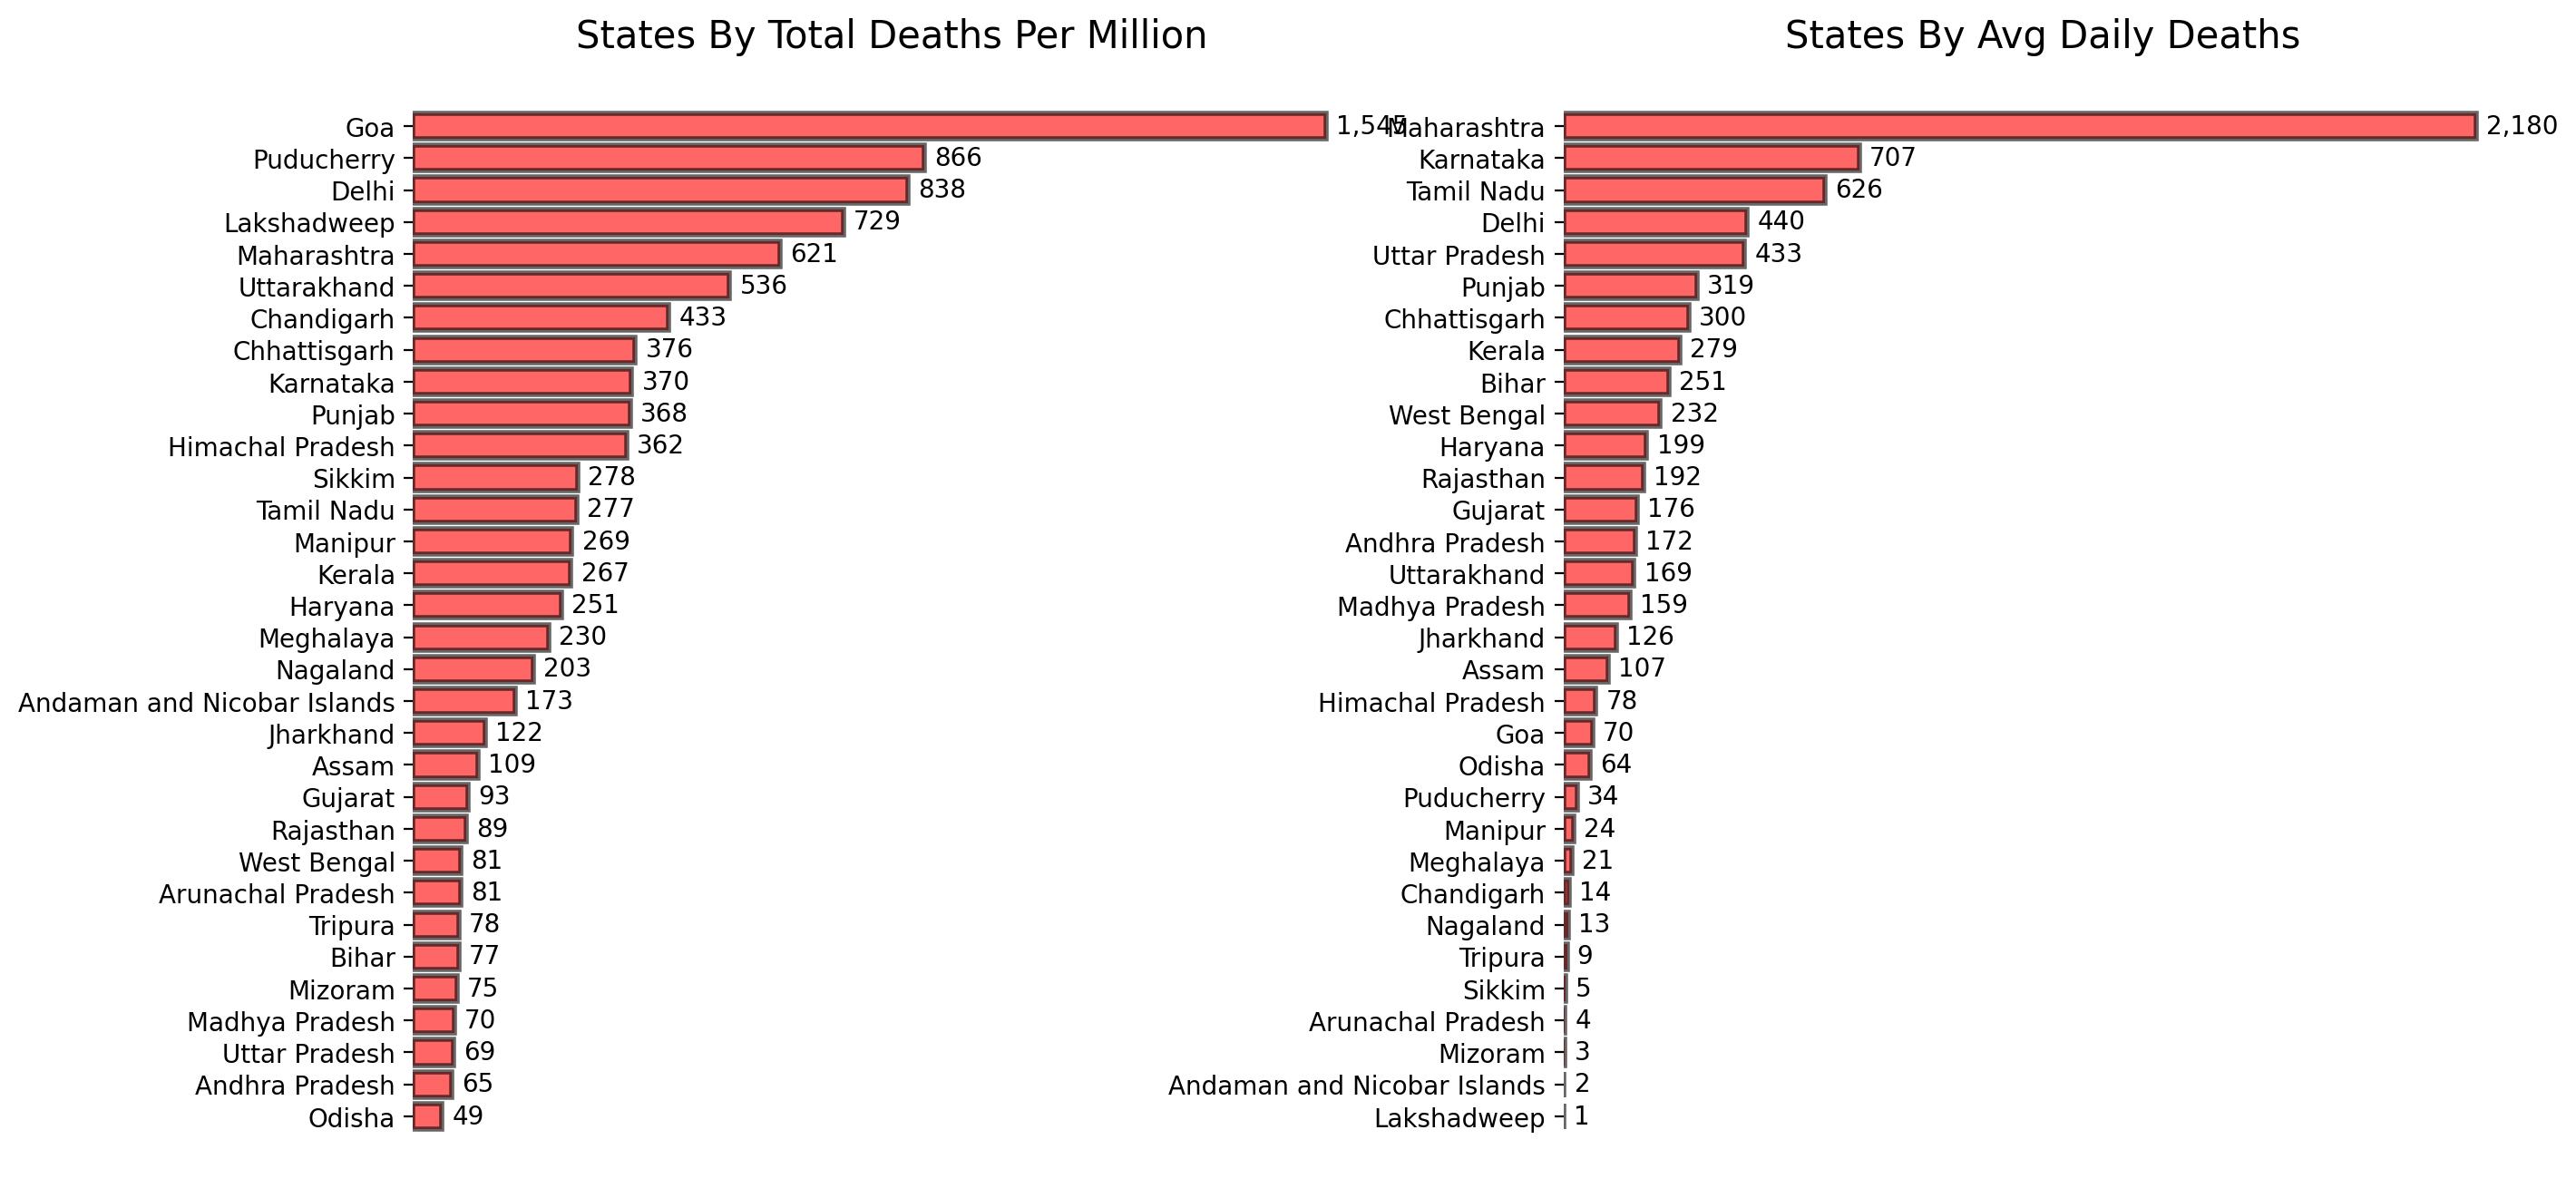

In [64]:
statewise_second_wave['Deaths Per M']= statewise_second_wave['Deaths']*1000000 / statewise_second_wave['Population']
statewise_second_wave['Avg Daily Deaths']= statewise_second_wave['Deaths'] / len(statewise_second_wave['Deaths'])


fig,ax = plt.subplots(1, 2, figsize = (15,8), dpi = 200)
cases_PerM_bars = ax[0].barh(statewise_second_wave.sort_values('Deaths Per M', ascending = True)['State_UT'], 
                           statewise_second_wave.sort_values('Deaths Per M', ascending = True)['Deaths Per M'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[0].bar_label(cases_PerM_bars, fmt = '{:,.0f}', padding = 4)
ax[0].set_title("States By Total Deaths Per Million", fontsize = 15)
ax[0].set_xticks(ticks = [])

for spine in ax[0].spines.values():
    spine.set_visible(False)
    

avg_daily_cases_bars = ax[1].barh(statewise_second_wave.sort_values('Avg Daily Deaths', ascending = True)['State_UT'], 
                           statewise_second_wave.sort_values('Avg Daily Deaths', ascending = True)['Avg Daily Deaths'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[1].bar_label(avg_daily_cases_bars, fmt = '{:,.0f}', padding = 4)
ax[1].set_title("States By Avg Daily Deaths", fontsize = 15)
ax[1].set_xticks(ticks = [])

for spine in ax[1].spines.values():
    spine.set_visible(False)
    

plt.show();


- If we exclude Goa and Puducherry, which rank at the top primarily due to their smaller populations, Delhi emerges as the most affected state in terms of total deaths per million people.
- Maharashtra and Karnataka are the top two states in terms of average daily deaths as well.
- Interestingly, Kerala, which ranks third in terms of average daily cases, does not even rank among the top 7 affected states in terms of average daily deaths. This difference can be attributed to better healthcare facilities in Kerala.
- Punjab, as usual, ranks among the top in terms of average daily deaths despite not having more average daily cases. This could be due to having one of the lowest numbers of 'beds per 1000 people' available in the state.
- It's noteworthy that every state with fewer beds per 1000 people tends to rank higher in this list.

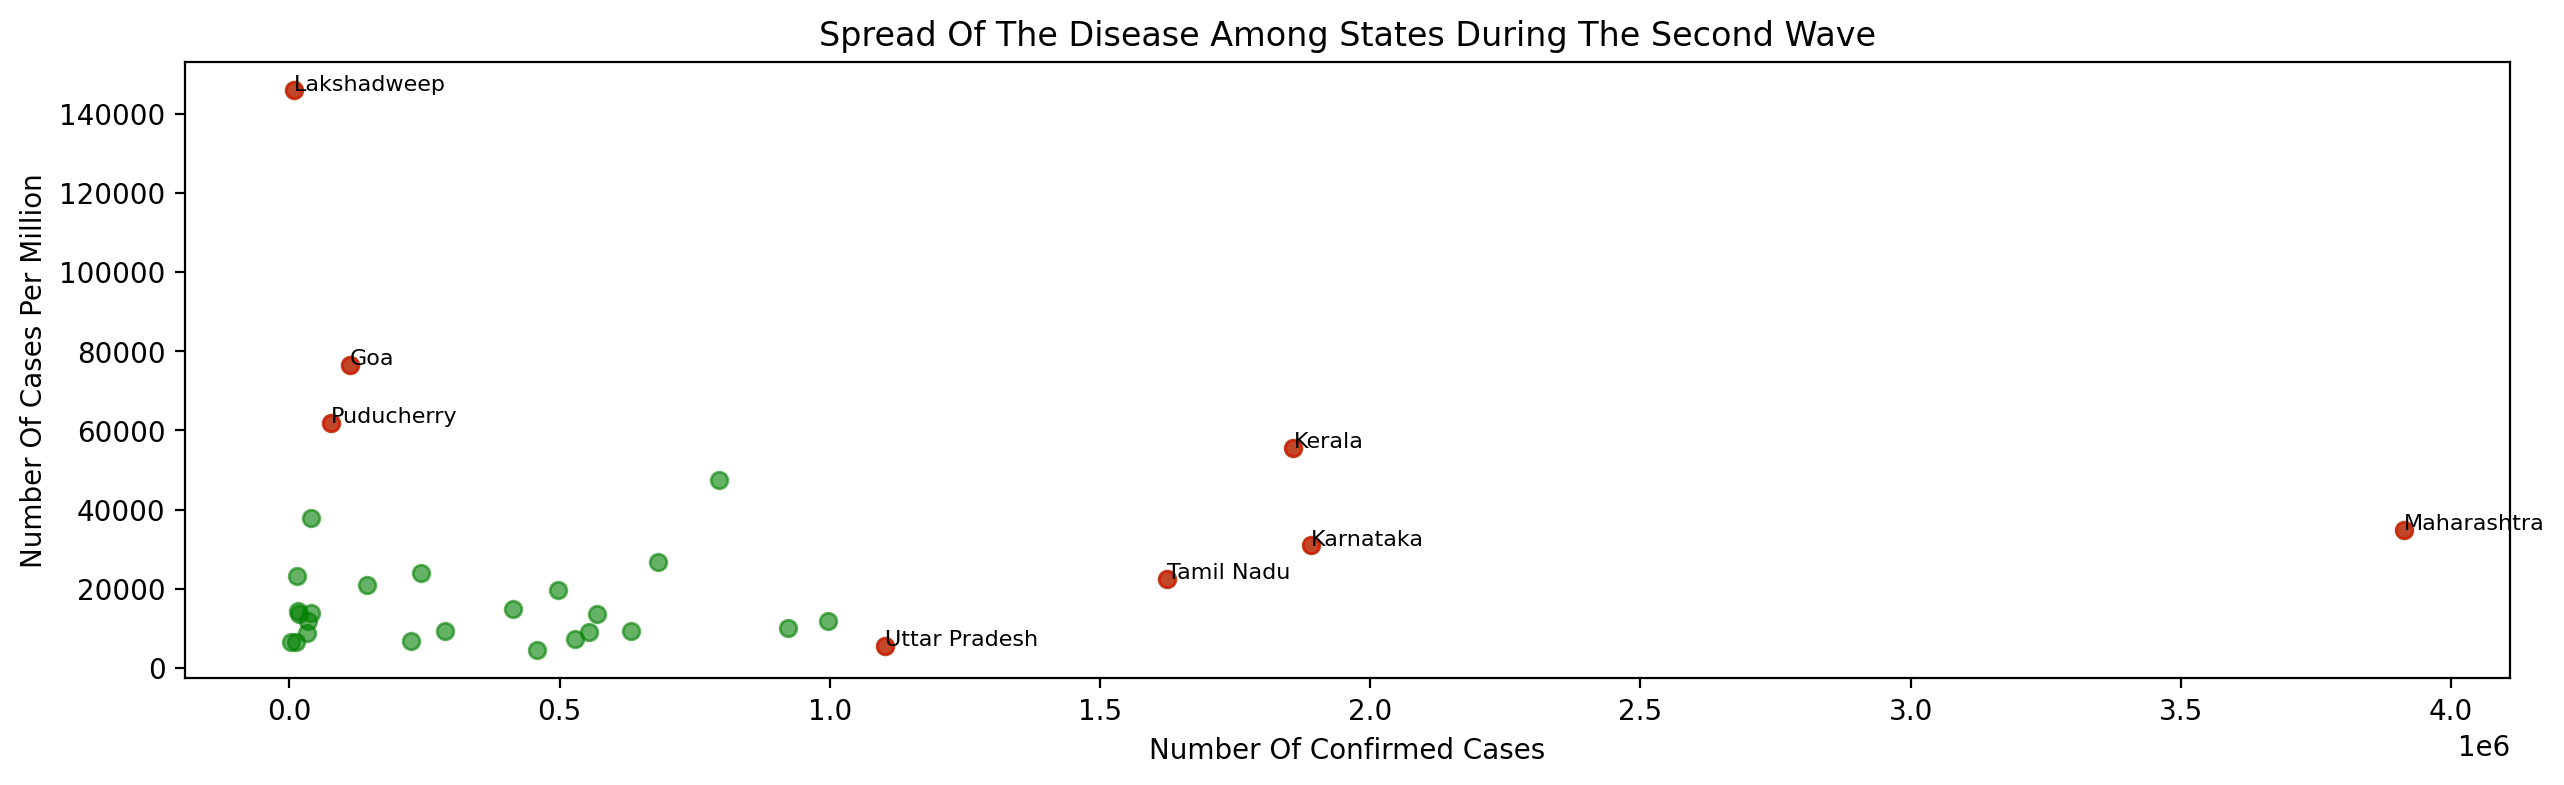

In [65]:
filtered_statewise_second_wave = statewise_second_wave[(statewise_second_wave['Confirmed'] >= 1000000) | (statewise_second_wave['Cases Per M'] >= 50000)].reset_index()

plt.figure(figsize = (15,4), dpi = 200)
plt.scatter(statewise_second_wave['Confirmed'], statewise_second_wave['Cases Per M'], alpha = 0.6, color = 'g')
plt.scatter(filtered_statewise_second_wave['Confirmed'], filtered_statewise_second_wave['Cases Per M'], alpha = 0.6, color = 'r')

for i in filtered_statewise_second_wave.index:
    plt.annotate(filtered_statewise_second_wave['State_UT'].iloc[i], xy = (filtered_statewise_second_wave['Confirmed'].iloc[i], 
                 filtered_statewise_second_wave['Cases Per M'].iloc[i]), 
                 size = 8)

plt.xlabel("Number Of Confirmed Cases")
plt.ylabel("Number Of Cases Per Million")
plt.title('Spread Of The Disease Among States During The Second Wave')
    
plt.show();

#### Analyzing the impact of election rallies on covid-19 figures.

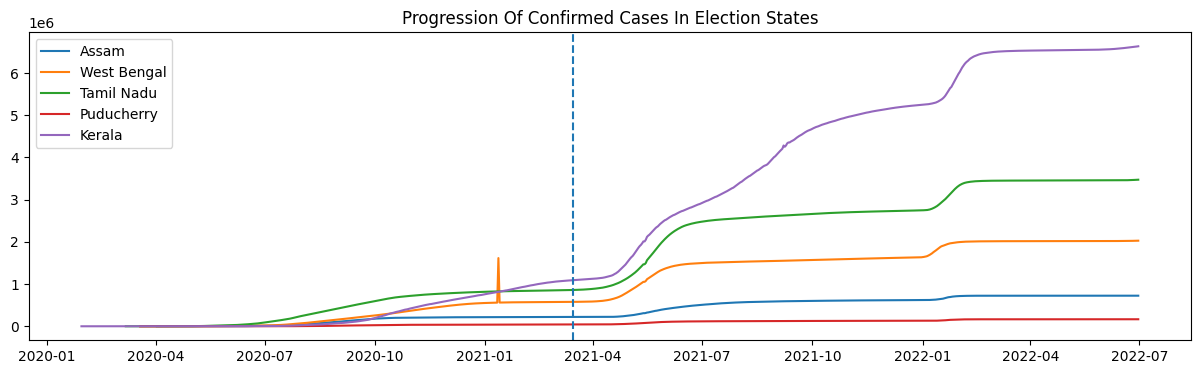

In [66]:
# Impact Of Election rallies on numbers during the second wave

Assam = grpd_covid_df.query(' State_UT == "Assam" ')
West_Bengal = grpd_covid_df.query(' State_UT == "West Bengal" ')
Tamil_Nadu = grpd_covid_df.query(' State_UT == "Tamil Nadu" ')
Puducherry = grpd_covid_df.query(' State_UT == "Puducherry" ')
Kerala = grpd_covid_df.query(' State_UT == "Kerala" ')

fig, ax = plt.subplots(figsize = (15,4))
ax.plot(Assam.index.get_level_values('Date'), Assam['Confirmed'], label = "Assam")
ax.plot(West_Bengal.index.get_level_values('Date'), West_Bengal['Confirmed'], label = "West Bengal")
ax.plot(Tamil_Nadu.index.get_level_values('Date'), Tamil_Nadu['Confirmed'], label = "Tamil Nadu")
ax.plot(Puducherry.index.get_level_values('Date'), Puducherry['Confirmed'], label = "Puducherry")
ax.plot(Kerala.index.get_level_values('Date'), Kerala['Confirmed'], label = "Kerala")

ax.set_title("Progression Of Confirmed Cases In Election States")
ax.axvline(grpd_covid_df.index.get_level_values('Date')[grpd_covid_df.index.get_level_values('Date') == '2021-03-15'].unique(), ls = '--')

ax.legend()
plt.show();


Here, we are attempting to analyze whether election rallies during the legislative elections in Assam, West Bengal, Tamil Nadu, Puducherry, and Kerala in 2021 had any role in increasing Covid-19 numbers.

- Elections in 2021 were held from March 27th to April 20th, but election rallies began well before the polling dates. Therefore, we chose March 15th, 2021, as a reference to compare the figures before and after.
- In Kerala, Tamil Nadu, and West Bengal, there's a clear upward trend in confirmed coronavirus cases starting in the second part of March, followed by a significant spike in April.

Let's now analyze some states that did not have elections during this time as well

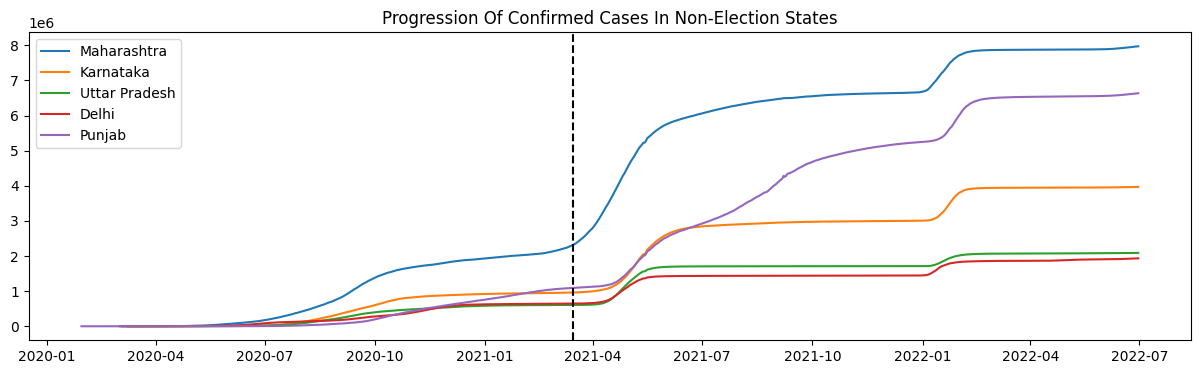

In [67]:
# Impact Of Election rallies on numbers during the second wave

Maharashtra = grpd_covid_df.query(' State_UT == "Maharashtra" ')
Karnataka = grpd_covid_df.query(' State_UT == "Karnataka" ')
Uttar_Pradesh = grpd_covid_df.query(' State_UT == "Uttar Pradesh" ')
Delhi = grpd_covid_df.query(' State_UT == "Delhi" ')
Punjab = grpd_covid_df.query(' State_UT == "Kerala" ')

fig, ax = plt.subplots(figsize = (15,4))
ax.plot(Maharashtra.index.get_level_values('Date'), Maharashtra['Confirmed'], label = "Maharashtra")
ax.plot(Karnataka.index.get_level_values('Date'), Karnataka['Confirmed'], label = "Karnataka")
ax.plot(Uttar_Pradesh.index.get_level_values('Date'), Uttar_Pradesh['Confirmed'], label = "Uttar Pradesh")
ax.plot(Delhi.index.get_level_values('Date'), Delhi['Confirmed'], label = "Delhi")
ax.plot(Punjab.index.get_level_values('Date'), Punjab['Confirmed'], label = "Punjab")

ax.set_title("Progression Of Confirmed Cases In Non-Election States")
ax.axvline(grpd_covid_df.index.get_level_values('Date')[grpd_covid_df.index.get_level_values('Date') == '2021-03-15'].unique(), ls = '--', color = 'k')

ax.legend()
plt.show();


- While some of the non-election states also experienced a significant spike after the end of April. So we can’t conclude that sudden increase in covid cases in India was primarily due to election rallies.
- However, we can't deny the fact that covid protocols were compromised during the rallies, so it could be one of the contributing factors to the increase in cases, although not the primary reason.

##### The Third Wave

In [68]:
Total_Confirmed_Cases = third_wave["Confirmed"].iloc[-1] - third_wave["Confirmed"].iloc[1]
Total_Deaths = third_wave["Deaths"].iloc[-1] - third_wave["Deaths"].iloc[1]
Total_Recoveries = third_wave["Cured"].iloc[-1] - third_wave["Cured"].iloc[1]

third_wave_summary = \
pd.DataFrame(
             { "Total Confirmed Cases" : Total_Confirmed_Cases ,
               "Total Deaths" : Total_Deaths ,
               "Total Recoveries" : Total_Recoveries ,
               "Mortality Rate (%)" : Total_Deaths* 100 / Total_Confirmed_Cases , 
               "Recovery Rate (%)" : Total_Recoveries* 100 / Total_Confirmed_Cases ,
               "Avg Daily Cases" : third_wave["Daily New Cases"].sum() / len(third_wave["Date"]) ,
               "Avg Daily Deaths" : third_wave["Daily New Deaths"].sum() / len(third_wave["Date"]) ,
               "Duration Of The Wave (Days)" : len(third_wave["Date"])
             }, index = ["Values"]
             )
format_dict = {col1 : '{:,.0f}' for col1 in third_wave_summary.columns if col1 not in ["Mortality Rate (%)", "Recovery Rate (%)"] }
format_dict.update({col2 : '{:,.2f}' for col2 in ["Mortality Rate (%)", "Recovery Rate (%)"]})
bold("#### Summary Of The Third Wave")
third_wave_summary.style.format(format_dict)

#### Summary Of The Third Wave

- The third wave in India is the shortest one and caused by the Omicron varient of the virus which is said to be the the most transmissible among all the varients observed in India to date, nearly three to four folds more transmissible than the previous Delta strain.
- On the other hand, It is less virulent than the previous starin means people specially who are vaccinated even a single dose are less likely to develop symptomatic disease. Most of the covid patients admitted to hospitals during this wave are either unvaccinated or have pre-existing health conditions.
- The lower fatality rate of this strain is also evident by the lower number of average daily deaths despite the large number of average daily cases.

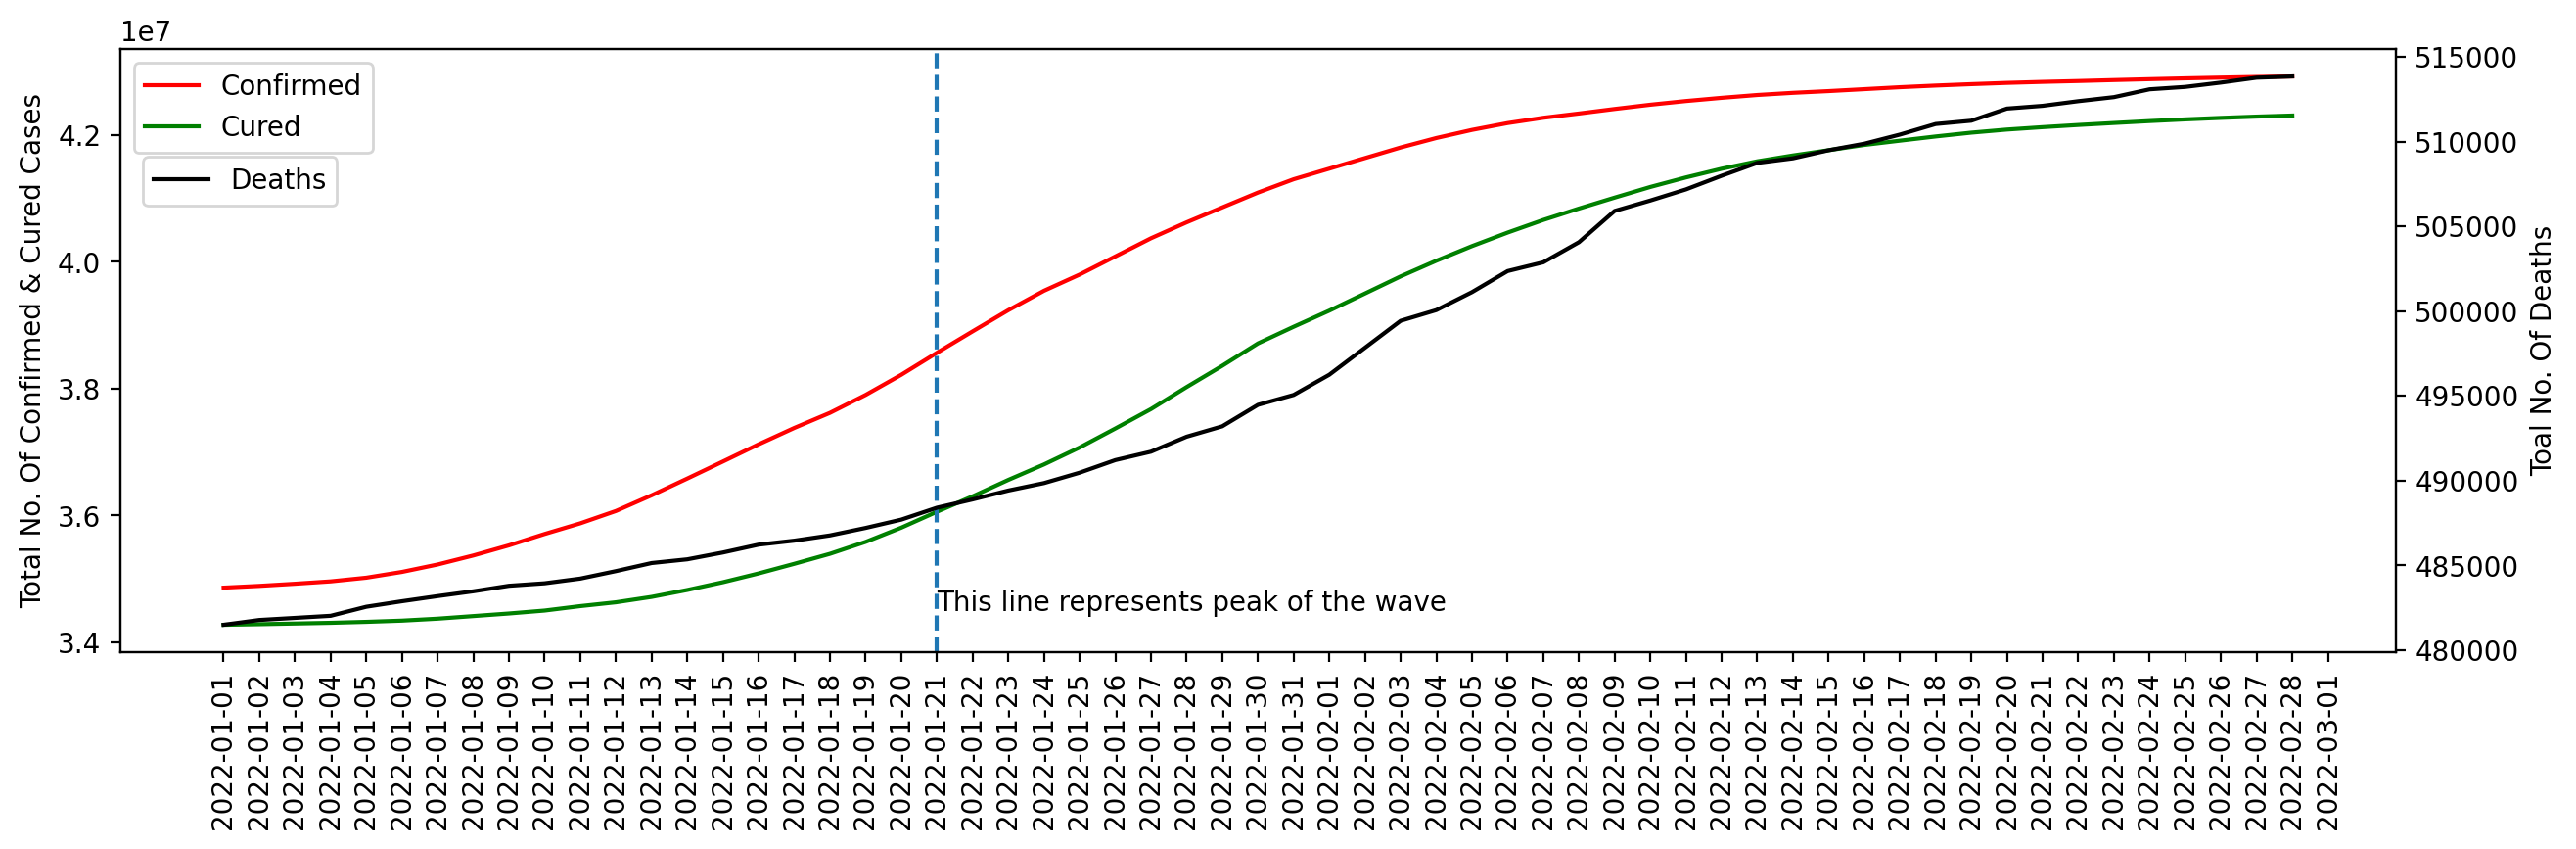

In [69]:
fig, ax = plt.subplots(figsize = (15,4), dpi = 200)
ax.plot(third_wave['Date'], third_wave['Confirmed'], color = 'r', label = 'Confirmed')
ax.plot(third_wave['Date'], third_wave['Cured'], color = 'g', label = 'Cured')

ax2 = ax.twinx()
ax2.plot(third_wave['Date'], third_wave['Deaths'], label = 'Deaths', color = 'k')

ax.axvline(third_wave[third_wave['Daily New Cases'] == third_wave['Daily New Cases'].max()]['Date'].iloc[0], ls = '--')
ax.text(third_wave[third_wave['Daily New Cases'] == third_wave['Daily New Cases'].max()]['Date'].iloc[0], 34500000, 
        "This line represents peak of the wave")

ax.legend()
ax.set_ylabel("Total No. Of Confirmed & Cured Cases")
ax.set_xticks(pd.date_range(start = '2022-01-01', end = '2022-03-01', freq = 'd' ))
ax.tick_params(axis = 'x', rotation = 90)
ax2.legend(loc = (0.01, 0.74))
ax2.set_ylabel("Toal No. Of Deaths")
plt.show();

The gap between confirmed cases and deaths is larger compared to the previous two waves, indicating that deaths do not increase as efficiently as confirmed cases.

This could be attributed to several factors:
- The Omicron variant of the virus, which caused the third wave, is said to be more transmissible but less virulent than earlier variants.
- A large number of the population had received at least one dose of the vaccine by that time, and natural immunity developed against the virus also helped individuals combat this new strain.
- The Omicron variant caused mild or no symptoms at all in many infected people, suggesting that their immune systems were capable enough to fight this strain, resulting in fewer hospitalizations of the infected. 

Intensity of Wave 1st half (Slope): 0.12956849621143124
Intensity of Wave 2nd half (Slope): -0.11129777782199626


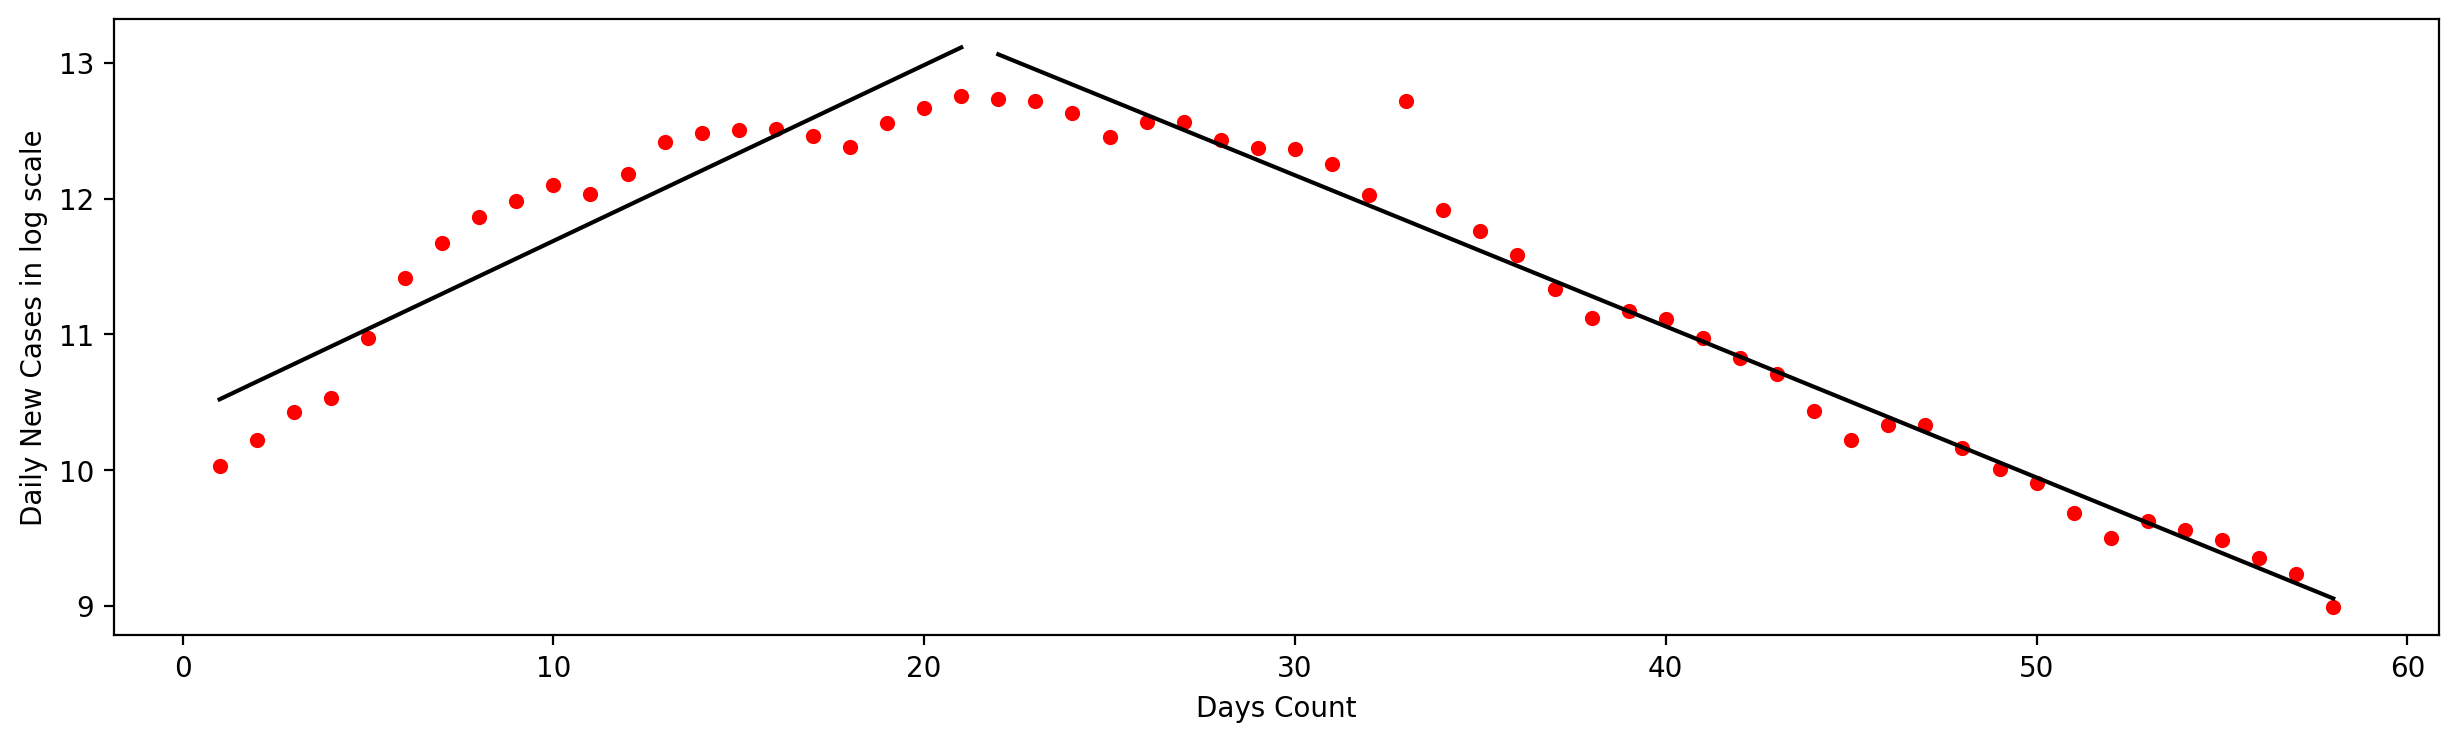

In [70]:
fig, ax = plt.subplots(figsize = (15,4), dpi = 200)

days_count_tw = np.arange(len(third_wave)) + 1
days_count_tw_gp = np.arange(len(third_wave.query('Date <= "2022-01-21"'))) + 1
days_count_tw_dp = np.arange(len(third_wave.query('Date > "2022-01-21"'))) + 1 + 21
third_wave_gp = third_wave.query('Date <= "2022-01-21"') 
third_wave_dp = third_wave.query('Date > "2022-01-21"')

ax.scatter(days_count_tw, np.log(third_wave['Daily New Cases']), color = 'r', s = 20)

slope_gp, intercept_gp = np.polyfit(days_count_tw_gp, np.log(third_wave_gp['Daily New Cases']), 1)
plt.plot(days_count_tw_gp, slope_gp* days_count_tw_gp + intercept_gp, color = 'k')

slope_dp, intercept_dp = np.polyfit(days_count_tw_dp, np.log(third_wave_dp['Daily New Cases']), 1)
plt.plot(days_count_tw_dp, slope_dp* days_count_tw_dp + intercept_dp, color = 'k')

plt.xlabel("Days Count")
plt.ylabel("Daily New Cases in log scale")

print('Intensity of Wave 1st half (Slope):', slope_gp)
print('Intensity of Wave 2nd half (Slope):', slope_dp)
plt.show();

The fact that data points are not perfectly aligned with the linear trend line, especially in the growth phase, indicates that the growth of cases is not perfectly exponential.
- Data points above the trend line indicate sudden spikes in cases, but this phase does not last for too long, and the data points eventually fall below the trend line. This suggests that the virus strain is incapable of maintaining the rate of growth.
- This could be attributed to vaccination efforts, which provided people with immunity to fight against the virus. As a result, there are fewer serious cases and less hospitalization.

#### Analysis Of States During The Third Wave

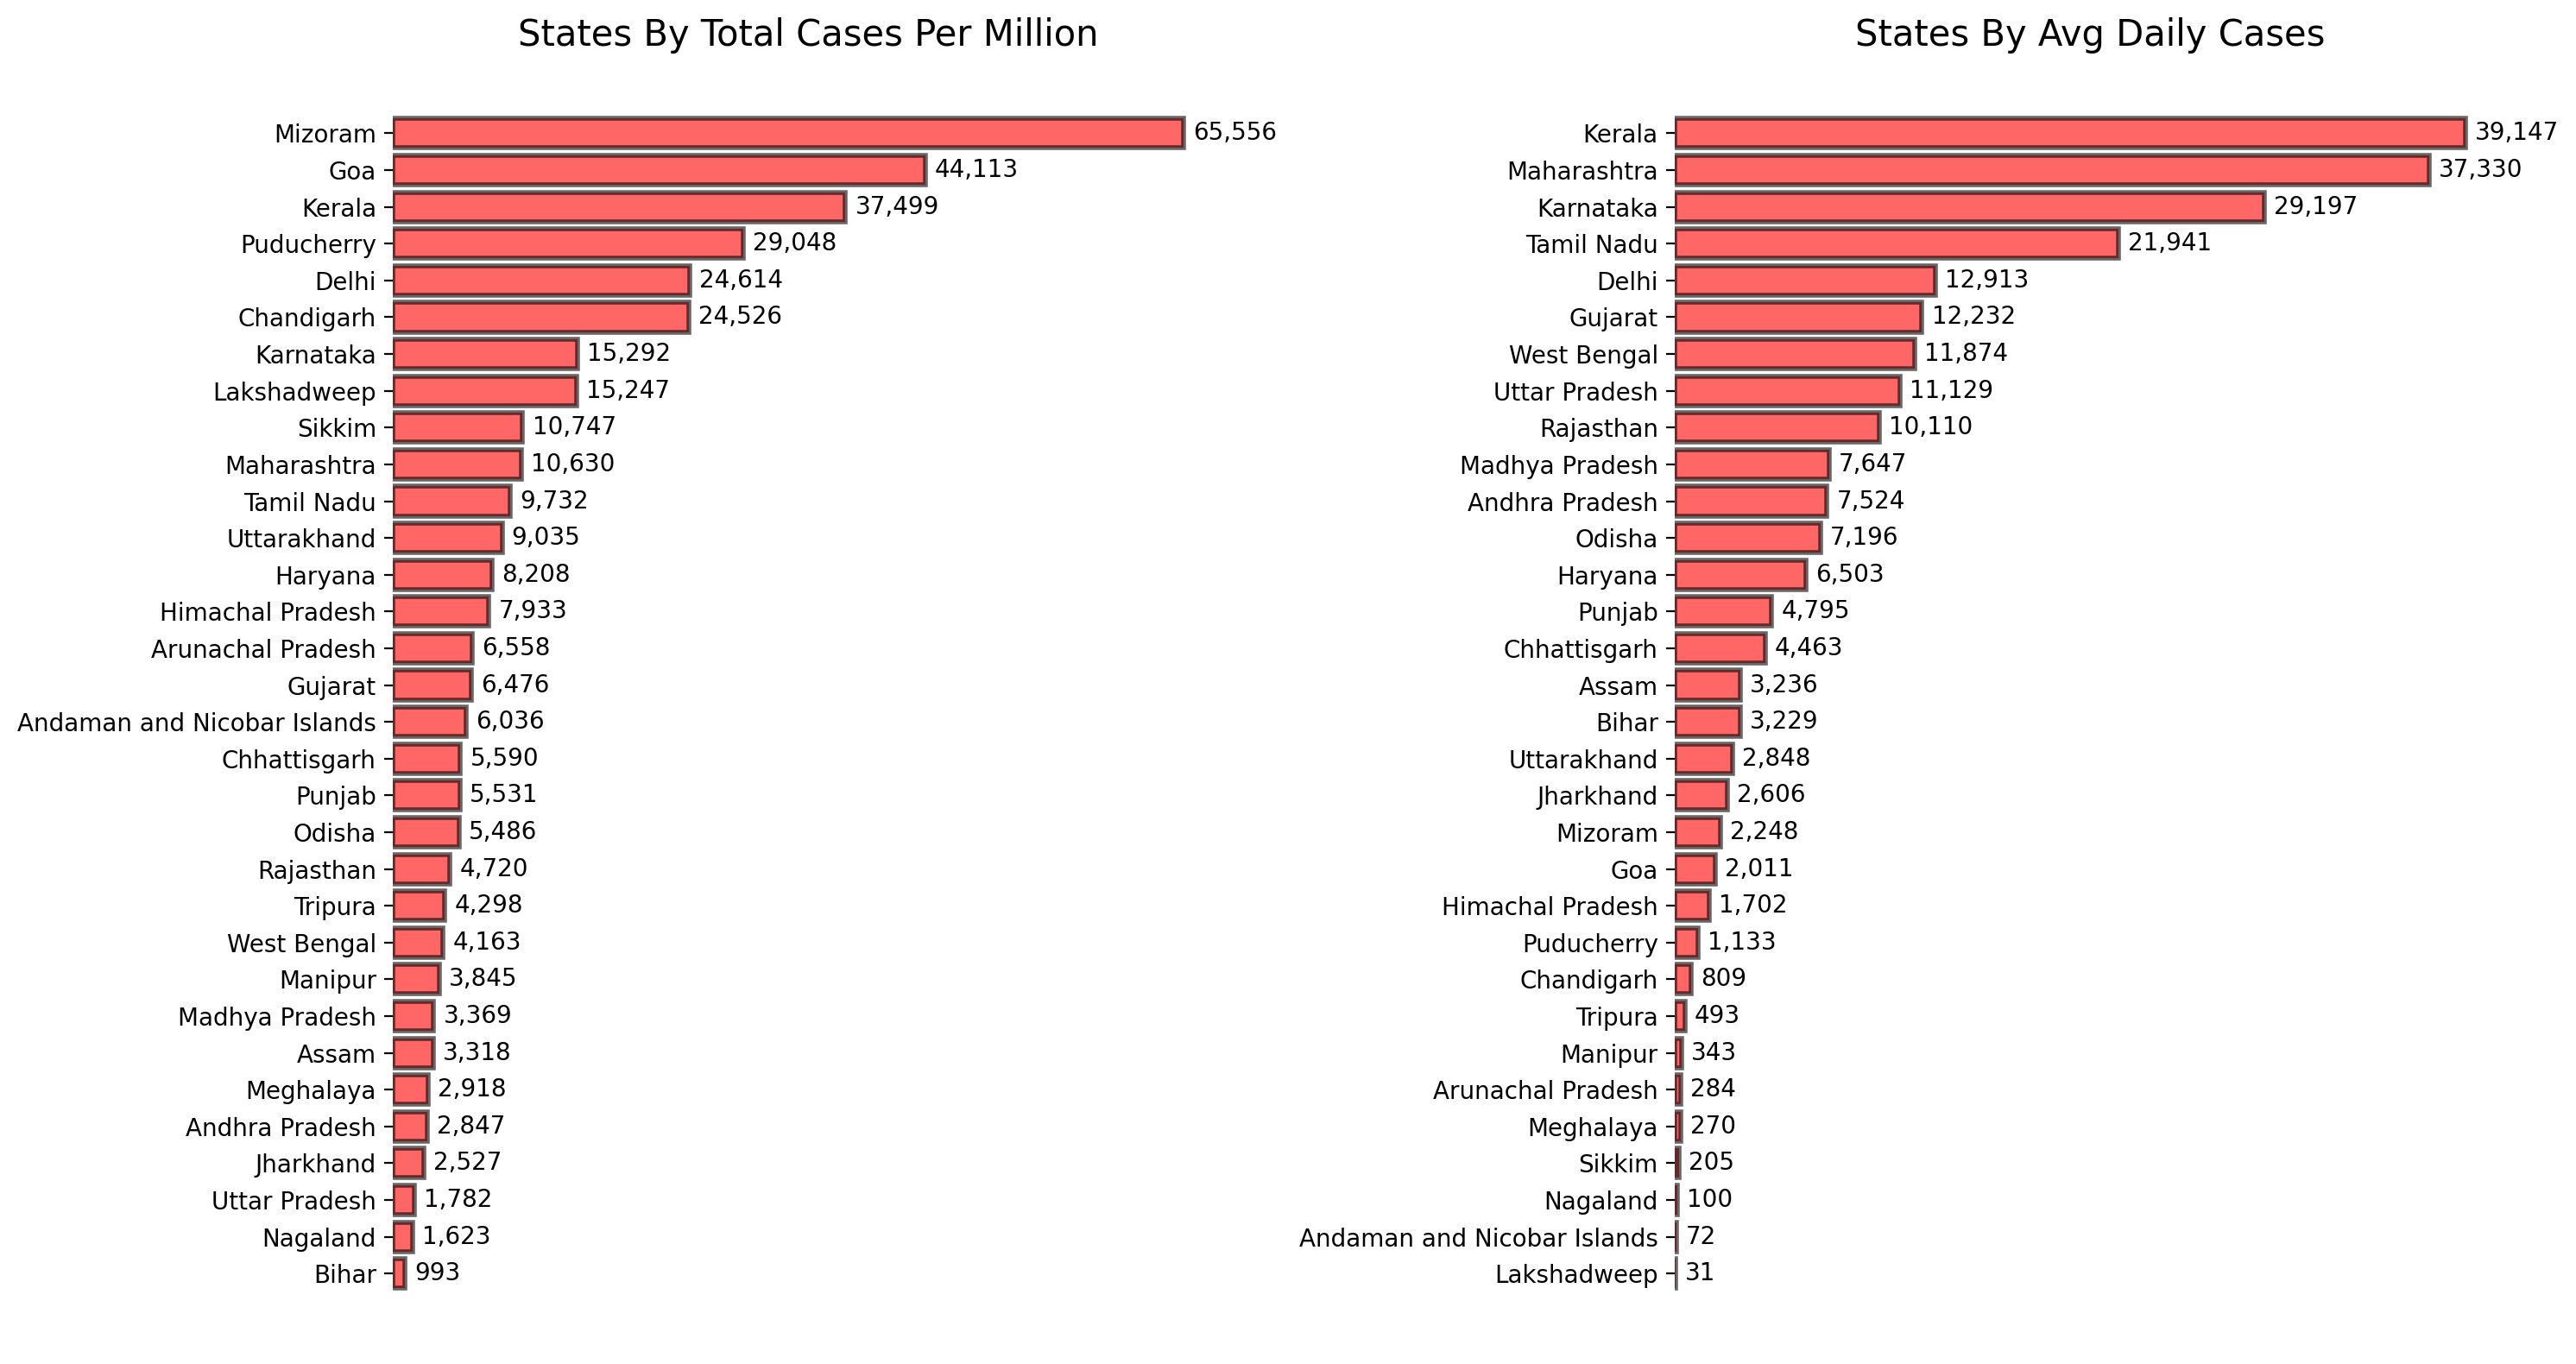

In [71]:
statewise_third_wave = grpd_covid_df.query(' Date >= "2022-01-01" & Date <= "2022-02-28" ').pivot_table(index = 'State_UT', values = ['Daily New Cases', 'Daily New Deaths', 'Daily New Recoveries'], 
                                              aggfunc = 'sum').reset_index()
statewise_third_wave.columns = ['State_UT', 'Confirmed', 'Deaths', 'Cured']

statewise_third_wave['Recovery Rate'] = (statewise_third_wave['Cured']/statewise_third_wave['Confirmed'])*100
statewise_third_wave['Mortality Rate'] = (statewise_third_wave['Deaths']/statewise_third_wave['Confirmed'])*100

statewise_third_wave = pd.merge(statewise_third_wave, census_df, on = 'State_UT')
statewise_third_wave['Cases Per M']= statewise_third_wave['Confirmed']*1000000 / statewise_third_wave['Population']
statewise_third_wave['Avg Daily Cases']= statewise_third_wave['Confirmed'] / len(statewise_third_wave['Confirmed'])


fig,ax = plt.subplots(1, 2, figsize = (15,8), dpi = 200)
cases_PerM_bars = ax[0].barh(statewise_third_wave.sort_values('Cases Per M', ascending = True)['State_UT'], 
                           statewise_third_wave.sort_values('Cases Per M', ascending = True)['Cases Per M'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[0].bar_label(cases_PerM_bars, fmt = '{:,.0f}', padding = 4)
ax[0].set_title("States By Total Cases Per Million", fontsize = 15)
ax[0].set_xticks(ticks = [])

for spine in ax[0].spines.values():
    spine.set_visible(False)
    

avg_daily_cases_bars = ax[1].barh(statewise_third_wave.sort_values('Avg Daily Cases', ascending = True)['State_UT'], 
                           statewise_third_wave.sort_values('Avg Daily Cases', ascending = True)['Avg Daily Cases'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[1].bar_label(avg_daily_cases_bars, fmt = '{:,.0f}', padding = 4)
ax[1].set_title("States By Avg Daily Cases", fontsize = 15)
ax[1].set_xticks(ticks = [])

for spine in ax[1].spines.values():
    spine.set_visible(False)
    
plt.tight_layout()
plt.show();


- As ususal, Kerala, Karnataka, Maharashtra, Tamil Nadu, Delhi and UP showing high numbers in average daily cases in this wave too.
- Mizoram leads in total cases per million, indicating a high prevalence of COVID-19 relative to its population.
- Goa and Kerala follow Mizoram in total cases per million, showing substantial case loads relative to their populations.
- Smaller states and Union Territories like Puducherry and Chandigarh show higher cases per million due to their smaller population bases, despite lower absolute case numbers.- Larger states like Uttar Pradesh and Bihar show lower total cases per million but have significant contributions to daily new cases due to their larger populations.

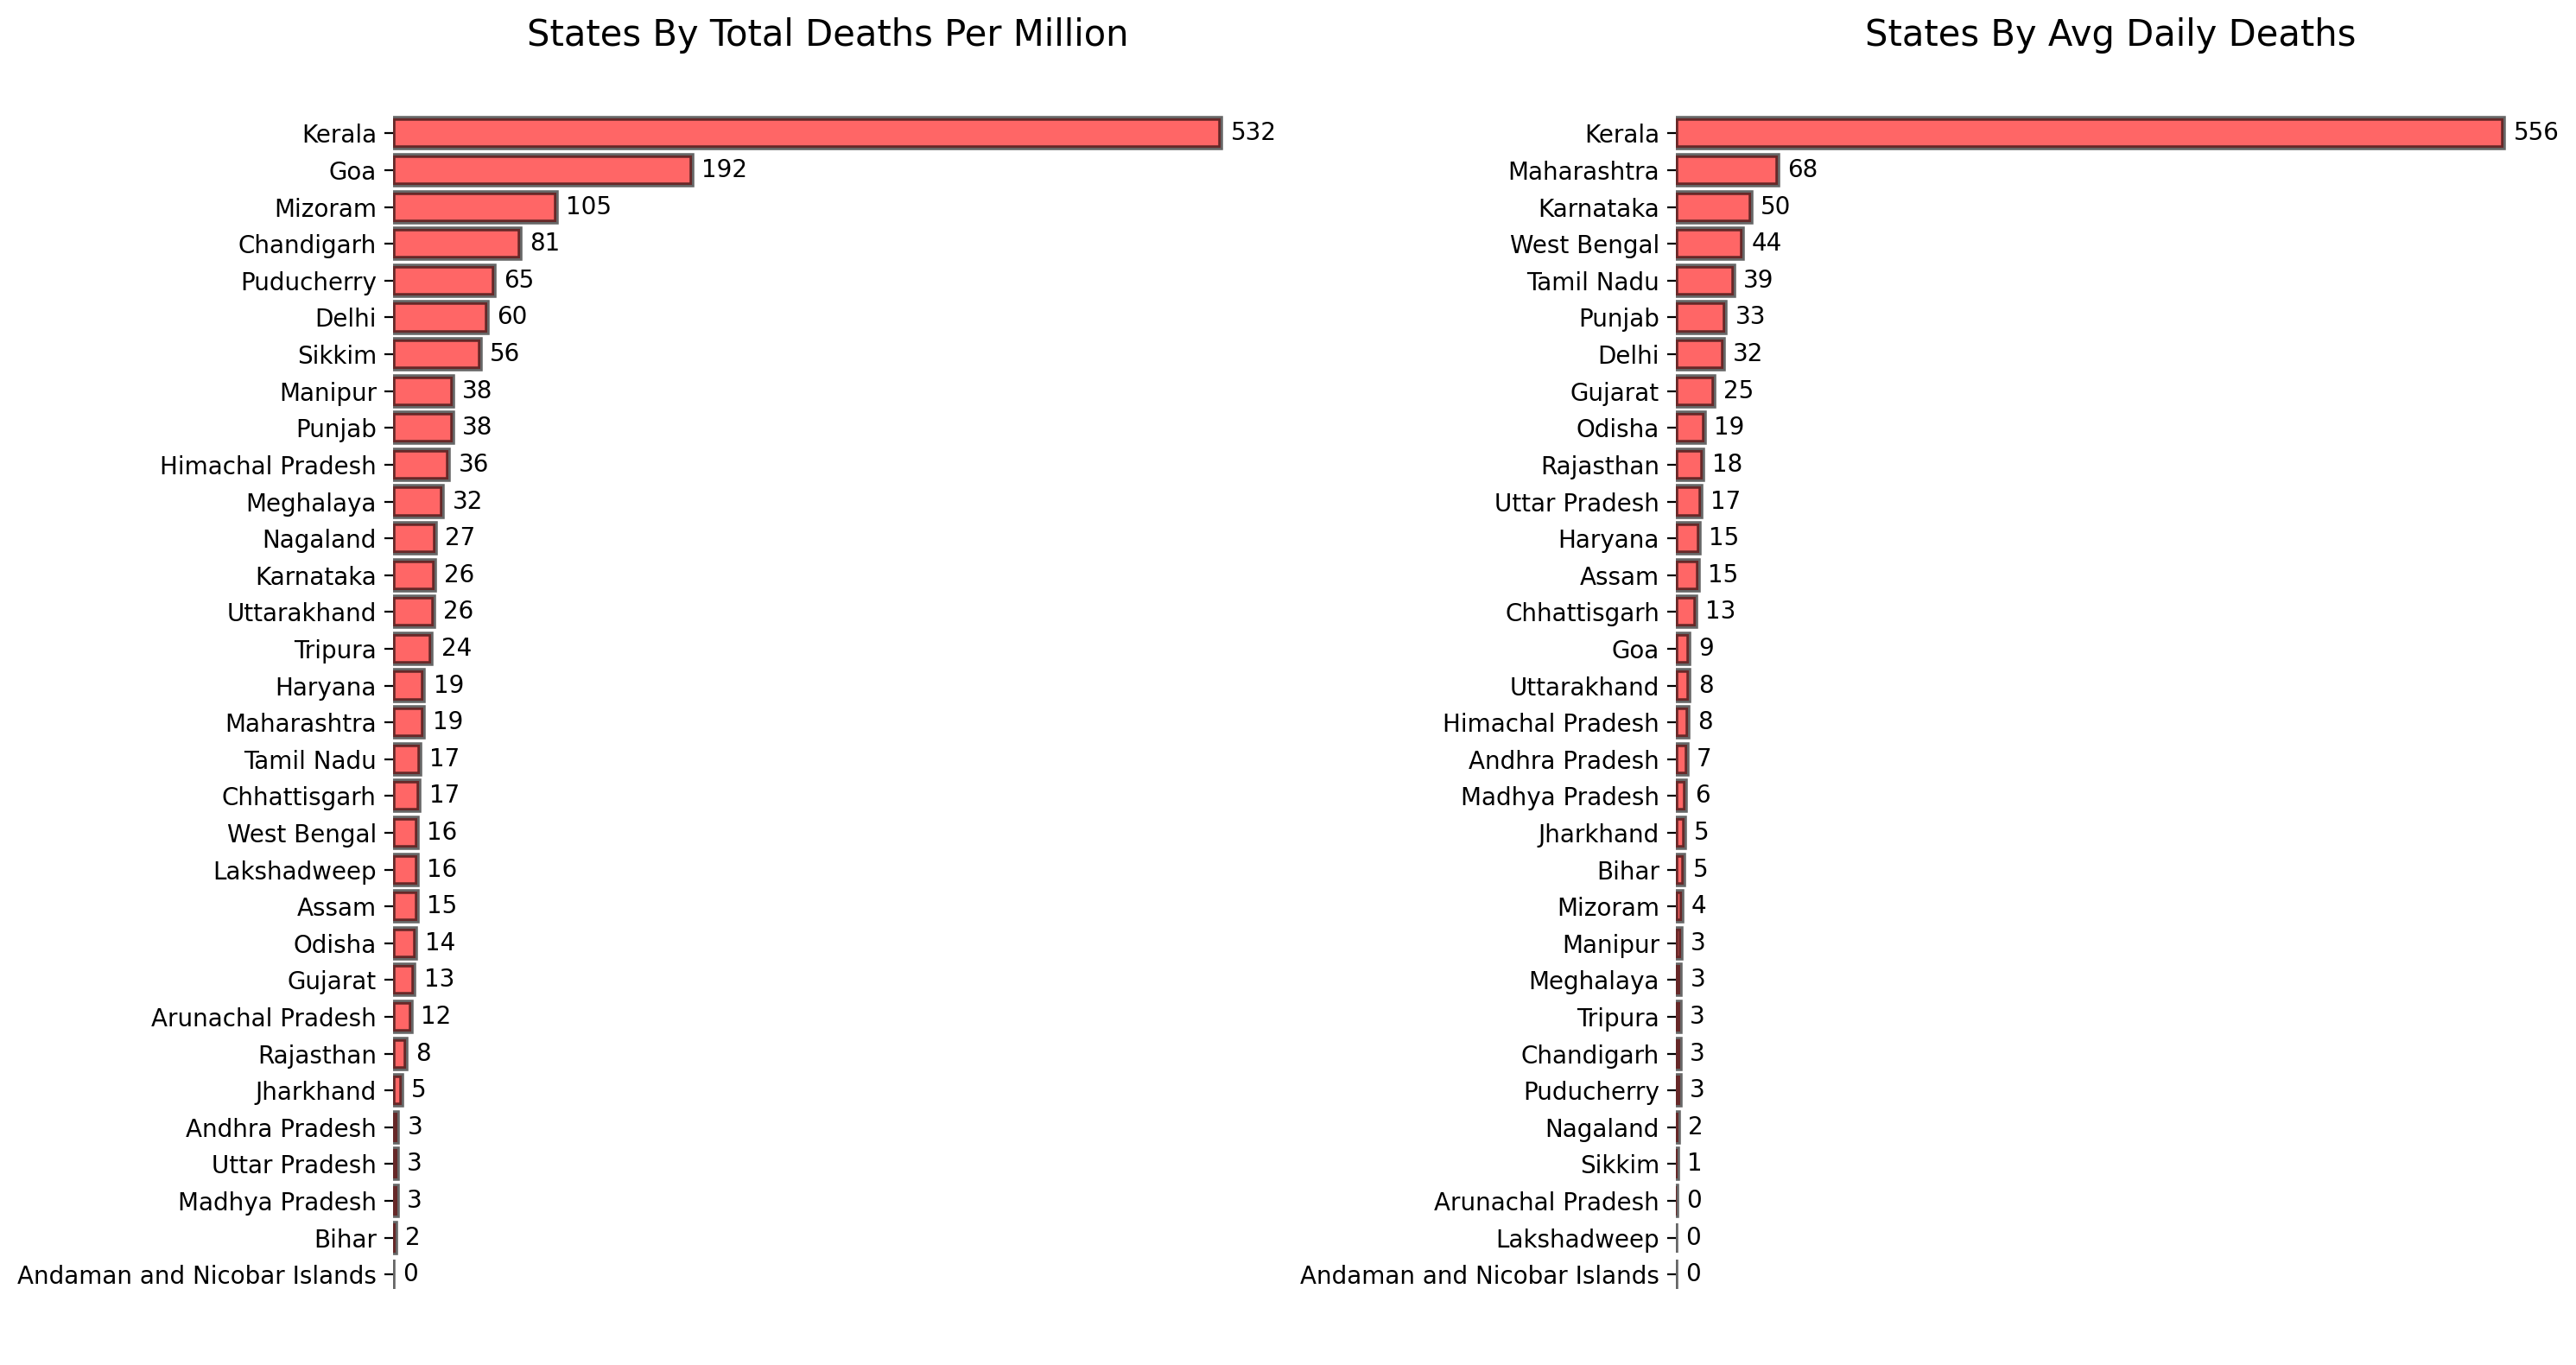

In [72]:
statewise_third_wave['Deaths Per M']= statewise_third_wave['Deaths']*1000000 / statewise_third_wave['Population']
statewise_third_wave['Avg Daily Deaths']= statewise_third_wave['Deaths'] / len(statewise_third_wave['Deaths'])


fig,ax = plt.subplots(1, 2, figsize = (15,8), dpi = 200)
cases_PerM_bars = ax[0].barh(statewise_third_wave.sort_values('Deaths Per M', ascending = True)['State_UT'], 
                           statewise_third_wave.sort_values('Deaths Per M', ascending = True)['Deaths Per M'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[0].bar_label(cases_PerM_bars, fmt = '{:,.0f}', padding = 4)
ax[0].set_title("States By Total Deaths Per Million", fontsize = 15)
#plt.xticks(rotation = 90)
ax[0].set_xticks(ticks = [])

for spine in ax[0].spines.values():
    spine.set_visible(False)
    

avg_daily_cases_bars = ax[1].barh(statewise_third_wave.sort_values('Avg Daily Deaths', ascending = True)['State_UT'], 
                           statewise_third_wave.sort_values('Avg Daily Deaths', ascending = True)['Avg Daily Deaths'], 
                           color = 'red', alpha = 0.6, edgecolor = 'k', linewidth = 2)
ax[1].bar_label(avg_daily_cases_bars, fmt = '{:,.0f}', padding = 4)
ax[1].set_title("States By Avg Daily Deaths", fontsize = 15)
#plt.xticks(rotation = 90)
ax[1].set_xticks(ticks = [])

for spine in ax[1].spines.values():
    spine.set_visible(False)
    
plt.tight_layout()
plt.show();


- Kerala leads significantly in both total deaths per million and average daily deaths, reflecting a high mortality burden.
- Goa and Mizoram have high total deaths per million, indicating higher mortality rates relative to their population sizes.
- Kerala and Maharashtra show high average daily deaths, pointing to ongoing severe impacts from the pandemic.
- Smaller states and Union Territories like Chandigarh and Puducherry have high deaths per million due to their smaller populations, despite having lower absolute death numbers.
- Larger states like Uttar Pradesh and Bihar show lower total deaths per million and also have significantly low contributions to daily new deaths.
- States with lower average daily deaths such as Andaman and Nicobar Islands, Lakshadweep, and Sikkim indicate minimal current impact from Covid-19..

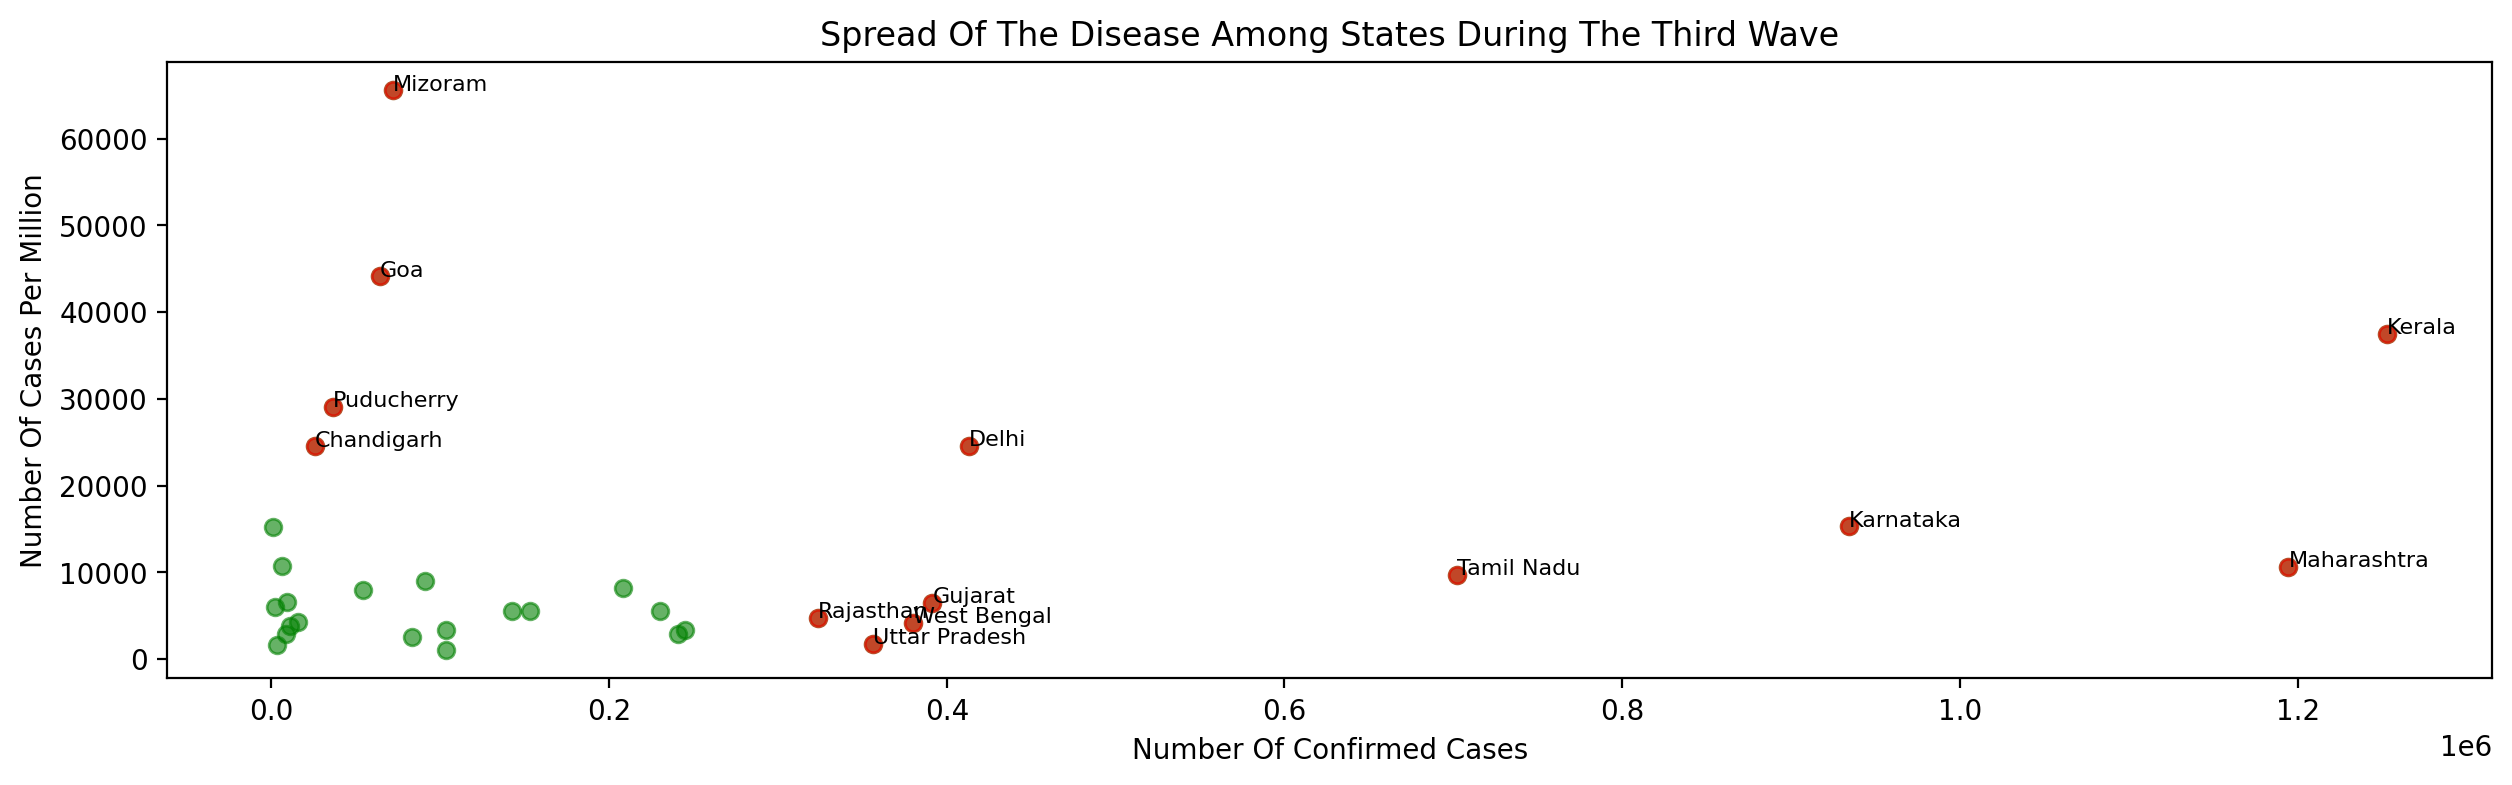

In [73]:
filtered_statewise_third_wave = statewise_third_wave[(statewise_third_wave['Confirmed'] >= 300000) | (statewise_third_wave['Cases Per M'] >= 20000)].reset_index()

plt.figure(figsize = (15,4), dpi = 200)
plt.scatter(statewise_third_wave['Confirmed'], statewise_third_wave['Cases Per M'], alpha = 0.6, color = 'g')
plt.scatter(filtered_statewise_third_wave['Confirmed'], filtered_statewise_third_wave['Cases Per M'], alpha = 0.6, color = 'r')

for i in filtered_statewise_third_wave.index:
    plt.annotate(filtered_statewise_third_wave['State_UT'].iloc[i], xy = (filtered_statewise_third_wave['Confirmed'].iloc[i], 
                 filtered_statewise_third_wave['Cases Per M'].iloc[i]), 
                 size = 8)

plt.xlabel("Number Of Confirmed Cases")
plt.ylabel("Number Of Cases Per Million")
plt.title('Spread Of The Disease Among States During The Third Wave')
    
plt.show();

- Kerala and Maharashtra show the highest number of confirmed cases, indicating significant outbreaks.
- Mizoram, Goa, and Chandigarh have the highest cases per million, suggesting a severe impact relative to their smaller populations.
- States like Delhi, Tamil Nadu, and Karnataka show both high numbers of confirmed cases and cases per million, reflecting widespread transmission.
- Other states with moderate to low cases per million and fewer confirmed cases are more densely clustered on the lower left of the graph, indicating a relatively lesser impact during the third wave.

In [74]:
first_wave_summary = first_wave_summary.rename(index = {"Values" : "First Wave"})
second_wave_summary = second_wave_summary.rename(index = {"Values" : "Second Wave"})
third_wave_summary = third_wave_summary.rename(index = {"Values" : "Third Wave"})

covid_waves_summary = pd.concat([first_wave_summary, second_wave_summary, third_wave_summary])
#covid_waves_summary
format_dict1 = {col1 : '{:,.0f}' for col1 in covid_waves_summary.columns if col1 not in ["Mortality Rate (%)", "Recovery Rate (%)"] }
format_dict1.update({col2 : '{:,.2f}' for col2 in ["Mortality Rate (%)", "Recovery Rate (%)"]})
bold("#### Summary Of The Covid waves")
covid_waves_summary.style.format(format_dict1)
#covid_waves_summary.style.bar(subset = ['Total Confirmed Cases'], color = 'red')

#### Summary Of The Covid waves

- Data showed the second wave to be the most severe, with the highest death toll (241,206) and more than 1900 avg daily deaths, as this wave is caused by delta strain of the virus which is said to be the most virulent amongst all.
- Despite being less virulent than the Delta varient, Original Wuhan strain's first wave mortality rate is seen higher than the second wave, this could be due to the fact that during first wave, people's immunity are not capable of combating this new disease, also health system were not ready to handle such a huge number of patients suddenly leading to over-burden to the health systems.
- Depsite having less transmissible than the third wave's Omicron varient, second wave leads in more 'Total Confirmed Cases' and 'Avg Daily Cases' too, this could due to the fact that more than 70% of the population had received at least one shot of the vaccine at that time which leads to less transmissison.
- The consistently high recovery rate exceeding 96% throughout the waves remains a positive aspect. 

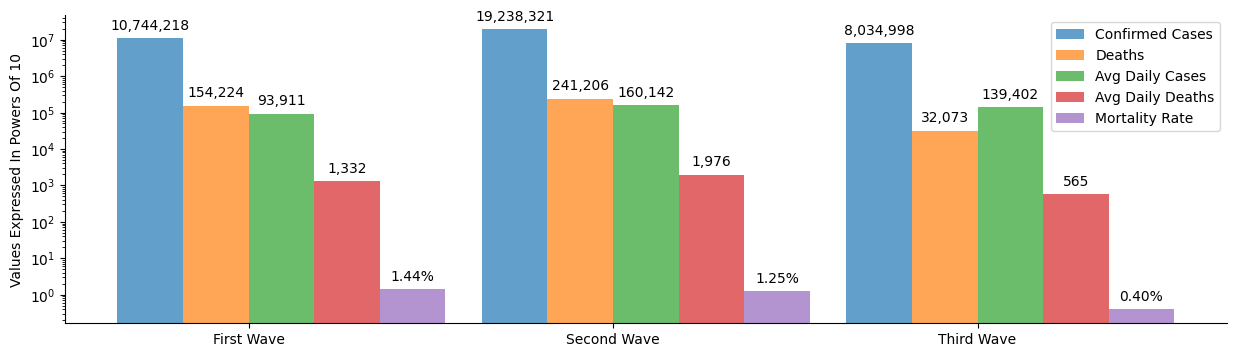

In [75]:
fig, ax = plt.subplots(figsize = (15,4))

width = 0.9
x_confirmed = np.arange(0, 15, 5)
x_deaths = [p + width for p in x_confirmed]
x_daily_cases = [q + width for q in x_deaths]
x_daily_deaths = [r + width for r in x_daily_cases]
x_mort_rate = [s + width for s in x_daily_deaths]

confirmed_bars = ax.bar(x_confirmed, covid_waves_summary['Total Confirmed Cases'], width, label = 'Confirmed Cases', alpha = 0.7)
deaths_bars = ax.bar(x_deaths, covid_waves_summary['Total Deaths'], width, label = 'Deaths', alpha = 0.7)
daily_cases_bars = ax.bar(x_daily_cases, covid_waves_summary['Avg Daily Cases'], width, label = 'Avg Daily Cases', alpha = 0.7)
daily_deaths_bars = ax.bar(x_daily_deaths, covid_waves_summary['Avg Daily Deaths'], width, label = 'Avg Daily Deaths', alpha = 0.7)
mort_rate_bars = ax.bar(x_mort_rate, covid_waves_summary['Mortality Rate (%)'], width, label = 'Mortality Rate', alpha = 0.7)

ax.bar_label(confirmed_bars, fmt = '{:,.0f}', padding = 4)
ax.bar_label(deaths_bars, fmt = '{:,.0f}', padding = 4)
ax.bar_label(daily_cases_bars, fmt = '{:,.0f}', padding = 4)
ax.bar_label(daily_deaths_bars, fmt = '{:,.0f}', padding = 4)
ax.bar_label(mort_rate_bars, fmt = '{:,.2f}%', padding = 4)

ax.legend()
ax.set_xticks(x_confirmed + width/2 + width)
ax.set_xticklabels(covid_waves_summary.index)
plt.yscale("log")

ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False) 
plt.ylabel("Values Expressed In Powers Of 10")
plt.show();

#### Analysis Of Vaccination Drive In India


In [76]:
vaccination_df = pd.read_csv("India Vaccination Data.csv")
vaccination_df.tail()

Date  Total_Vaccinations  People_Vaccinated  \
510  26-06-2022          1969852777         1015812743   
511  27-06-2022          1970469750         1015877936   
512  28-06-2022          1972351905         1016119457   
513  29-06-2022          1973822032         1016311008   
514  30-06-2022          1975334761         1016506282   

     People_Fully_Vaccinated  Total_Boosters  Daily_Doses  
510                911401679      42638355.0      1181064  
511                911747634      42844180.0       616973  
512                912802491      43429957.0      1882155  
513                913642889      43868135.0      1470127  
514                914479703      44348776.0      1512729

In [77]:
vaccination_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     515 non-null    object 
 1   Total_Vaccinations       515 non-null    int64  
 2   People_Vaccinated        515 non-null    int64  
 3   People_Fully_Vaccinated  515 non-null    int64  
 4   Total_Boosters           514 non-null    float64
 5   Daily_Doses              515 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 24.3+ KB


In [78]:
vaccination_df['Date'] = pd.to_datetime(vaccination_df['Date'], format='%d-%m-%Y')

In [79]:
vaccination_df['Per_Population_Vaccinated'] = vaccination_df['People_Vaccinated']*100 / census_df['Population'].iloc[0]
vaccination_df['Per_Population_Fully_Vaccinated'] = vaccination_df['People_Fully_Vaccinated']*100 / census_df['Population'].iloc[0]

In [80]:
vaccination_stats = \
pd.DataFrame(
             { "Total Doses Administered" : [f'{vaccination_df["Total_Vaccinations"].iloc[-1] :,.0f}'] ,
               "Total Booster Doses Administered" : [f'{vaccination_df["Total_Boosters"].iloc[-1] :,.0f} '], 
               "People Vaccinated ( At Least One Dose )" : [f'{vaccination_df["People_Vaccinated"].iloc[-1] :,.0f}'] ,
               "People Fully Vaccinated" : [f'{vaccination_df["People_Fully_Vaccinated"].iloc[-1] :,.0f}'] ,
               " % Population Fully Vaccinated": [f'{ vaccination_df["Per_Population_Vaccinated"].iloc[-1] :,.0f}%'] ,
               " % Population Vaccinated ( At Least One Dose )": [f'{ vaccination_df["Per_Population_Fully_Vaccinated"].iloc[-1] :,.0f}%'] ,
             }, index = ["Values"]
             )

vaccination_stats.T

Values
Total Doses Administered                        1,975,334,761
Total Booster Doses Administered                  44,348,776 
People Vaccinated ( At Least One Dose )         1,016,506,282
People Fully Vaccinated                           914,479,703
 % Population Fully Vaccinated                            84%
 % Population Vaccinated ( At Least One Dose )            76%

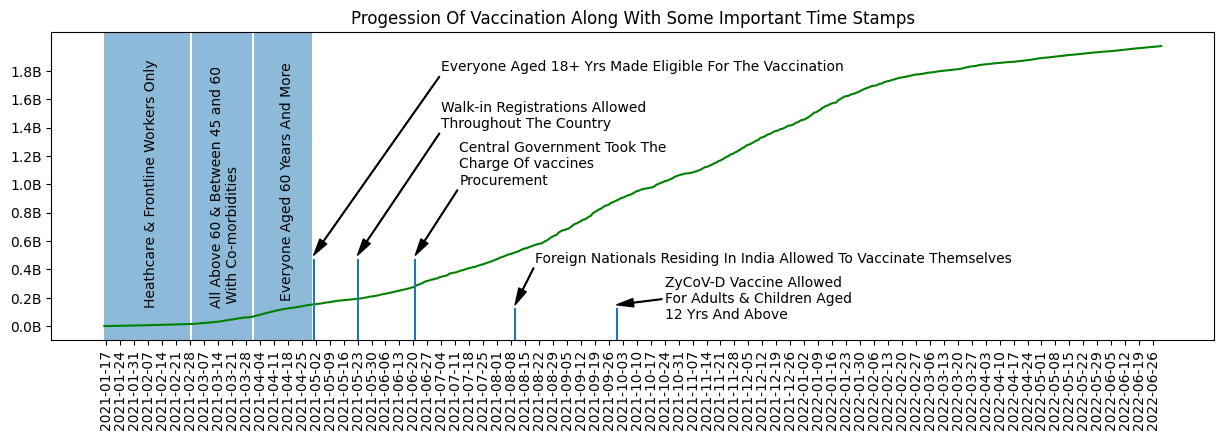

In [81]:
plt.figure(figsize = (15,4))
plt.plot(vaccination_df['Date'], vaccination_df['Total_Vaccinations'], color = "g")

plt.axvspan("2021-01-16", "2021-02-28", alpha = 0.5)
plt.axvspan("2021-03-01", "2021-03-31", alpha = 0.5)
plt.axvspan("2021-04-01", "2021-04-30", alpha = 0.5)
plt.axvline(vaccination_df[vaccination_df['Date'] == "2021-05-01"]['Date'].iloc[0], ymax = 0.26)
plt.axvline(vaccination_df[vaccination_df['Date'] == "2021-05-23"]['Date'].iloc[0], ymax = 0.26)
plt.axvline(vaccination_df[vaccination_df['Date'] == "2021-06-21"]['Date'].iloc[0], ymax = 0.26)
plt.axvline(vaccination_df[vaccination_df['Date'] == "2021-09-30"]['Date'].iloc[0], ymax = 0.1)
plt.axvline(vaccination_df[vaccination_df['Date'] == "2021-08-10"]['Date'].iloc[0], ymax = 0.1)

plt.text(vaccination_df[vaccination_df['Date'] == "2021-02-05"]['Date'].iloc[0], 150000000, 'Heathcare & Frontline Workers Only', rotation = 90)
plt.text(vaccination_df[vaccination_df['Date'] == "2021-03-10"]['Date'].iloc[0], 150000000, 'All Above 60 & Between 45 and 60 \n With Co-morbidities', rotation = 90)
plt.text(vaccination_df[vaccination_df['Date'] == "2021-04-14"]['Date'].iloc[0], 200000000, 'Everyone Aged 60 Years And More', rotation = 90)

plt.annotate("Everyone Aged 18+ Yrs Made Eligible For The Vaccination", 
             xy = (vaccination_df[vaccination_df['Date'] == "2021-05-01"]['Date'].iloc[0], 500000000), 
             xytext = (vaccination_df[vaccination_df['Date'] == "2021-07-04"]['Date'].iloc[0], 1800000000), 
             arrowprops = {"facecolor" : "k", "width" : 0.5, "headwidth" : 6})
plt.annotate("Walk-in Registrations Allowed \nThroughout The Country", 
             xy = (vaccination_df[vaccination_df['Date'] == "2021-05-23"]['Date'].iloc[0], 500000000), 
             xytext = (vaccination_df[vaccination_df['Date'] == "2021-07-04"]['Date'].iloc[0], 1400000000), 
             arrowprops = {"facecolor" : "k", "width" : 0.5, "headwidth" : 6})
plt.annotate("Central Government Took The \nCharge Of vaccines \nProcurement", 
             xy = (vaccination_df[vaccination_df['Date'] == "2021-06-21"]['Date'].iloc[0], 500000000), 
             xytext = (vaccination_df[vaccination_df['Date'] == "2021-07-13"]['Date'].iloc[0], 1000000000), 
             arrowprops = {"facecolor" : "k", "width" : 0.5, "headwidth" : 6})
plt.annotate("ZyCoV-D Vaccine Allowed \nFor Adults & Children Aged \n12 Yrs And Above", 
             xy = (vaccination_df[vaccination_df['Date'] == "2021-09-30"]['Date'].iloc[0], 150000000), 
             xytext = (vaccination_df[vaccination_df['Date'] == "2021-10-24"]['Date'].iloc[0], 50000000), 
             arrowprops = {"facecolor" : "k", "width" : 0.5, "headwidth" : 6})
plt.annotate("Foreign Nationals Residing In India Allowed To Vaccinate Themselves", 
             xy = (vaccination_df[vaccination_df['Date'] == "2021-08-10"]['Date'].iloc[0], 150000000), 
             xytext = (vaccination_df[vaccination_df['Date'] == "2021-08-20"]['Date'].iloc[0], 450000000), 
             arrowprops = {"facecolor" : "k", "width" : 0.5, "headwidth" : 6})

plt.xticks(pd.date_range(start = vaccination_df['Date'].iloc[0], end = vaccination_df['Date'].iloc[-1], freq = 'w' ), rotation = 90)
plt.yticks(np.arange(0, vaccination_df['Total_Vaccinations'].max(), 200000000), [str(val / 1000000000) + "B" for val in np.arange(0, vaccination_df['Total_Vaccinations'].max(), 200000000)])
plt.title("Progession Of Vaccination Along With Some Important Time Stamps")


plt.show();

- The Indian government began administering COVID-19 vaccines on January 16, 2021 earliest among some developed countries.
- Initially, healthcare and frontline workers were prioritized.
- Eligibility was gradually expanded to include all adults and eventually children aged 12 and over.
- The graph shows a significant increase in the number of doses administered following the expansion of eligibility.
- The major vaccines used in India's vaccination drive are :
1. Covishield : The one manufactured locally by the Serum Institute of India and produced by AstraZeneca
2. Covaxin : The indegenious one, Developed and manufactured by Bharat Biotech.

Some other vaccines like Sputnik V and those produced by Johnson & Johnson and Moderna have also been included in the drive, but to a lesser extent compared to Covishield and Covaxin.

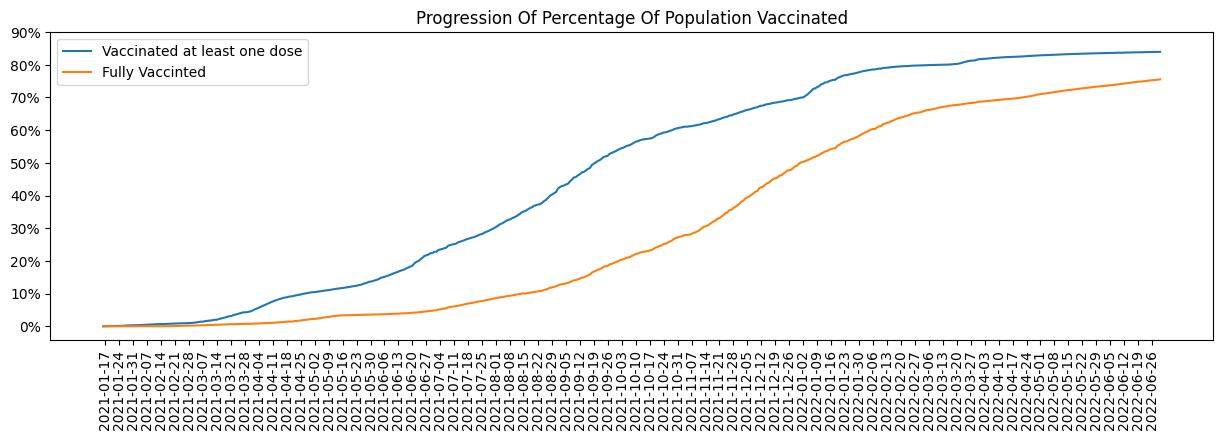

In [82]:
plt.figure(figsize = (15,4))
plt.plot(vaccination_df['Date'], vaccination_df['Per_Population_Vaccinated'], label = "Vaccinated at least one dose")
plt.plot(vaccination_df['Date'], vaccination_df['Per_Population_Fully_Vaccinated'], label = "Fully Vaccinted")

plt.xticks(pd.date_range(start = vaccination_df['Date'].iloc[0], end = vaccination_df['Date'].iloc[-1], freq = 'w' ), rotation = 90)
plt.yticks(np.arange(0,100,10), [str(val) + "%" for val in np.arange(0,100,10)])
plt.title('Progression Of Percentage Of Population Vaccinated')
plt.legend()
plt.show();

- Till date ( As of 30 June 2022 ), approximately 84% of the population has received at least one shot of the vaccination, and almost 76% of the population are fully vaccinated.
- During the onset of the second wave, only 1% of the population had received at least one dose, and 0.2% were fully vaccinated.
- In contrast, almost 70% have received at least one dose, and almost 50% were fully vaccinated when cases began to rise during the third wave.
- As a result, fewer hospitalizations and serious cases are seen during the third wave despite it being more transmissible than the Delta strain of the second wave.

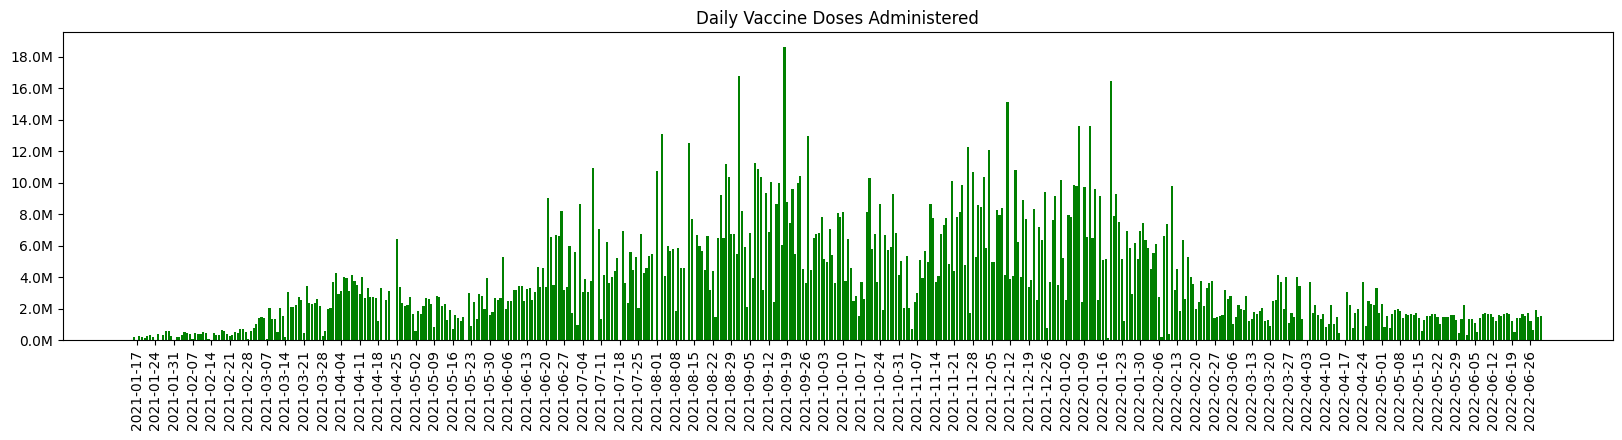

In [83]:
plt.figure(figsize = (20,4))
plt.bar(vaccination_df['Date'], vaccination_df['Daily_Doses'], color = 'g')
plt.xticks(pd.date_range(start = vaccination_df['Date'].iloc[0], end = vaccination_df['Date'].iloc[-1], freq = 'w' ), rotation = 90)
plt.yticks(np.arange(0, vaccination_df['Daily_Doses'].max(), 2000000), [str(val / 1000000) + "M" for val in np.arange(0, vaccination_df['Daily_Doses'].max(), 2000000)])
plt.title('Daily Vaccine Doses Administered')
plt.show();

In [84]:
vaccination_df['Daily_People_Vaccinated'] = vaccination_df['People_Vaccinated'].diff()
vaccination_df['Daily_People_Fully_Vaccinated'] = vaccination_df['People_Fully_Vaccinated'].diff()
vaccination_df.fillna(0, inplace= True)

monthly_data = vaccination_df.iloc[:, [0,5,8,9]].resample('M', on='Date').sum()
monthly_data['%Popu_Daily_Vaccinated'] = monthly_data['Daily_People_Vaccinated']*100 / 1200000000
monthly_data['%Popu_Daily_Fully_Vaccinated'] = monthly_data['Daily_People_Fully_Vaccinated']*100 / 1200000000
monthly_data.head()

Daily_Doses  Daily_People_Vaccinated  \
Date                                               
2021-01-31      3758843                3567662.0   
2021-02-28     10542423                8086232.0   
2021-03-31     50816630               43938126.0   
2021-04-30     86880211               69593751.0   
2021-05-31     58451788               41814133.0   

            Daily_People_Fully_Vaccinated  %Popu_Daily_Vaccinated  \
Date                                                                
2021-01-31                            0.0                0.297305   
2021-02-28                      2456191.0                0.673853   
2021-03-31                      6878504.0                3.661510   
2021-04-30                     17286460.0                5.799479   
2021-05-31                     16637655.0                3.484511   

            %Popu_Daily_Fully_Vaccinated  
Date                                      
2021-01-31                      0.000000  
2021-02-28                      0.204683  
2021-03-31                      0.573209  
2021-04-30                      1.440538  
2021-05-31                      1.386471

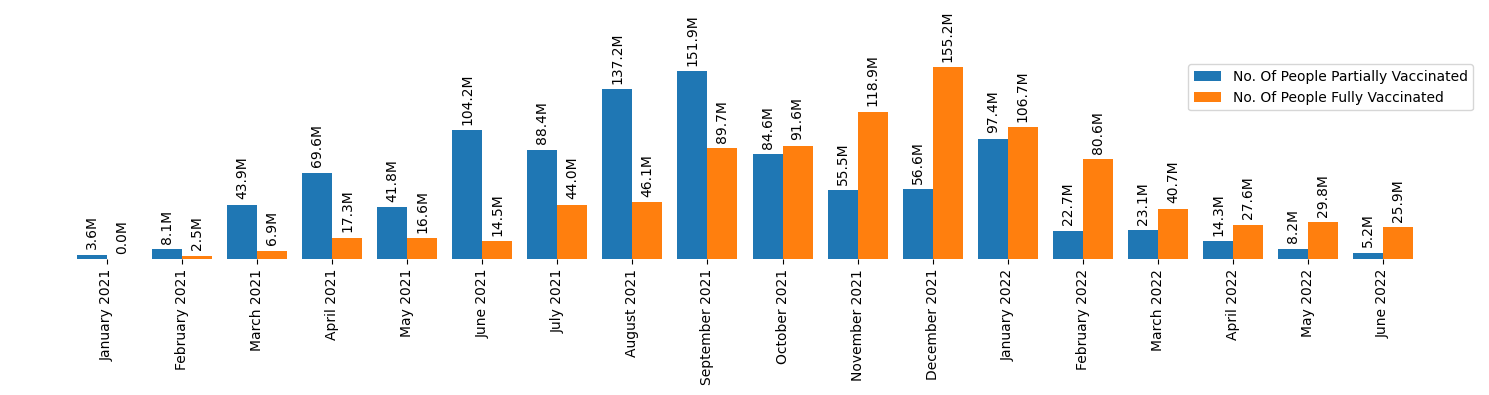

In [85]:
fig, ax = plt.subplots(figsize=(15, 4))

width = 0.8
x_vaccinated = np.arange(0, 2*18, 2)
x_fully_vaccinated = [i + width for i in x_vaccinated]

bars_vaccinated = ax.bar(x_vaccinated, monthly_data['Daily_People_Vaccinated'], width, label = "No. Of People Partially Vaccinated")
bars_fully_vaccinated = ax.bar(x_fully_vaccinated, monthly_data['Daily_People_Fully_Vaccinated'], width, label = "No. Of People Fully Vaccinated")

ax.bar_label(bars_vaccinated, fmt = lambda x: f"{x / 1e6:.1f}M", padding = 4, label_type = 'edge')
ax.bar_label(bars_fully_vaccinated, fmt = lambda x: f"{x / 1e6:.1f}M", padding = 4, label_type = 'edge')

plt.xticks(x_vaccinated + width/2 , monthly_data.index.strftime('%B %Y'), rotation = 90)
plt.yticks([])
plt.legend()

for label in ax.texts:
    label.set_rotation(90)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show();

- The number of people vaccinated continued to increase until April 2021. A decline was observed in the month of May, which could be attributed to issues arising from the procurement of vaccines. However, after the central government took responsibility for vaccine procurement in June 2021, there was a notable increase in the administration of vaccines.
- In September 2021, the highest number, around 150 million individuals, were vaccinated with the first shot, and 90 million with the second shot in this single month alone.
- By September 2021, nearly half of the population had received at least one dose. Therefore, from October 2021 onwards, the number of individuals receiving the second shot became more than those receiving their first shot.
- In December 2021, the highest number, 155 million individuals, had received their second shot.
- After February 2022, the rate of vaccination declined, as the majority of the population may have completed their vaccination regimen by this time.